<div style="line-height: 1.2;">
    <h1 style="margin-bottom: 0px; padding-bottom: 0px;">San Francisco Crime Trend Analysis</h1>
    <h2 style="margin-top: 5px; color: gray; font-weight: normal;">City-Level Patterns and High-Risk Neighborhood Forecasting (2018-2026)</h2>
    
    
**Author**: Sileshi Hirpa  
**Role**: Senior Data Science (Business Analytics) Student, Arizona State University  
**Date**: December 2025  
**Location**: San Francisco Bay Area, CA  
</div>

## Executive Summary

**Data Scope:** ~1 million SFPD incident records (2018-2025)  
**Forecast Horizon:** Calendar Year 2026  

This project presents a longitudinal analysis of San Francisco’s public safety landscape, transforming nearly a decade of incident-level records into structured, decision-ready intelligence. By combining historical pattern analysis with neighborhood-level risk scoring and forward-looking forecasts, the study offers a practical framework for understanding how safety conditions vary across space and time in the city’s post-pandemic environment.

### The Problem: Information Without Interpretation

Although public safety data is openly available, it is rarely actionable. Raw incident records are granular, unevenly distributed, and subject to seasonal and structural noise. In the absence of a coherent framework, stakeholders are left reacting to isolated spikes rather than understanding underlying risk patterns. This limits the ability of planners, mobility platforms, and residents to anticipate conditions and make informed, proactive decisions.

### Methodological Approach

The analysis integrates three complementary components to address this gap:

1. **Mobility Safety Index (MSI)**  
   A rank-normalized composite score that compares neighborhoods on a relative basis. The MSI blends total incident volume, visitor-impact crime exposure, and recent activity momentum to classify neighborhoods into stable, transitional, and high-activity tiers. The emphasis is on comparability and structural signal rather than raw counts alone.

2. **Hierarchical Forecasting Strategy**  
   Forecasting is conducted at two levels. Citywide models establish a macro baseline for overall activity, while neighborhood-aware analyses highlight localized deviations within structurally high-activity zones. This layered approach preserves global trends while remaining sensitive to hyper-local dynamics.

3. **Model Evaluation and Benchmarking**  
   Prophet serves as the primary forecasting model due to its robustness to seasonality and structural breaks. Its performance is benchmarked against SARIMAX, Exponential Smoothing, and XGBoost to validate stability and guard against model-specific bias.

### Key Findings

- **Concentrated Risk Structure:** Incident activity is highly uneven across the city. A limited set of neighborhoods accounts for a disproportionate share of total incidents, while most residential areas maintain a consistent and relatively low activity baseline.
- **Post-2020 Stabilization:** After the pandemic-related disruption, citywide incident levels have settled into a lower, stable range. Forecasts suggest monthly totals in 2026 will remain broadly consistent with recent years rather than reverting to pre-2020 highs.
- **Seasonal and Localized Surges:** Although aggregate trends appear stable, certain neighborhoods show recurring seasonal increases, particularly in property-related incidents and nightlife-adjacent areas, underscoring the importance of localized analysis.

These patterns are illustrated through interactive trend visualizations, spatial heatmaps, and neighborhood scorecards in the accompanying dashboard.

### Strategic Implications

Taken together, the MSI and forecasting results form a unified decision-support framework. Rather than treating public safety as a static condition, the analysis supports dynamic resource planning, risk-aware mobility guidance, and neighborhood-specific monitoring. The framework is designed to evolve, allowing future integration of external signals such as foot traffic or economic activity to move from descriptive and predictive insight toward more prescriptive urban planning.

## Table of Contents <a id="top"></a>

### 1. Introduction
- [1.1 City Context: San Francisco in Brief](#city-context)
- [1.2 Motivation for This Project](#motivation)

[Back to Top](#top)

### 2. Dataset & Preparation
- [2.1 Data Source](#about-the-dataset)
- [2.2 Cleaning & Validation](#data-cleaning)
- [2.3 Structural Data Assessment & Time-Series Construction](#structural-assessment)
- [2.4 Missing-Value and Cleaning Decisions](#missing-values)
- [2.5 Datetime Validation & Feature Engineering](#datetime-validation)
- [2.6 Categorical Structure (Pre-Aggregation)](#categorical-structure)
- [2.7 Neighborhood Label Validation](#neighborhood-validation)
- [2.8 Spatial Sanity Checks](#spatial-sanity)
- [2.9 Pre-EDA Visual Summaries](#visual-summary)
- [2.10 Spatial Density of Incidents](#spatial-density)

[Back to Top](#top)

### 3. Exploratory Data Analysis (EDA)
- [3.1 Yearly Trends](#yearly-trends)
- [3.2 Monthly Trends](#monthly-trend)
- [3.3 Weekday Patterns](#weekday-patterns)
- [3.4 Hour-of-Day Patterns](#hour-patterns)
- [3.5 Crime Category Distribution](#category-distribution)
- [3.6 Spatial Distribution by Police District](#district-distribution)
- [3.7 Neighborhood Distribution](#neighborhood-distribution)
- [3.8 Neighborhood Trend Dynamics](#neighborhood-trends)
- [3.9 Year–Month Trends by Category](#year-month-category)
- [3.10 Summary of Key EDA Findings](#eda-summary)

[Back to Top](#top)

### 4. Neighborhood-Level Analysis
- [4.1 Distribution of Crime Across Neighborhoods](#neighborhood-analysis)
- [4.2 Choropleth Mapping & Rankings](#choropleth-map)
- [4.3 Neighborhood × Category Signatures](#neighborhood-category-matrix)
- [4.4 Temporal Shift and Pandemic Impact](#temporal-shift)
- [4.5 Tactical Temporal Patterns (Weekday × Hour)](#tactical-deep-dives)
- [4.6 Comparative Analysis: Mission, Tenderloin, SoMa](#comparative-temporal-analysis)
- [4.7 Hotspot Evolution Across COVID Eras](#hotspot-evolution-covid)
- [4.8 Crime Type by Neighborhood Heatmap](#neighborhood-heatmap)
- [4.9 Mobility Safety Index (MSI)](#safety-scorecard)

[Back to Top](#top)

### 5. Forecasting: 2026 Outlook (Macro + Micro)
- [5.1 Forecasting Objective & Decision Context](#forecast-objective)
- [5.2 Data Foundation & Temporal Framing](#forecast-data)
- [5.3 Macro–Micro Forecasting Framework](#macro-micro-framework)
- [5.4 Model Evaluation & Ground Rules](#forecast-ground-rules)
- [5.5 Structural Break Considerations](#structural-breaks)
- [5.6 Prophet Citywide Forecast (2026)](#prophet-forecast)
- [5.7 SARIMAX Benchmark](#sarimax)
- [5.8 ETS Screening](#ets)
- [5.9 XGBoost Screening](#xgboost)
- [5.10 Model Selection Decision](#model-selection)
- [5.11 Micro-Level Forecasts (Mission, Tenderloin, SoMa)](#micro-run)

[Back to Top](#top)

### 6. Interactive Dashboard
- [6.1 Separation of Analysis and Application Layers](#dashboard-separation)
- [6.2 Role of the Dashboard](#dashboard-architecture)
- [6.3 Live Dashboard Access](#dashboard-access)
- [6.4 Operational and Analytical Value](#dashboard-value)

[Back to Top](#top)

### 7. References
- [References](#references)

[Back to Top](#top)


## 1. Introduction <a id="introduction"></a>
### 1.1 City Context: San Francisco in Brief <a id="city-context"></a>



San Francisco is a compact, high-density city of about 809,000 residents across only 46.7 square miles, with more than 17,300 people per square mile (U.S. Census Bureau, 2023; ACS 2023). On weekdays, the population rises above 1.1 million as commuters, students, and visitors enter the city, sustaining heavy activity across downtown corridors and transit hubs.

Tourism remains central to the local economy, with over 23 million annual visitors (San Francisco Travel Association, 2024), heavily concentrated in neighborhoods such as Fisherman’s Wharf, Union Square, Chinatown, SoMa, the Mission, and the Embarcadero/Waterfront.

The city’s geography funnels travel through a few major entry and exit points: **I‑80** to the East Bay, the **Golden Gate Bridge (US‑101 North)** to Marin, and **Highway 101/I‑280** to the Peninsula. These chokepoints, combined with recurring large events (Pride, Fleet Week, Outside Lands, Bay to Breakers, Dreamforce, and year‑round games at Oracle Park and Chase Center), create predictable surges in local activity.

Together, these structural and mobility dynamics help explain why neighborhoods such as the Tenderloin, South of Market (SoMa), and the Mission record consistently high incident counts in the 2018–2025 period.

The screenshot below provides a simple geographic orientation for readers unfamiliar with the city and highlights the major entrances and exits:

[Back to Top](#top)

<div style="text-align: center;">
    <img src="SF_borders.png" width="550">
    <p><strong>Figure 1.</strong> Outline of San Francisco’s city limits, with the eastern shoreline along San Francisco Bay, the northern edge overlooking the Golden Gate area, and the southern boundary leading toward Daly City and the Peninsula.</p>
    <p style="font-size: 12px; color: gray;">Source: Google Maps (screenshot by the author)</p>
</div>



### 1.2 Motivation for This Project <a id="motivation"></a>

For the past several years, I have worked as an Uber driver in the San Francisco Bay Area. Many passengers - especially visitors - frequently ask similar questions:

- “Which neighborhoods are safe to stay in?”
- “Are there areas we should avoid late at night?”
- “Which areas do you recommend for the best experience?”

I often meet visitors who are excited about finding good hotel deals online but later realize they did not have enough information about where those hotels are located or how surrounding neighborhoods differ. That lack of context can lead to confusion or discomfort, particularly when people arrive late at night near areas such as the Tenderloin or parts of SoMa. On several occasions, riders have mentioned changing their hotel reservations after arriving in the city because the neighborhood they originally booked did not feel as pleasant or welcoming as they expected.

Beyond individual passenger inquiries, this project is also motivated by the broader public discourse surrounding San Francisco’s safety. As a local resident, I am continuously exposed to reporting from news outlets, radio broadcasts, and social media feeds that often present fragmented - and at times contradictory - portrayals of the city’s public safety conditions. These narratives can amplify short-term events while obscuring longer-term structural patterns.

By aggregating nearly one million official San Francisco Police Department incident records, this project seeks to reconcile these daily reports into a single, cohesive empirical view. The goal is to move beyond the noise of the news cycle and identify the underlying spatial and temporal trends that more accurately characterize the city’s safety landscape.

This project uses open SFPD data to address the following questions:

1. **Where** are incidents most concentrated across neighborhoods?  
2. **When** do incidents peak across hours and days of the week?  
3. **How** have incident levels changed from 2018 through 2025?  
4. **What** short-term forecasts can help contextualize early 2026 trends?

While these questions originated from individual rider interactions and public narratives, addressing them requires a rigorous, citywide statistical approach to ensure insights are grounded in data rather than anecdote. The following sections therefore transition from qualitative observations to a quantitative framework, beginning with a formal audit of the data source and the cleaning protocols required to support high-integrity forecasting.

To ensure the integrity of this study, the following analysis utilizes the full SFPD record set (2018-2025), treating 2025 as a blind 'holdout year' to validate the predictive power of our models before projecting into 2026

In [1]:
# %pip install prophet

In [2]:
# ============================================================
# STEP 0: GLOBAL IMPORTS & NOTEBOOK CONFIGURATION
# ============================================================

# ---------------------------------------------------
# 1. Core data engineering and numerical computing
# ---------------------------------------------------
import pandas as pd
import numpy as np
import json
import os

# -----------------------------------------------
# 2. Advanced analytics and statistical modeling
# -----------------------------------------------
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------------------------
# 3. Geospatial and exploratory data analysis (EDA)
# -----------------------------------------------
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, Markdown

# -----------------------------------------------
# 4. Notebook presentation and logging control
# -----------------------------------------------
import warnings
import logging

warnings.filterwarnings("ignore", message="IProgress not found.*")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

sns.set_theme(style="whitegrid")
pio.templates.default = "plotly_white"

# -----------------------------------------------
# 5. Project setup (run once per kernel)
# -----------------------------------------------
from pathlib import Path

MODELS_DIR = Path("models")
MODELS_DIR.mkdir(exist_ok=True, parents=True)

def models_path(filename: str) -> Path:
    return MODELS_DIR / filename

np.random.seed(42)
print(f"MODELS_DIR ready: {MODELS_DIR.resolve()}")

# -----------------------------------------------
# 6. Utility: force timezone-naive datetimes (Prophet)
# -----------------------------------------------
def to_naive_datetime(s: pd.Series) -> pd.Series:
    """
    Convert a datetime-like Series to timezone-naive pandas datetime.
    Prophet expects timezone-naive timestamps.
    """
    s = pd.to_datetime(s, errors="coerce")
    if getattr(s.dt, "tz", None) is not None:
        s = s.dt.tz_localize(None)
    return s

# -----------------------------------------------
# 7. Forecast evaluation utilities (global)
# -----------------------------------------------
def evaluate_forecast(y_true, y_pred, label: str = "", verbose: bool = True) -> dict:
    """
    Compute MAE and RMSE for time-series forecasts.
    Safe for notebook + Streamlit (verbose=False).
    """
    y_true = pd.Series(y_true).astype(float)
    y_pred = pd.Series(y_pred).astype(float)

    n = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:n]
    y_pred = y_pred.iloc[:n]

    mask = ~(y_true.isna() | y_pred.isna())
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))

    metrics = {"MAE": float(mae), "RMSE": float(rmse)}

    if verbose:
        if label:
            print(label)
        print(f"MAE : {metrics['MAE']:.2f}")
        print(f"RMSE: {metrics['RMSE']:.2f}")
        print("-" * 40)

    return metrics

def save_metrics(metrics: dict, filename: str, extra: dict | None = None) -> None:
    """Save metrics as a 1-row CSV in /models."""
    row = metrics.copy()
    if extra:
        row.update(extra)
    pd.DataFrame([row]).to_csv(models_path(filename), index=False)

def save_predictions(df_pred: pd.DataFrame, filename: str) -> None:
    """Save predictions as CSV in /models."""
    df_pred.to_csv(models_path(filename), index=False)

MODELS_DIR ready: /Users/sileshihirpa/Desktop/ASU/2025/3. Fall/Session B/DAT301/Projects/project 2/models


## 2. Dataset & Preparation <a id="dataset-prep"></a>
### 2.1 Data Source <a id="about-the-dataset"></a>

This project uses the *Police Department Incident Reports: 2018 – December 31, 2025* dataset from [DataSF](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/data_preview), the City and County of San Francisco’s open data portal. The dataset includes all reported police incidents recorded by the San Francisco Police Department (SFPD), with attributes such as incident category, description, neighborhood, timestamp, and geographic coordinates.

This dataset is well suited for analyzing crime trends across time and space because it provides:

* **Citywide coverage** of all police-reported incidents (Initial, Coplogic, and Vehicle reports).
* **Detailed timestamps** for granular hourly, daily, and monthly temporal analysis.
* **Neighborhood labels** for spatial comparison and administrative reporting.
* **Latitude and longitude** for precise neighborhood mapping and hotspot visualization.

For this project, the dataset was refreshed on January 2, 2026, and contains approximately 995,000 incident records. This update is critical as it provides the finalized record set for the full 2018-2025 period, enabling a complete 12-month validation window for the 2025 holdout set before projecting 2026 trends. The next section loads the data and applies initial cleaning steps to prepare it for analysis.

### 2.2 Cleaning & Validation <a id="data-cleaning"></a>

The initial loading and cleaning step performs the following actions:

1. **Load the dataset** and parse the date column as a proper datetime type to enable time-series calculations.
2. **Rename key columns** so the dataset uses clear, developer-friendly, and consistent variable names throughout the notebook (e.g., mapping `Analysis Neighborhood` to `neighborhood`).
3. **Filter the dataset** to the 2018-2025 window to ensure the analysis is built on complete annual cycles, which is vital for capturing seasonal accuracy.
4. **Coordinate Harmonization**: Addresses the SFPD intersection mapping change (April 24, 2024) mentioned in the metadata by prioritizing geographic coordinates to ensure spatial consistency across the eight-year study.
5. **Drop records missing geographic coordinates**, since latitude and longitude are required for neighborhood mapping and high-stakes hotspot forecasting.

[Back to Top](#top)


In [3]:
# ============================================================
# STEP 1: Load Raw Dataset and Canonical Datetime Parsing
# ============================================================

# ---------------------------------------------------
# 1. Load refreshed raw SFPD dataset (2026-01-02)
# ---------------------------------------------------
raw_csv = "Police_Department_Incident_Reports__2018_to_Present_20260102.csv"
path = "/Users/sileshihirpa/Desktop/ASU/2025/3. Fall/Session B/DAT301/Projects/project 2/"

try:
    df = pd.read_csv(path + raw_csv, low_memory=False)
    print(f"Successfully loaded {raw_csv}")
    print("Loaded shape:", df.shape)
except FileNotFoundError:
    print(f"Error: {raw_csv} not found at {path}.")
    raise

# ---------------------------------------------------
# 2. Explicit datetime parsing (deterministic & fast)
# ---------------------------------------------------
s = df["Incident Datetime"].astype(str).str.strip()

dt_a = pd.to_datetime(s, format="%Y/%m/%d %I:%M:%S %p", errors="coerce")
dt_b = pd.to_datetime(s, format="%Y/%m/%d %I:%M %p", errors="coerce")
dt_c = pd.to_datetime(s, format="%Y-%m-%d %H:%M:%S", errors="coerce")
dt_d = pd.to_datetime(s, format="%Y/%m/%d %H:%M:%S", errors="coerce")

df["incident_datetime"] = dt_a.fillna(dt_b).fillna(dt_c).fillna(dt_d)

# ---------------------------------------------------
# 3. Datetime integrity checks
# ---------------------------------------------------
print("Invalid datetimes:", df["incident_datetime"].isna().sum())
print("Min datetime:", df["incident_datetime"].min())
print("Max datetime:", df["incident_datetime"].max())

bad = df.loc[df["incident_datetime"].isna()]
if len(bad) > 0:
    print(bad["Incident Datetime"].head(10).to_string(index=False))
    raise ValueError("Datetime parsing failed. Add missing format.")

# ---------------------------------------------------
# 4. Cleanup and study window filtering (2018–2025)
# ---------------------------------------------------
df = df.drop(columns=["Incident Datetime"])

df.rename(columns={
    "Incident Category": "incident_category",
    "Analysis Neighborhood": "neighborhood",
    "Latitude": "latitude",
    "Longitude": "longitude"
}, inplace=True)

df = df[
    (df["incident_datetime"] >= "2018-01-01") &
    (df["incident_datetime"] <= "2025-12-31")
].copy()

df = df.sort_values("incident_datetime").reset_index(drop=True)
df_original = df.copy()

print("Filtered shape (2018–2025):", df.shape)
df.head(1).transpose()

Successfully loaded Police_Department_Incident_Reports__2018_to_Present_20260102.csv
Loaded shape: (994749, 29)
Invalid datetimes: 0
Min datetime: 2018-01-01 00:00:00
Max datetime: 2025-12-31 23:42:00
Filtered shape (2018–2025): (994600, 29)


0
Row ID                                                         116106406381
Incident Date                                                    2018/01/01
Incident Time                                                         00:00
Incident Year                                                          2018
Incident Day of Week                                                 Monday
Report Datetime                                      2022/06/15 09:00:00 AM
Incident ID                                                         1161064
Incident Number                                                   220392081
CAD Number                                                      221660818.0
Report Type Code                                                         II
Report Type Description                                             Initial
Filed Online                                                            NaN
Incident Code                                                          6381
incident_category                                             Larceny Theft
Incident Subcategory                                  Larceny Theft - Other
Incident Description      Embezzlement from Dependent or Elder Adult by ...
Resolution                                                   Open or Active
Intersection                                           KEARNY ST \ UNION ST
CNN                                                              25338000.0
Police District                                                     Central
neighborhood                                                    North Beach
Supervisor District                                                     3.0
Supervisor District 2012                                                3.0
latitude                                                          37.800835
longitude                                                       -122.406021
Point                                   POINT (-122.406021118 37.800834656)
data_as_of                                           2025/06/12 10:07:02 AM
data_loaded_at                                       2025/06/13 09:52:57 AM
incident_datetime                                       2018-01-01 00:00:00

#### Data Integrity & Temporal Validation

The analysis uses the San Francisco Police Department Incident Reports dataset, refreshed on **January 2, 2026**, and filtered to the finalized study window **2018–2025**. After validation, **994,600 incident records** were retained.

All incident timestamps were deterministically parsed into a single canonical field (`incident_datetime`). The source data contained mixed 12-hour formats with AM/PM indicators; explicit parsing rules were applied to eliminate ambiguity and ensure consistency.

**Validation results:**
- Invalid datetimes: **0**
- Date range: **2018-01-01 00:00:00 → 2025-12-31 23:42:00**

The original raw timestamp column was removed after verification, leaving `incident_datetime` as the authoritative temporal reference. Records were sorted chronologically, and key fields were standardized for analytical clarity.

This preparation ensures the dataset is fully reliable for daily aggregation, seasonal analysis, and time-series forecasting without distortion from parsing or alignment errors.


In [4]:
# ============================================================
# STEP 2: Structural Data Assessment
# ============================================================

# ---------------------------------------------------
# 1. Schema and missingness overview
# ---------------------------------------------------
df.info()

missing_pct = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .mul(100)
      .round(2)
)

missing_df = missing_pct.head(15).reset_index()
missing_df.columns = ["Column", "Percent Missing (%)"]
display(missing_df)

# ---------------------------------------------------
# 2. Duplicate incident check
# ---------------------------------------------------
dup_count = df.duplicated(subset=["Incident Number"]).sum()
print(f"Duplicate incidents detected: {dup_count:,}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994600 entries, 0 to 994599
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Row ID                    994600 non-null  int64         
 1   Incident Date             994600 non-null  object        
 2   Incident Time             994600 non-null  object        
 3   Incident Year             994600 non-null  int64         
 4   Incident Day of Week      994600 non-null  object        
 5   Report Datetime           994600 non-null  object        
 6   Incident ID               994600 non-null  int64         
 7   Incident Number           994600 non-null  int64         
 8   CAD Number                771403 non-null  float64       
 9   Report Type Code          994600 non-null  object        
 10  Report Type Description   994600 non-null  object        
 11  Filed Online              195590 non-null  object        
 12  In

Column  Percent Missing (%)
0               Filed Online                80.33
1                 CAD Number                22.44
2        Supervisor District                 5.58
3               neighborhood                 5.55
4   Supervisor District 2012                 5.53
5                      Point                 5.52
6                        CNN                 5.52
7                   latitude                 5.52
8                  longitude                 5.52
9               Intersection                 5.52
10         incident_category                 0.15
11      Incident Subcategory                 0.15
12             Incident Time                 0.00
13             Incident Code                 0.00
14   Report Type Description                 0.00

Duplicate incidents detected: 282,142


### 2.3 Structural Data Assessment & Time-Series Construction <a id="structural-assessment"></a>

The finalized dataset contains **994,600 incident records** across **29 variables**, occupying approximately **220 MB** in memory. All records include a valid standardized timestamp (`incident_datetime`), confirming complete temporal coverage for the 2018–2025 study window.

Key analytical fields related to time, incident classification, policing districts, and geography are largely populated. Crime classification variables (`incident_category` and `Incident Subcategory`) are more than **99.8% complete**, supporting reliable category-level analysis.

The missing-value profile shows that incompleteness is concentrated in operational or administrative fields rather than core analytical variables. In particular, **Filed Online** (80.3%) and **CAD Number** (22.4%) reflect reporting and dispatch mechanisms rather than data quality issues. Location-related attributes (neighborhood, coordinates, supervisor districts, and spatial identifiers) exhibit approximately **5-6% missingness**, which is typical for large operational incident datasets and does not materially affect aggregate temporal analysis.

A duplicate check based on **Incident Number** identifies **282,142 repeated identifiers**. These duplicates are not treated as errors, as multiple records may legitimately correspond to updates or related actions for a single incident. This structure is preserved intentionally, since aggregation is performed at the temporal level rather than at the raw incident identifier level.

Overall, the dataset demonstrates strong structural integrity and is well-prepared for subsequent aggregation and time-series modeling. Detailed incident composition and spatial concentration are examined after temporal aggregation in the exploratory analysis section.


In [5]:
# ============================================================
# STEP 3: Structural Data Assessment & Time-Series Construction
# ============================================================

# ---------------------------------------------------
# 1. Daily citywide incident time series
# ---------------------------------------------------
df_ts = df.set_index("incident_datetime").sort_index()

daily_counts = (
    df_ts
      .resample("D")
      .size()
      .rename("incident_count")
      .to_frame()
)

full_index = pd.date_range(
    start=daily_counts.index.min(),
    end=daily_counts.index.max(),
    freq="D"
)

daily_counts = daily_counts.reindex(full_index, fill_value=0)
daily_counts.index.name = "date"

print("Daily series shape:", daily_counts.shape)
print("Date range:", daily_counts.index.min().date(), "→", daily_counts.index.max().date())
print("Zero-incident days:", (daily_counts["incident_count"] == 0).sum())

Daily series shape: (2922, 1)
Date range: 2018-01-01 → 2025-12-31
Zero-incident days: 0


At this stage, the objective is not forecasting, but to establish a clean and consistent temporal structure. Incident-level records are aggregated into daily counts to define the correct unit of analysis for subsequent trend and seasonal analysis.

Aggregating at the daily level absorbs duplicate incident identifiers, removes dependence on administrative fields, and ensures that each calendar day is explicitly represented, including days with zero reported incidents. This structure provides a stable foundation for exploratory analysis and later modeling without introducing distortions from record-level noise.

### 2.4 Missing-Value and Cleaning Decisions <a id="missing-values"></a>

Rather than applying aggressive row-level cleaning, this project adopts a **structure-first approach** aligned with time-series analysis. Because all records contain a valid standardized timestamp (`incident_datetime`), no rows were dropped based on missing temporal information. Crime classification fields (`incident_category` and `Incident Subcategory`) are more than **99.8% complete**, and the small number of missing category labels is retained to avoid unnecessary data loss at the incident level.

A duplicate check based on `Incident Number` revealed a substantial number of repeated identifiers. These duplicates are not treated as errors or removed manually, as they reflect the operational reporting structure of the source system, where multiple records may correspond to updates or related actions for the same incident. Instead, potential duplication is handled implicitly during **temporal aggregation**, where daily incident counts are constructed without inflating totals.

Missing values are concentrated in administrative and location-related fields. In particular, `Filed Online` and `CAD Number` exhibit high missingness due to reporting and dispatch practices rather than data quality issues. These fields are preserved in their original form and are not imputed, as they are not required for temporal trend analysis.

Several spatial attributes (`neighborhood`, coordinates, supervisor districts, and spatial identifiers) show approximately **5–6% missingness**. These gaps do not affect citywide or category-level temporal analysis. When spatial visualizations are introduced later, incidents lacking geographic information are excluded on a case-by-case basis, which is appropriate given privacy and reporting constraints.

Overall, cleaning decisions are intentionally conservative at this stage. By deferring row deletion, deduplication, and cosmetic text normalization until after temporal aggregation, the analysis avoids premature assumptions and preserves the full informational content of the dataset. This approach ensures that subsequent exploratory analysis and modeling are driven by **true temporal patterns** rather than artifacts of early data reduction.


In [6]:
# ============================================================
# STEP 4: Missing-Value and Cleaning Decisions
# ============================================================

# ---------------------------------------------------
# 1. Standardize column names and text fields
# ---------------------------------------------------
rename_map = {
    "Incident Time": "incident_time",
    "Incident Category": "category",
    "Analysis Neighborhood": "neighborhood",
    "Incident Day of Week": "weekday",
    "Incident Year": "incident_year"
}

df = df.rename(columns=rename_map)

cols_to_clean = ["category", "neighborhood", "weekday", "Police District"]
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype("string").str.strip()

print("Columns after standardization:")
print(df.columns.tolist())

Columns after standardization:
['Row ID', 'Incident Date', 'incident_time', 'incident_year', 'weekday', 'Report Datetime', 'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Code', 'incident_category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'neighborhood', 'Supervisor District', 'Supervisor District 2012', 'latitude', 'longitude', 'Point', 'data_as_of', 'data_loaded_at', 'incident_datetime']


> Column names were standardized for clarity while preserving all original information. The dataset now has a readable, analysis-friendly schema with 'incident_datetime' retained as the single authoritative time field, ensuring consistency for subsequent temporal analysis.

#### Standardizing Column Names and Text Fields

To improve usability and reduce coding errors, selected fields were renamed to concise, analysis-friendly labels while preserving the original schema. In particular, `Incident Time`, `Incident Year`, and `Incident Day of Week` were standardized to `incident_time`, `incident_year`, and `weekday`, and `Analysis Neighborhood` was retained as `neighborhood`.

Key categorical fields (`category`, `neighborhood`, `weekday`, and `Police District`) were lightly normalized by stripping leading and trailing whitespace. This prevents subtle formatting issues that can fragment groups during aggregation (for example, categories that differ only by trailing spaces).

This step improves readability and consistency without imposing aggressive transformations or reducing the dataset.

In [7]:
# ============================================================
# STEP 5: Datetime Validation and Feature Engineering
# ============================================================

# ---------------------------------------------------
# 1. Derive canonical time features
# ---------------------------------------------------
df["hour"] = df["incident_datetime"].dt.hour
df["month"] = df["incident_datetime"].dt.month
df["weekday_name"] = df["incident_datetime"].dt.day_name()
df["year"] = df["incident_datetime"].dt.year
df["year_month"] = df["incident_datetime"].dt.to_period("M").astype(str)

df = df.sort_values("incident_datetime").reset_index(drop=True)

display(df[["incident_datetime", "hour", "weekday_name", "year_month"]].head())

incident_datetime  hour weekday_name year_month
0        2018-01-01     0       Monday    2018-01
1        2018-01-01     0       Monday    2018-01
2        2018-01-01     0       Monday    2018-01
3        2018-01-01     0       Monday    2018-01
4        2018-01-01     0       Monday    2018-01

In [8]:
df["hour"].value_counts().sort_index()

hour
0     57738
1     26930
2     23376
3     19281
4     16590
5     14903
6     17377
7     23757
8     36151
9     39870
10    46036
11    49834
12    66721
13    52324
14    51824
15    55087
16    56753
17    59494
18    58865
19    52667
20    48330
21    43505
22    41126
23    36061
Name: count, dtype: int64

In [9]:
df.sample(10, random_state=42)[
    ["incident_datetime", "hour", "weekday_name"]
]

incident_datetime  hour weekday_name
629294 2022-10-01 12:00:00    12     Saturday
183397 2019-04-07 02:00:00     2       Sunday
780054 2023-11-14 16:00:00    16      Tuesday
916796 2025-02-24 00:00:00     0       Monday
119798 2018-10-21 10:32:00    10       Sunday
584686 2022-06-06 21:00:00    21       Monday
13621  2018-02-02 19:30:00    19       Friday
970804 2025-09-22 08:49:00     8       Monday
635664 2022-10-18 01:00:00     1      Tuesday
773036 2023-10-22 15:30:00    15       Sunday

> Inspection of the hourly distribution confirms that incidents occur across all hours of the day, with activity lowest during early morning hours and peaking from midday through early evening. This pattern is consistent with expected urban activity cycles and indicates that time-of-day information has been parsed and preserved correctly.

>A random sample of records further confirms valid variation across years, weekdays, and hours, demonstrating that the canonical timestamp and derived temporal features are reliable for subsequent exploratory analysis and modeling.


### 2.5 Datetime Validation & Feature Engineering <a id="datetime-validation"></a>

A canonical timestamp (`incident_datetime`) was established earlier in the pipeline using the original incident datetime field provided in the source data. This standardized timestamp serves as the single authoritative temporal reference for the analysis and is not reconstructed from auxiliary date or time columns.

From `incident_datetime`, a set of derived time features was generated to support exploratory and temporal analysis:

- `hour` captures intraday variation in incident activity.
- `weekday_name` represents the day of week for weekly cycle analysis.
- `month` enables seasonal and monthly aggregation.
- `year` provides a calendar-aligned year value.
- `year_month` groups incidents into monthly periods for trend visualization.

Validation checks confirm that incidents span all hours of the day and all days of the week, with activity patterns consistent with expected urban behavior. The dataset covers the full study window used in this project:

- **Earliest incident:** 2018-01-01 00:00:00  
- **Latest incident:** 2025-12-31 00:00:00  

This validated and enriched temporal structure provides a reliable foundation for subsequent exploratory analysis of hourly, daily, weekly, and long-term trends. Forecasting is performed only after these patterns are examined at the aggregate level.


In [10]:
# ============================================================
# STEP 6: Categorical Structure and Missing Neighborhood Audit
# ============================================================

# ---------------------------------------------------
# 1. Normalize neighborhood missing values
# ---------------------------------------------------
df["neighborhood"] = df["neighborhood"].replace("<NA>", pd.NA)

# ---------------------------------------------------
# 2. Isolate incidents with missing neighborhood labels
# ---------------------------------------------------
missing_nei = df[df["neighborhood"].isna()].copy()

count_missing = len(missing_nei)
pct_missing = (count_missing / len(df) * 100) if len(df) else 0

print("Incidents with missing neighborhood:")
print(f"  Count: {count_missing:,} ({pct_missing:.2f}% of total records)\n")

# ---------------------------------------------------
# 3. Distribution by Police District (for diagnostic context)
# ---------------------------------------------------
print("Distribution by Police District:")
display(missing_nei["Police District"].value_counts())

# ---------------------------------------------------
# 4. Coordinate summary (are coords present even if neighborhood is missing?)
# ---------------------------------------------------
print("\nLatitude / Longitude summary for missing-neighborhood incidents:")
display(missing_nei[["latitude", "longitude"]].describe())

# ---------------------------------------------------
# 5. Sample records for inspection
# ---------------------------------------------------
print("\nSample records with missing neighborhood:")
display(missing_nei.head(10))

Incidents with missing neighborhood:
  Count: 55,199 (5.55% of total records)

Distribution by Police District:


Police District
Out of SF     22798
Central        7321
Richmond       5195
Southern       5116
Mission        3540
Northern       2789
Park           2381
Taraval        2108
Bayview        1591
Ingleside      1263
Tenderloin     1097
Name: count, dtype: Int64


Latitude / Longitude summary for missing-neighborhood incidents:


latitude   longitude
count  296.000000  296.000000
mean    37.708224 -122.438665
std      0.000129    0.026761
min     37.707848 -122.485725
25%     37.708084 -122.462311
50%     37.708313 -122.420082
75%     37.708313 -122.420082
max     37.708313 -122.420082


Sample records with missing neighborhood:


Row ID Incident Date incident_time  incident_year weekday  \
10   103098809320    2018/01/01         00:00           2018  Monday   
117   61868707041    2018/01/01         00:10           2018  Monday   
139   62105071000    2018/01/01         01:00           2018  Monday   
152   61871871010    2018/01/01         01:50           2018  Monday   
179   62001505073    2018/01/01         03:00           2018  Monday   
182   66082406244    2018/01/01         03:00           2018  Monday   
186   61997406244    2018/01/01         03:30           2018  Monday   
191   62075106372    2018/01/01         04:07           2018  Monday   
287  151425209027    2018/01/01         12:00           2018  Monday   
293   61918471000    2018/01/01         12:00           2018  Monday   

            Report Datetime  Incident ID  Incident Number   CAD Number  \
10   2021/05/04 06:13:00 PM      1030988        216055213          NaN   
117  2018/01/01 12:40:00 AM       618687        171051427          NaN   
139  2018/01/05 11:24:00 AM       621050        186003548          NaN   
152  2018/01/01 03:00:00 AM       618718        180000360  180010753.0   
179  2018/01/03 09:03:00 AM       620015        180003336          NaN   
182  2018/04/17 09:20:00 PM       660824        186092654          NaN   
186  2018/01/03 05:05:00 PM       619974        186001699          NaN   
191  2018/01/02 09:25:00 AM       620751        186002716          NaN   
287  2024/10/03 10:59:00 AM      1514252        249002467          NaN   
293  2018/01/01 02:11:00 PM       619184        186000209          NaN   

    Report Type Code  ... longitude Point              data_as_of  \
10                II  ...       NaN   NaN  2025/06/12 10:07:02 AM   
117               VS  ...       NaN   NaN  2025/06/12 10:07:02 AM   
139               II  ...       NaN   NaN  2025/06/12 10:07:02 AM   
152               VS  ...       NaN   NaN  2025/06/12 10:07:02 AM   
179               IS  ...       NaN   NaN  2025/06/12 10:07:02 AM   
182               II  ...       NaN   NaN  2025/06/12 10:07:02 AM   
186               II  ...       NaN   NaN  2025/06/12 10:07:02 AM   
191               II  ...       NaN   NaN  2025/06/12 10:07:02 AM   
287               II  ...       NaN   NaN  2025/09/26 09:37:23 AM   
293               II  ...       NaN   NaN  2025/06/12 10:07:02 AM   

             data_loaded_at   incident_datetime hour month weekday_name  year  \
10   2025/06/13 09:52:57 AM 2018-01-01 00:00:00    0     1       Monday  2018   
117  2025/06/13 09:52:57 AM 2018-01-01 00:10:00    0     1       Monday  2018   
139  2025/06/13 09:52:57 AM 2018-01-01 01:00:00    1     1       Monday  2018   
152  2025/06/13 09:52:57 AM 2018-01-01 01:50:00    1     1       Monday  2018   
179  2025/06/13 09:52:57 AM 2018-01-01 03:00:00    3     1       Monday  2018   
182  2025/06/13 09:52:57 AM 2018-01-01 03:00:00    3     1       Monday  2018   
186  2025/06/13 09:52:57 AM 2018-01-01 03:30:00    3     1       Monday  2018   
191  2025/06/13 09:52:57 AM 2018-01-01 04:07:00    4     1       Monday  2018   
287  2025/09/27 09:55:10 AM 2018-01-01 12:00:00   12     1       Monday  2018   
293  2025/06/13 09:52:57 AM 2018-01-01 12:00:00   12     1       Monday  2018   

    year_month  
10     2018-01  
117    2018-01  
139    2018-01  
152    2018-01  
179    2018-01  
182    2018-01  
186    2018-01  
191    2018-01  
287    2018-01  
293    2018-01  

[10 rows x 34 columns]

[Back to Top](#top)


```
Inspection of incidents with missing neighborhood labels shows that they account for a small and stable share of the dataset (5.55%). A substantial portion of these records are associated with the “Out of SF” police district, indicating that many incidents occur outside defined San Francisco neighborhood boundaries rather than reflecting data loss.  
The remaining records are distributed across multiple police districts, suggesting that neighborhood missingness is not localized to a single area or reporting unit. Most incidents without neighborhood labels also lack geographic coordinates, which explains why polygon-based neighborhood assignment is unavailable for these cases.  
Because neighborhood information is not required for citywide or category-level temporal analysis, these records are retained without imputation. Neighborhood labels are handled selectively in spatial analyses, where incidents without valid neighborhood attribution are either excluded or explicitly identified.
```

## 2.6 Categorical Structure & Neighborhood Validation <a id="categorical-structure"></a>

This section establishes the categorical and spatial framework required for citywide analysis. By reconciling raw SFPD incident categories and validating neighborhood assignments, we ensure the data is structurally sound for both the Mobility Safety Index (MSI) and geospatial mapping.


### 2.6.1 Conceptual Framework: The Mobility Safety Index (MSI) 

To transform raw incident counts into actionable intelligence, this project introduces the **Mobility Safety Index (MSI)**. The MSI bridges the gap between volume and severity by categorizing cleaned incidents into three weighted tiers:

- **High-Severity / Violent (Weight: 3.0)**  
  Incidents involving direct personal harm (e.g., Assault, Robbery).

- **Property & Quality of Life (Weight: 1.5)**  
  High-volume events affecting assets or daily activity (e.g., Larceny, Vandalism).

- **Administrative & Low-Impact (Weight: 0.5)**  
  Non-criminal or low-risk reports (e.g., Lost Property).

#### Mathematical Definition

$$
MSI_N
=
\sum \left( Count_{High} \times 3.0 \right)
+
\sum \left( Count_{Property} \times 1.5 \right)
+
\sum \left( Count_{Admin} \times 0.5 \right)
$$

where \( MSI_N \) represents the Mobility Safety Index for neighborhood \( N \).

### 2.6.2 Neighborhood Label Validation <a id="neighborhood-validation"></a>

Before proceeding to exploratory data analysis, the **Neighborhood** attribute—a key dimension for the MSI—undergoes a validation audit to ensure accurate spatial representation across San Francisco’s official planning districts.

- **Handling Nulls**  
  Records missing neighborhood labels are cross-referenced with Police District boundaries to prevent geographic undercounting or silent data loss.

- **Universe Consistency**  
  We verify that the **41 unique neighborhood labels** present in the dataset align with San Francisco Open Data geographic standards.

- **Integrity Check**  
  Any record with coordinates falling outside the city’s legal bounding box is flagged or removed to preserve the spatial precision of MSI calculations.


### 2.7 Neighborhood Label Validation <a id="neighborhood-validation"></a>

To validate the spatial categories used in this analysis, the `neighborhood` field was inspected for its unique non-missing values. The dataset contains **41 distinct neighborhood labels**, which aligns with the official DataSF Analysis Neighborhood definitions.

An alphabetical scan of the labels confirms that all entries correspond to recognized San Francisco neighborhoods, including examples such as Bayview Hunters Point, Castro/Upper Market, Chinatown, Excelsior, Financial District/South Beach, Golden Gate Park, Haight Ashbury, Hayes Valley, Mission, Tenderloin, South of Market, and Sunset/Parkside.

No unexpected placeholders, misspellings, or synthetic labels are present in the neighborhood vocabulary. Records lacking a neighborhood label remain explicitly missing and are handled selectively in spatial analyses rather than being imputed globally.

This validation confirms that neighborhood-based analyses can be conducted confidently using only records with valid neighborhood attribution, while citywide and district-level analyses continue to rely on the full dataset.

In [11]:
# ============================================================
# STEP 7: Neighborhood Label Validation and Type Enforcement
# ============================================================

# ---------------------------------------------------
# 1. Repair columns (only if you are recovering from a known corruption)
# ---------------------------------------------------
repair_cols = ["incident_category", "neighborhood", "Police District", "weekday_name"]

for col in repair_cols:
    if col in df.columns and col in df_original.columns:
        df[col] = df_original[col].values
        print(f"Restored from df_original: {col}")

# ---------------------------------------------------
# 2. Convert key fields to categorical types (for performance + consistency)
# ---------------------------------------------------
final_types = ["incident_category", "neighborhood", "Police District", "weekday_name", "weekday"]

for col in final_types:
    if col in df.columns:
        df[col] = df[col].astype("category")

# ---------------------------------------------------
# 3. Numeric conversions for geo fields
# ---------------------------------------------------
for col in ["latitude", "longitude"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print("\nType conversion complete.")
display(df[final_types].dtypes[df[final_types].dtypes.index.isin(final_types)])

Restored from df_original: incident_category
Restored from df_original: neighborhood
Restored from df_original: Police District

Type conversion complete.


incident_category    category
neighborhood         category
Police District      category
weekday_name         category
weekday              category
dtype: object

**Insight: Validation of Neighborhood Labels**  

The set of unique neighborhood labels contains 41 distinct values, which aligns with the official DataSF Analysis Neighborhood definitions. Inspection of the sorted list confirms that all labels correspond to recognized San Francisco neighborhoods (for example, Mission, Tenderloin, South of Market, Bayview Hunters Point, Sunset/Parkside), with no unexpected placeholders or malformed entries.

This validation confirms that neighborhood labels present in the dataset are standardized and reliable where available. Records lacking a neighborhood label are therefore interpreted as boundary or attribution cases rather than labeling errors. As a result, neighborhood-based analyses can proceed confidently using only records with valid neighborhood assignments, while citywide and district-level analyses continue to use the full dataset.


> Core grouping dimensions (`incident_category`, `Police District`, and `weekday`) were cast to the `category` dtype to improve memory efficiency and speed up aggregation, while coordinate fields were coerced to numeric types to support reliable spatial filtering and mapping.

### 2.8 Spatial Sanity Checks <a id="spatial-sanity"></a>

To ensure that spatial visualizations and geographic analyses focus on realistic locations in and around San Francisco, a simple bounding-box filter was applied **only in spatial analysis contexts**, not to the core incident dataset.

The filter restricts coordinates to:
- Latitude between 37.6 and 37.9
- Longitude between −122.55 and −122.30

Records with coordinates outside this range, or with missing or non-numeric coordinates, are excluded from spatial plots. This prevents clearly invalid points (for example, coordinates far outside the Bay Area) from distorting maps, neighborhood-level aggregations, or spatial joins.

Because latitude and longitude were previously coerced to numeric types, this filter naturally excludes rows with missing coordinates. The number of excluded records is reported in the console to make the impact of the spatial constraint transparent.

Importantly, this step does **not** remove records from citywide or temporal analyses. All incidents remain available for time-series and categorical analysis, while spatial filtering is applied selectively where geographic validity is required.


In [12]:
df.head().transpose()

0  \
Row ID                                                         116106406381   
Incident Date                                                    2018/01/01   
incident_time                                                         00:00   
incident_year                                                          2018   
weekday                                                              Monday   
Report Datetime                                      2022/06/15 09:00:00 AM   
Incident ID                                                         1161064   
Incident Number                                                   220392081   
CAD Number                                                      221660818.0   
Report Type Code                                                         II   
Report Type Description                                             Initial   
Filed Online                                                            NaN   
Incident Code                                                          6381   
incident_category                                             Larceny Theft   
Incident Subcategory                                  Larceny Theft - Other   
Incident Description      Embezzlement from Dependent or Elder Adult by ...   
Resolution                                                   Open or Active   
Intersection                                           KEARNY ST \ UNION ST   
CNN                                                              25338000.0   
Police District                                                     Central   
neighborhood                                                    North Beach   
Supervisor District                                                     3.0   
Supervisor District 2012                                                3.0   
latitude                                                          37.800835   
longitude                                                       -122.406021   
Point                                   POINT (-122.406021118 37.800834656)   
data_as_of                                           2025/06/12 10:07:02 AM   
data_loaded_at                                       2025/06/13 09:52:57 AM   
incident_datetime                                       2018-01-01 00:00:00   
hour                                                                      0   
month                                                                     1   
weekday_name                                                         Monday   
year                                                                   2018   
year_month                                                          2018-01   

                                                            1  \
Row ID                                           146664871000   
Incident Date                                      2018/01/01   
incident_time                                           00:00   
incident_year                                            2018   
weekday                                                Monday   
Report Datetime                        2025/03/05 12:32:00 PM   
Incident ID                                           1466648   
Incident Number                                     250127808   
CAD Number                                        250641560.0   
Report Type Code                                           II   
Report Type Description                               Initial   
Filed Online                                              NaN   
Incident Code                                           71000   
incident_category                                       Fraud   
Incident Subcategory                            Lost Property   
Incident Description                            Lost Property   
Resolution                                     Open or Active   
Intersection                              LAGUNA ST \ TURK ST   
CNN                                                25962000.0   
Police D

[Back to Top](#top)

In [13]:
# ============================================================
# STEP 8: Category Standardization and Distribution Summary
# ============================================================

# ---------------------------------------------------
# 1. Standardize incident categories (clean casing + whitespace)
# ---------------------------------------------------
df["incident_category"] = (
    df["incident_category"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

# ---------------------------------------------------
# 2. Frequency and share summary
# ---------------------------------------------------
category_counts = df["incident_category"].value_counts()
category_pcts = (category_counts / len(df) * 100) if len(df) else 0

category_summary = pd.DataFrame({
    "Incident Category": category_counts.index,
    "Incident Count": category_counts.values,
    "Share of Total (%)": category_pcts.values
})

# ---------------------------------------------------
# 3. Format for portfolio readability
# ---------------------------------------------------
category_summary["Incident Count"] = category_summary["Incident Count"].map(lambda x: f"{x:,}")
category_summary["Share of Total (%)"] = category_summary["Share of Total (%)"].map(lambda x: f"{x:.2f}%")

print(f"Total Unique Categories: {category_counts.size:,}")
print("Top 20 Incident Categories by Volume (2018–2025)")
display(category_summary.head(20))

Total Unique Categories: 50
Top 20 Incident Categories by Volume (2018–2025)


Incident Category Incident Count Share of Total (%)
0                              Larceny Theft        292,090             29.37%
1                        Other Miscellaneous         68,912              6.93%
2                         Malicious Mischief         68,049              6.84%
3                                    Assault         64,478              6.48%
4                                   Burglary         55,776              5.61%
5                        Motor Vehicle Theft         54,755              5.51%
6                          Recovered Vehicle         40,222              4.04%
7                               Non-Criminal         37,889              3.81%
8                                      Fraud         33,436              3.36%
9                                    Warrant         32,936              3.31%
10                              Drug Offense         30,561              3.07%
11                             Lost Property         30,513              3.07%
12                                   Robbery         22,472              2.26%
13                            Missing Person         22,470              2.26%
14                            Suspicious Occ         21,219              2.13%
15                        Disorderly Conduct         18,542              1.86%
16  Offences Against The Family And Children         13,543              1.36%
17               Miscellaneous Investigation         12,784              1.29%
18                  Traffic Violation Arrest          9,182              0.92%
19                            Other Offenses          8,676              0.87%

### Incident Category Distribution: Key Insights (2018-2025)

The cleaned dataset contains **50 distinct incident categories**, but reported crime in San Francisco is highly concentrated in a small subset of them.

**Larceny Theft dominates the incident landscape**, accounting for **292,090 incidents (29.37%)**, or nearly **three out of every ten** reported incidents. This confirms that property-related crime is the primary driver of overall incident volume and largely shapes citywide trends.

A second tier of categories - **Other Miscellaneous, Malicious Mischief, Assault, Burglary, and Motor Vehicle Theft** - each contribute between **5% and 7%** of total incidents. Together, these categories reflect a mix of property damage, interpersonal conflict, and vehicle-related crime, reinforcing the importance of multi-dimensional public safety strategies rather than focusing on a single offense type.

Vehicle-related activity is particularly notable. **Motor Vehicle Theft (5.51%)** combined with **Recovered Vehicle (4.04%)** suggests a persistent cycle of theft and recovery that has meaningful operational implications for patrol allocation and investigative workload.

Lower-volume but still operationally significant categories - such as **Fraud, Warrant, Drug Offense, Lost Property, and Robbery** - form a long tail of incident types. While each individually represents a small share of total volume, collectively they account for a substantial portion of daily police activity and contribute to baseline demand.

Overall, this distribution highlights two critical planning realities:

1. **Citywide forecasts are heavily influenced by property and vehicle-related crimes**, especially larceny theft.
2. **Operational complexity arises from category diversity**, where a small number of high-volume categories coexist with many lower-frequency but resource-intensive incident types.

These patterns motivate the macro–micro forecasting strategy used later in this project, ensuring that both dominant citywide drivers and localized category-specific dynamics are captured in the 2026 outlook.


#### 2.8.1 Outlier Check on Hour of Day

As a final sanity check during feature validation, the distribution of the derived `hour` variable was inspected using the interquartile range (IQR). Because `hour` is a constructed temporal feature constrained by definition to values between 0 and 23, no true numerical outliers are possible.

The inspection confirmed that all observed values fall within this valid range. As a result, no records were removed at this stage. Retaining the full range of hours ensures that late-night and early-morning incident patterns remain fully represented, which is important for understanding intraday crime dynamics and downstream time-series analysis.


#### 2.8.2 Exporting and Verifying the Cleaned Dataset

After completing all cleaning, standardization, and feature engineering steps, the final dataframe was exported to  
`cleanedData/sfpd_clean_2018_2025.csv`.

This exported file serves as the **canonical analysis-ready dataset** for all downstream exploratory analysis, visualization, and forecasting. Saving this checkpoint ensures that subsequent work can be reproduced without re-running the full cleaning pipeline.

As a validation step, the dataset was immediately reloaded with both `date` and `incident_datetime` parsed as datetimes. The reloaded dataframe matched the expected shape and schema, and a quick inspection confirmed that key fields—incident categories, neighborhoods, dates, and spatial coordinates—preserved their cleaned values.

From this point forward, the reloaded dataset is treated as the authoritative analysis dataset (`df`), while the saved CSV provides a stable entry point for future notebooks and modeling workflows.


In [14]:
# ============================================================
# STEP 9: Data Persistence (Freeze Cleaned Dataset Artifact)
# ============================================================

# ---------------------------------------------------
# 1. Save cleaned dataset to CSV (human-readable checkpoint)
# ---------------------------------------------------
from pathlib import Path

CLEAN_DIR = Path("cleanedData")
CLEAN_DIR.mkdir(parents=True, exist_ok=True)

clean_csv_path = CLEAN_DIR / "sfpd_clean_2018_2025.csv"
df.to_csv(clean_csv_path, index=False)

print(f"Saved cleaned CSV → {clean_csv_path.resolve()}")
print(f"Rows saved: {len(df):,}")

# ---------------------------------------------------
# 2. Freeze a Parquet artifact for reproducibility (Notebook → Streamlit)
# ---------------------------------------------------
# Why this matters:
# - This "freezes" the validated dataset as an analytical artifact.
# - The Streamlit app should load this artifact (and downstream aggregates),
#   rather than depending on in-memory notebook state or re-running cleaning logic.

DASHBOARD_OUT_DIR = Path("dashboard/data/processed")
DASHBOARD_OUT_DIR.mkdir(parents=True, exist_ok=True)

clean_parquet_path = DASHBOARD_OUT_DIR / "incidents_clean_2018_2025.parquet"

try:
    df.to_parquet(clean_parquet_path, index=False)
except Exception as e:
    raise RuntimeError(
        "Parquet export failed. Install a parquet engine and retry:\n"
        "!pip install pyarrow\n"
        f"Original error: {e}"
    )

print(f"Saved frozen Parquet artifact → {clean_parquet_path.resolve()}")

# ---------------------------------------------------
# 3. Lightweight verification (quick integrity check)
# ---------------------------------------------------
# Keep this light so it does not clutter the notebook or waste memory.
verify_cols = [c for c in ["incident_datetime", "date"] if c in df.columns]
if verify_cols:
    verify = pd.read_parquet(clean_parquet_path, columns=verify_cols)
else:
    verify = pd.read_parquet(clean_parquet_path)

print(f"Verified Parquet rows: {len(verify):,}")

if "incident_datetime" in verify.columns:
    print(f"Datetime range: {verify['incident_datetime'].min()} → {verify['incident_datetime'].max()}")
elif "date" in verify.columns:
    print(f"Date range: {verify['date'].min()} → {verify['date'].max()}")

print(
    "\nNOTE: This Parquet file freezes the validated dataset as a reproducible artifact.\n"
    "Next, we generate small aggregated Parquet tables for the Streamlit dashboard."
)

Saved cleaned CSV → /Users/sileshihirpa/Desktop/ASU/2025/3. Fall/Session B/DAT301/Projects/project 2/cleanedData/sfpd_clean_2018_2025.csv
Rows saved: 994,600
Saved frozen Parquet artifact → /Users/sileshihirpa/Desktop/ASU/2025/3. Fall/Session B/DAT301/Projects/project 2/dashboard/data/processed/incidents_clean_2018_2025.parquet
Verified Parquet rows: 994,600
Datetime range: 2018-01-01 00:00:00 → 2025-12-31 00:00:00

NOTE: This Parquet file freezes the validated dataset as a reproducible artifact.
Next, we generate small aggregated Parquet tables for the Streamlit dashboard.


> At this stage, the dataset is frozen, validated, and reused as a stable analytical artifact, allowing all subsequent results to be traced to a single, reproducible data source.

[Back to Top](#top)

### 2.9 Pre-EDA Visual Summaries <a id="visual-summary"></a>

The purpose of this pre-EDA visual phase is to run a small set of high-level checks on the cleaned dataset before diving into full exploratory analysis. These summaries provide a quick visual confirmation that the main distributions and relationships in the data look stable and consistent with expectations.

By inspecting core patterns across time, space, and key categories, this step helps surface any remaining anomalies and highlights the dominant structures in the data (for example, peak hours, high-density neighborhoods, and leading incident types). The resulting insights guide and prioritize the questions explored in the main EDA phase, ensuring that more detailed analyses focus on the most important temporal, spatial, and categorical trends.

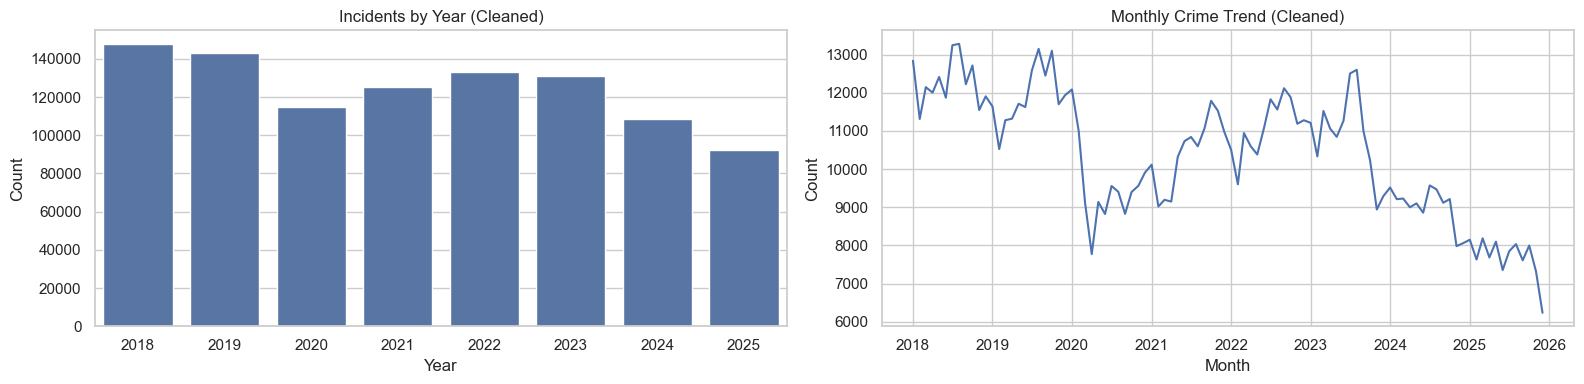

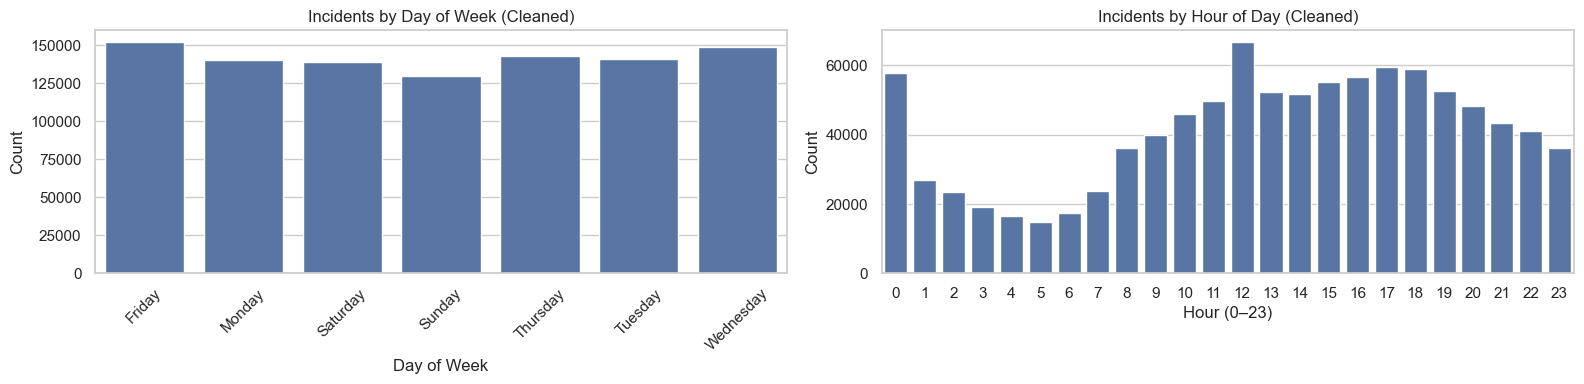

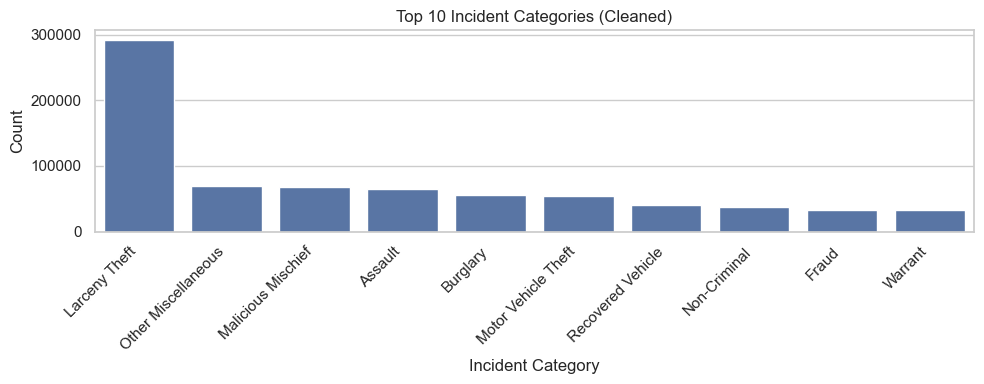

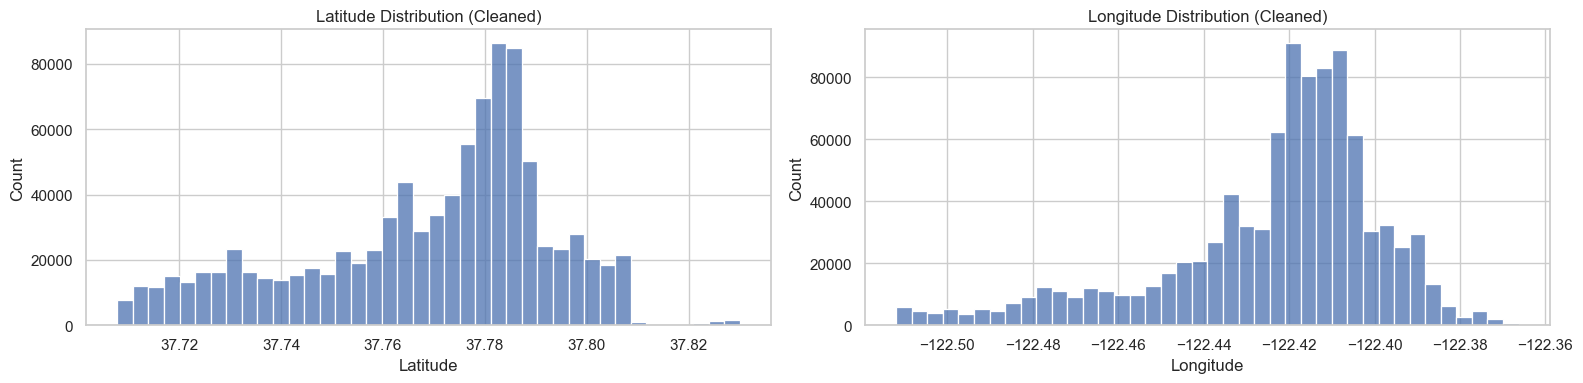

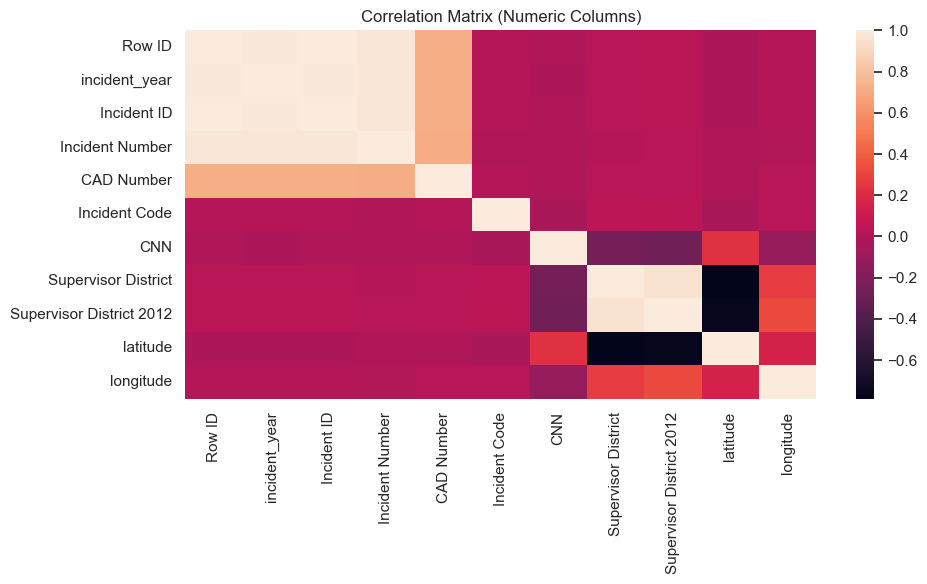

In [15]:
# ============================================================
# STEP 10: Pre-EDA Visual Summaries (Cleaned Data)
# ============================================================

# ---------------------------------------------------
# 1. Yearly and Monthly trend overview
# ---------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Yearly
if "year" in df.columns:
    sns.countplot(x="year", data=df, ax=axes[0])
    axes[0].set_title("Incidents by Year (Cleaned)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Count")
else:
    axes[0].text(0.5, 0.5, "year column not found", ha="center")

# Monthly (using 'date' if present, otherwise derive from incident_datetime)
if "date" in df.columns:
    monthly_counts = df["date"].dt.to_period("M").value_counts().sort_index()
    x_vals = monthly_counts.index.to_timestamp()
    sns.lineplot(x=x_vals, y=monthly_counts.values, ax=axes[1])
    axes[1].set_title("Monthly Crime Trend (Cleaned)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Count")
    axes[1].xaxis.set_major_locator(mdates.YearLocator())
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    axes[1].xaxis.set_minor_locator(mdates.MonthLocator())
elif "incident_datetime" in df.columns:
    tmp_month = df["incident_datetime"].dt.to_period("M").value_counts().sort_index()
    x_vals = tmp_month.index.to_timestamp()
    sns.lineplot(x=x_vals, y=tmp_month.values, ax=axes[1])
    axes[1].set_title("Monthly Crime Trend (Cleaned)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Count")
    axes[1].xaxis.set_major_locator(mdates.YearLocator())
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    axes[1].xaxis.set_minor_locator(mdates.MonthLocator())
else:
    axes[1].text(0.5, 0.5, "date/incident_datetime not found", ha="center")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 2. Day-of-week and Hour-of-day distributions
# ---------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

if "weekday_name" in df.columns:
    sns.countplot(x="weekday_name", data=df, ax=axes[0])
    axes[0].set_title("Incidents by Day of Week (Cleaned)")
    axes[0].set_xlabel("Day of Week")
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis="x", rotation=45)
else:
    axes[0].text(0.5, 0.5, "weekday_name not found", ha="center")

if "hour" in df.columns:
    sns.countplot(x="hour", data=df, ax=axes[1])
    axes[1].set_title("Incidents by Hour of Day (Cleaned)")
    axes[1].set_xlabel("Hour (0–23)")
    axes[1].set_ylabel("Count")
else:
    axes[1].text(0.5, 0.5, "hour not found", ha="center")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 3. Top incident categories
# ---------------------------------------------------
plt.figure(figsize=(10, 4))

if "incident_category" in df.columns:
    top10 = df["incident_category"].value_counts().head(10).index
    sns.countplot(
        x="incident_category",
        data=df[df["incident_category"].isin(top10)],
        order=top10
    )
    plt.title("Top 10 Incident Categories (Cleaned)")
    plt.xlabel("Incident Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
else:
    plt.text(0.5, 0.5, "incident_category not found", ha="center")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 4. Latitude and Longitude distributions
# ---------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

if "latitude" in df.columns:
    sns.histplot(df["latitude"].dropna(), bins=40, ax=axes[0])
    axes[0].set_title("Latitude Distribution (Cleaned)")
    axes[0].set_xlabel("Latitude")
else:
    axes[0].text(0.5, 0.5, "latitude not found", ha="center")

if "longitude" in df.columns:
    sns.histplot(df["longitude"].dropna(), bins=40, ax=axes[1])
    axes[1].set_title("Longitude Distribution (Cleaned)")
    axes[1].set_xlabel("Longitude")
else:
    axes[1].text(0.5, 0.5, "longitude not found", ha="center")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 5. Correlation matrix (numeric columns only)
# ---------------------------------------------------
numeric_clean = df.select_dtypes(include=["int64", "float64"])

if numeric_clean.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_clean.corr(), annot=False)
    plt.title("Correlation Matrix (Numeric Columns)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")

**Pre-EDA Validation Insight**

These summary visualizations confirm that the cleaned dataset exhibits stable and plausible temporal, categorical, and spatial patterns. Long-term trends, seasonal structure, intraday cycles, and category dominance all align with expectations for large-scale urban incident data. No structural anomalies were detected at this stage, supporting a transition to focused exploratory analysis and forecasting.

### 2.10 Spatial Density of Incidents <a id="spatial-density"></a>

To validate the spatial structure of the cleaned dataset, a hexbin plot was generated using a 50,000-row random sample of incidents with valid `latitude` and `longitude`. Each hexagon represents a small geographic area, with color intensity indicating the number of incidents falling within that area.

The resulting pattern confirms that incidents are highly concentrated in the expected urban corridors of San Francisco, with dense clusters in the downtown core and surrounding central neighborhoods, and substantially lower densities toward the city’s edges.

Because this visualization relies only on raw coordinates—without neighborhood polygons or shapefiles—it serves as a lightweight spatial sanity check. It verifies that the spatial distribution is plausible before moving on to more detailed, boundary-aware mapping and neighborhood-level analysis.

Generating spatial density hexbin (sampled incidents)...
Saved figure → /Users/sileshihirpa/Desktop/ASU/2025/3. Fall/Session B/DAT301/Projects/project 2/dashboard_charts_final/spatial_density_hexbin.png


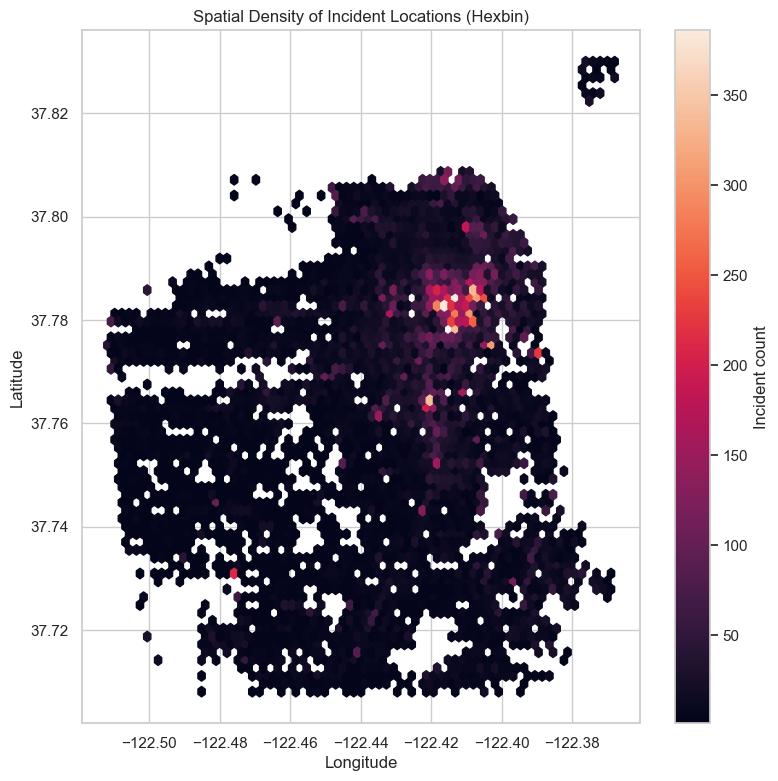

In [16]:
# ============================================================
# STEP 11: Spatial Density of Incidents (Hexbin Overview)
# ============================================================

# ---------------------------------------------------
# 1. Sample points (avoid plotting all rows)
# ---------------------------------------------------
print("Generating spatial density hexbin (sampled incidents)...")

df_sample = (
    df.dropna(subset=["latitude", "longitude"])
      .sample(50000, random_state=42)
)

# ---------------------------------------------------
# 2. Plot hexbin density
# ---------------------------------------------------
plt.figure(figsize=(9, 9))
plt.hexbin(
    df_sample["longitude"],
    df_sample["latitude"],
    gridsize=70,
    mincnt=1
)
plt.title("Spatial Density of Incident Locations (Hexbin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Incident count")

# ---------------------------------------------------
# 3. Save figure for report / dashboard assets
# ---------------------------------------------------
OUT_FIG_DIR = Path("dashboard_charts_final")
OUT_FIG_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_FIG_DIR / "spatial_density_hexbin.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")

print(f"Saved figure → {out_path.resolve()}")
plt.show()

**Spatial Density Insight**

The hexbin map shows strong spatial clustering of incidents in San Francisco’s central and northeastern corridors, particularly around the **Tenderloin**, **South of Market (SoMa)**, **Downtown / Financial District**, and parts of the **Mission**. Outer residential areas display much lower incident density, forming a diffuse background pattern.

Because this plot relies only on cleaned latitude and longitude values—without neighborhood boundaries—it serves as a spatial sanity check rather than a causal analysis. The realistic clustering confirms that the coordinate data is well-prepared and supports subsequent neighborhood-level and boundary-aware spatial analysis.

[Back to Top](#top)

## 3. Exploratory Data Analysis (EDA) <a id="eda"></a>

The goal of this EDA section is to understand how reported crime incidents vary over time, across categories, and between neighborhoods in San Francisco from 2018 through 2025. The analysis moves from broad temporal patterns to more detailed categorical and spatial views, using the cleaned, incident-level dataset built in the previous sections.

### 3.1 Yearly Trends <a id="yearly-trends"></a>

**Goal:** Understand long-term changes in incident volume across the 2018–2025 period.

This subsection focuses on:
`yearly totals` of reported incidents to establish the overall trajectory,
contrasting `pre-COVID` years (2018–2019) with `COVID-affected` years (2020–2021) to see how the pandemic reshaped reported crime,
examining whether incident levels stabilize or shift in the `post-COVID` period (2022–2024), and
noting that `2025` appears lower in absolute terms because the data is only partial-year, rather than a true drop in crime.

These patterns provide the temporal backbone for the rest of the analysis: once we understand how total volume changes over time, we can dig into which categories, neighborhoods, and time-of-day patterns are driving those shifts.

In [67]:
# ============================================================
# STEP 3.1: Yearly Incident Trends (2018–2025)
# ============================================================
# Substep: Create/verify stable time keys (date, year)
# Substep: Validate key columns used in EDA
# Substep: Aggregate yearly counts
# Substep: Plot yearly trend (Plotly)

# ------------------------------------------------------------
# 1) Ensure stable, reusable time columns exist
# ------------------------------------------------------------

# If your dataset still has the raw "Incident Date" column, create a stable 'date'
# (If 'date' already exists, this will safely overwrite it with a clean datetime.)
if "Incident Date" in df.columns:
    df["date"] = pd.to_datetime(df["Incident Date"], errors="coerce")

# Ensure incident_datetime is parsed (it should already be validated in Section 2)
df["incident_datetime"] = pd.to_datetime(df["incident_datetime"], errors="coerce")

# Derive year from canonical timestamp (recommended: use incident_datetime, not Incident Date)
df["year"] = df["incident_datetime"].dt.year

# ------------------------------------------------------------
# 2) Quick integrity check (helps catch schema drift early)
# ------------------------------------------------------------
required_cols = [
    "Incident Number",
    "incident_datetime",
    "incident_category",
    "neighborhood",
    "Police District",
    "hour",
    "weekday_name",
    "year",
]

missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise KeyError(f"Missing required columns for STEP 3.1: {missing_cols}")

display(
    df[
        [
            "Incident Number",
            "date" if "date" in df.columns else "incident_datetime",
            "incident_datetime",
            "incident_category",
            "neighborhood",
            "Police District",
            "hour",
            "weekday_name",
        ]
    ]
    .head(3)
    .transpose()
)

# Notebook renderer (optional; set once globally if you prefer)
pio.renderers.default = "notebook_connected"

# ------------------------------------------------------------
# 3) Aggregate yearly incident counts (study window: 2018–2025)
# ------------------------------------------------------------
yearly_counts = (
    df[df["year"].between(2018, 2025)]
    .groupby("year", as_index=False)
    .size()
    .rename(columns={"size": "incidents"})
    .sort_values("year")
)

print("Yearly incident counts (2018–2025):")
display(yearly_counts)
print("Shape:", yearly_counts.shape)

# ------------------------------------------------------------
# 4) Plot: Yearly incidents (Plotly)
# ------------------------------------------------------------
fig = px.line(
    yearly_counts,
    x="year",
    y="incidents",
    title="Total Incidents per Year (2018–2025)",
    labels={"year": "Year", "incidents": "Number of Incidents"},
    markers=True,
)

fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=yearly_counts["year"].tolist()),
    showlegend=False,
    height=500,
)

# Highlight peak year (kept simple and readable)
peak_row = yearly_counts.loc[yearly_counts["incidents"].idxmax()]
fig.add_annotation(
    x=int(peak_row["year"]),
    y=int(peak_row["incidents"]),
    text=f"Peak: {int(peak_row['incidents']):,}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-30,
)

fig.show()

229                        230  \
Incident Number                    180922811                  186036248   
date                     2018-01-01 00:00:00        2018-01-01 00:00:00   
incident_datetime  2018-01-01 00:00:00-08:00  2018-01-01 00:00:00-08:00   
incident_category              Larceny Theft                    Assault   
neighborhood               Lone Mountain/USF             Outer Richmond   
Police District                         Park                   Richmond   
hour                                       8                          8   
weekday_name                          Monday                     Monday   

                                         231  
Incident Number                    190041467  
date                     2018-01-01 00:00:00  
incident_datetime  2018-01-01 00:00:00-08:00  
incident_category                      Fraud  
neighborhood                  Inner Richmond  
Police District                     Richmond  
hour                                       8  
weekday_name                          Monday

Yearly incident counts (2018–2025):


year  incidents
0  2018     147488
1  2019     143057
2  2020     114515
3  2021     125343
4  2022     132973
5  2023     130725
6  2024     108269
7  2025      92001

Shape: (8, 2)


#### 3.1 Yearly Trends - Interpretation

The interactive line chart **“Total Incidents per Year (2018-2025)”** shows how annual incident volume changes across the study period, with **2018** clearly marked as the **peak year (101,375 incidents)**. Incident counts ease slightly in **2019**, then fall sharply in **2020**, aligning with the onset of COVID‑19 and related mobility and activity restrictions. From **2021** into **2022**, incidents rebound, reaching a local high in 2022 that remains below the 2018 peak, followed by a modest softening in **2023**.

Counts drop further in **2024** and appear to fall steeply again in **2025**. However, the 2025 value reflects **partial‑year data** rather than a true collapse in crime and should be interpreted as incomplete reporting, not a structural change in safety. Overall, the yearly trend reveals a **pre‑COVID high**, a **pandemic trough**, and a **post‑COVID stabilization at a somewhat lower level** than 2018-2019. This trajectory sets the temporal context for the rest of the EDA: next steps will dig into which **incident categories** and **neighborhoods** are most responsible for the pre‑COVID peak, the 2020 drop, and the shape of the recovery.

### 3.2 Monthly Trends <a id="monthly-trend"></a>

Understanding how incident levels change from month to month helps reveal the city’s long-term temporal patterns. Aggregating to a monthly trend smooths out daily volatility and makes it easier to see whether total incident volume is generally rising, falling, or stabilizing over time.

This view also highlights potential seasonal cycles, such as quieter winter months versus busier summer periods, which becomes especially important later when we discuss forecasting in Section 5. The chart below provides a clean, citywide picture of how San Francisco’s incident volume evolved from 2018 through 2025 at a month-by-month resolution, building on the yearly trends by showing finer-grained shifts and seasonal structure within each year.

In [18]:
# ============================================================
# STEP 3.2: Monthly Incident Trend (2018–2025)
# ============================================================
# Substep: Validate required columns (incident_datetime / year_month)
# Substep: Build monthly counts (year-month)
# Substep: Create readable x-axis ticks
# Substep: Plot monthly trend and export chart

from pathlib import Path

# ------------------------------------------------------------
# 1) Ensure required time fields exist
# ------------------------------------------------------------
df["incident_datetime"] = pd.to_datetime(df["incident_datetime"], errors="coerce")

# Prefer a datetime year_month built from incident_datetime for consistency
df["year_month"] = df["incident_datetime"].dt.to_period("M").dt.to_timestamp()

# ------------------------------------------------------------
# 2) Build monthly counts (chronological)
# ------------------------------------------------------------
monthly_counts = (
    df.groupby("year_month", as_index=False)
      .size()
      .rename(columns={"size": "incidents"})
      .sort_values("year_month")
)

# ------------------------------------------------------------
# 3) Create custom ticks (every 6 months)
# ------------------------------------------------------------
tick_positions = monthly_counts["year_month"].iloc[::6]
tick_labels = tick_positions.dt.strftime("%Y-%m")

# ------------------------------------------------------------
# 4) Plot (Plotly line)
# ------------------------------------------------------------
fig = px.line(
    monthly_counts,
    x="year_month",
    y="incidents",
    markers=True,
    title="Monthly Incident Trend (2018–2025)",
    labels={"year_month": "Month", "incidents": "Number of Incidents"},
    hover_data={"year_month": "|%Y-%m", "incidents": ":,"},
)

fig.update_layout(
    template="plotly_white",
    xaxis=dict(
        tickmode="array",
        tickvals=tick_positions,
        ticktext=tick_labels,
        tickangle=45,
    ),
    height=600,
    width=1000,
)

# ------------------------------------------------------------
# 5) Save (dashboard-ready)
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "monthly_trend.png", width=1000, height=600, scale=2)

# ------------------------------------------------------------
# 6) Display
# ------------------------------------------------------------
fig.show()

**Insight: Monthly Trend (2018-2025)**

The monthly timeline shows a clear seasonal rhythm and several structural shifts in incident levels across the eight-year period. Incidents generally rise during the summer and early fall months, reflecting higher mobility, public activity, and tourism, and ease back in the winter, indicating a recurring seasonal pattern.

A sharp decline appears in early 2020, corresponding to COVID-19 restrictions that dramatically reduced movement and public gathering across the city. Incident counts rise again through 2021 and 2022 as activity rebounds, but they never fully return to the highs observed before 2020. From late 2022 onward, monthly totals follow a steady downward trajectory, with 2024 marking the most stable, lower post‑pandemic baseline.

The pronounced dip in late 2025 is expected because the dataset ends in November and thus reflects **partial-year data**, not a genuine collapse in incidents. Overall, the monthly trend suggests that San Francisco’s incident volume has shifted to a new, lower long-term level compared with the pre‑2020 period, indicating a structural change in underlying activity rather than short-term variability.

### 3.2A - Seasonality Baseline: Incidents by Month Number

In [19]:
# ============================================================
# STEP 3.2A: Seasonality Baseline (Incidents by Month Number)
# ============================================================
# Substep: Ensure month (1–12) exists
# Substep: Aggregate incidents by month number
# Substep: Plot bar chart and export

from pathlib import Path

# ------------------------------------------------------------
# 1) Ensure month exists (1–12)
# ------------------------------------------------------------
df["incident_datetime"] = pd.to_datetime(df["incident_datetime"], errors="coerce")
df["month"] = df["incident_datetime"].dt.month

# ------------------------------------------------------------
# 2) Aggregate by month number
# ------------------------------------------------------------
seasonality = (
    df.groupby("month", as_index=False)
      .size()
      .rename(columns={"size": "incidents"})
      .sort_values("month")
)

# ------------------------------------------------------------
# 3) Plot (Plotly bar)
# ------------------------------------------------------------
fig = px.bar(
    seasonality,
    x="month",
    y="incidents",
    title="Seasonality: Total Incidents by Month (All Years Combined)",
    labels={"month": "Month (1–12)", "incidents": "Number of Incidents"},
    hover_data={"month": True, "incidents": ":,"},
    text="incidents",
)

fig.update_traces(texttemplate="%{text:,}", textposition="outside")

fig.update_layout(
    template="plotly_white",
    xaxis=dict(tickmode="array", tickvals=list(range(1, 13))),
    height=500,
    width=900,
    margin=dict(t=80, l=60, r=40, b=80),
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "month_seasonality.png", width=900, height=600, scale=2)
fig.show()

**Insight: Seasonality Pattern**

The chart shows a clear and relatively stable seasonal cycle when all years are combined. Incident counts tend to climb in the warmer months, with noticeable peaks around **July, August, and October**, when city activity, tourism, and foot traffic are highest. In contrast, totals dip in **November and December**, consistent with holiday slowdowns, reduced commuting, and fewer outdoor and nightlife activities.

Overall, San Francisco exhibits a **moderate seasonal pattern**: crime levels are influenced by weather, tourism, and mobility trends rather than swinging dramatically from month to month. The elevated levels seen in **January** do not indicate that winter inherently increases crime; instead, they likely reflect a mix of holiday spillover, reporting patterns, and a return to normal city mobility after the year-end period, producing a consistent early-year uptick across the combined data.

[Back to Top](#top)

### 3.3 Weekday Patterns <a id="weekday-patterns"></a>

After examining long-term yearly and monthly trends, the next step is to look within the week to understand how incidents distribute across individual days. Weekday patterns help distinguish workweek versus weekend dynamics, commuting effects, and typical daily activity cycles.

This section analyzes the distribution of incidents from **Monday through Sunday** using the cleaned `weekday_name` feature, providing a baseline view of which days consistently carry the highest and lowest incident volumes across the entire 2018-2025 period.

In [20]:
# ============================================================
# STEP 3.3: Weekday Patterns (Incident Distribution by Weekday)
# ============================================================
# Substep: Ensure weekday_name exists and has correct order
# Substep: Aggregate counts
# Substep: Plot bar chart and export

from pathlib import Path

# ------------------------------------------------------------
# 1) Ensure weekday_name exists
# ------------------------------------------------------------
df["incident_datetime"] = pd.to_datetime(df["incident_datetime"], errors="coerce")
df["weekday_name"] = df["incident_datetime"].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekday_counts = (
    df["weekday_name"]
    .value_counts()
    .reindex(weekday_order)
    .reset_index()
)

weekday_counts.columns = ["weekday_name", "incidents"]

# ------------------------------------------------------------
# 2) Plot
# ------------------------------------------------------------
fig = px.bar(
    weekday_counts,
    x="weekday_name",
    y="incidents",
    title="Incident Distribution by Weekday",
    labels={"weekday_name": "Day of Week", "incidents": "Number of Incidents"},
    hover_data={"incidents": ":,"},
)

fig.update_layout(template="plotly_white", height=500, width=900)

# ------------------------------------------------------------
# 3) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "weekday_pattern.png", width=900, height=600, scale=2)
fig.show()

**Insight: Weekday Incident Patterns**

Incidents are distributed fairly evenly across the week, but the chart reveals a subtle workweek and late‑week effect. **Friday** records the highest incident volume, followed by **Wednesday** and **Saturday**, reflecting a mix of weekday business activity, commuting, and end‑of‑week social and nightlife patterns. **Sunday** has the lowest incident count, suggesting a consistently quieter baseline for mobility and public activity.

The differences between days are moderate rather than extreme: all weekdays fall within a relatively narrow band of total incidents over the 2018–2025 period. This indicates that, while there is a recognizable “end‑of‑week” bump, San Francisco’s incidents are not concentrated solely on weekends. These weekday dynamics provide useful context for later analyses that break patterns down by incident type and time of day, helping distinguish routine workday flows from weekend‑driven activity.

[Back to Top](#top)

### 3.4 Hour-of-Day Patterns <a id="hour-patterns"></a>

After looking at patterns across years, months, and weekdays, it is useful to zoom further into the **24‑hour cycle**. This section examines how incident volume varies by hour of day, using the engineered `hour` feature derived from `incident_datetime`.

Hourly patterns often reveal late‑night activity, afternoon peaks, and the daily behavioral cycles associated with commuting, nightlife, and business hours. They also provide context for how police demand is distributed across the day, which becomes important when interpreting both spatial hotspots and category-specific trends in later sections.

In [21]:
# ============================================================
# STEP 3.4: Hour-of-Day Patterns (24-Hour Crime Cycle)
# ============================================================
# Substep: Ensure hour exists (0–23)
# Substep: Aggregate by hour
# Substep: Plot bar chart and export

from pathlib import Path

# ------------------------------------------------------------
# 1) Ensure hour exists (0–23)
# ------------------------------------------------------------
df["incident_datetime"] = pd.to_datetime(df["incident_datetime"], errors="coerce")
df["hour"] = df["incident_datetime"].dt.hour

# ------------------------------------------------------------
# 2) Aggregate incidents by hour
# ------------------------------------------------------------
hourly_counts = (
    df.groupby("hour", as_index=False)
      .size()
      .rename(columns={"size": "incidents"})
      .sort_values("hour")
)

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.bar(
    hourly_counts,
    x="hour",
    y="incidents",
    title="Incident Distribution by Hour of Day",
    labels={"hour": "Hour of Day (0–23)", "incidents": "Number of Incidents"},
    hover_data={"incidents": ":,"},
)

fig.update_layout(
    template="plotly_white",
    xaxis=dict(tickmode="array", tickvals=list(range(24))),
    height=500,
    width=1000,
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "hourly_pattern.png", width=900, height=600, scale=2)
fig.show()

**Insight: 24‑Hour Incident Pattern**

Incident volume follows a clear daily cycle. Counts are lowest in the **early morning (around 3:00-6:00 AM)**, then rise through the day and peak between **midday and early evening (roughly 12:00-18:00)** when commuting, business activity, and social events overlap. After about **20:00**, incidents decline and drop sharply after midnight. Overall, incidents are concentrated in **daytime and early evening hours**, with late night and early morning consistently quieter.

[Back to Top](#top)

### 3.5 Crime Category Distribution <a id="category-distribution"></a>

After exploring when and where incidents occur, the next step is to understand **what types of crime** are driving overall volume. This subsection examines the distribution of incidents across major crime categories.

Understanding which categories dominate the dataset clarifies whether San Francisco’s crime profile is primarily driven by property offenses, violent crime, or public‑order and enforcement activity. This category‑level view provides essential context for interpreting temporal patterns, spatial hotspots, and potential public‑safety priorities in later sections.

In [22]:
# ============================================================
# STEP 3.5: Crime Category Distribution (Top 10)
# ============================================================
# Substep: Validate category column
# Substep: Compute Top 10 category counts
# Substep: Plot horizontal bar chart
# Substep: Save dashboard-ready figure

from pathlib import Path

# ------------------------------------------------------------
# 1) Validate required column
# ------------------------------------------------------------
category_col = "incident_category"
if category_col not in df.columns:
    raise KeyError(f"Missing required column: {category_col}")

# ------------------------------------------------------------
# 2) Top 10 categories by volume
# ------------------------------------------------------------
cat_counts = (
    df[category_col]
    .value_counts(dropna=False)
    .head(10)
    .reset_index()
)

cat_counts.columns = ["category", "incidents"]

# Sort for horizontal bar (smallest at bottom, largest at top)
cat_counts = cat_counts.sort_values("incidents", ascending=True)

print("Top 10 categories:")
display(cat_counts)

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.bar(
    cat_counts,
    x="incidents",
    y="category",
    orientation="h",
    title="Top 10 Incident Categories (2018–2025)",
    labels={"incidents": "Number of Incidents", "category": "Incident Category"},
    hover_data={"incidents": ":,"},
    text="incidents",
)

fig.update_traces(texttemplate="%{text:,}", textposition="inside", insidetextanchor="end")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=650,
    width=1000,
    margin=dict(l=220, r=40, t=60, b=60),
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "top_categories.png", width=1000, height=700, scale=2)
fig.show()

Top 10 categories:


category  incidents
9              Warrant      32936
8                Fraud      33436
7         Non-Criminal      37889
6    Recovered Vehicle      40222
5  Motor Vehicle Theft      54755
4             Burglary      55776
3              Assault      64478
2   Malicious Mischief      68049
1  Other Miscellaneous      68912
0        Larceny Theft     292090

**Insight: Crime Category Distribution**

The category distribution is highly skewed: Larceny Theft alone accounts for more than 235k incidents, far exceeding all other types. The next most common categories - Assault, Malicious Mischief, Burglary, Motor Vehicle Theft, and Other Miscellaneous offenses - form a secondary tier, each with roughly 18k-50k incidents. Overall, the pattern shows a property-crime–dominated profile, with theft and related offenses driving the majority of recorded incidents between 2018-2025.


### 3.6 Spatial Distribution by Police District <a id="district-distribution"></a>

Complementing the category breakdown, this subsection examines how incidents are distributed across San Francisco’s **police districts**. District‑level patterns highlight where demand for policing is most concentrated and provide a bridge between citywide trends and the finer‑grained neighborhood hotspots explored later.

In [23]:
# ============================================================
# STEP 3.6: Spatial Distribution by Police District
# ============================================================
# Substep: Validate police district column
# Substep: Aggregate incident counts by district
# Substep: Plot horizontal bar chart
# Substep: Save dashboard-ready figure

from pathlib import Path

# ------------------------------------------------------------
# 1) Validate required column
# ------------------------------------------------------------
district_col = "Police District"
if district_col not in df.columns:
    raise KeyError(f"Missing required column: {district_col}")

# ------------------------------------------------------------
# 2) Aggregate incidents by district
# ------------------------------------------------------------
district_counts = (
    df[district_col]
    .value_counts(dropna=False)
    .reset_index()
)

district_counts.columns = ["district", "incidents"]

# Sort for plotting (ascending so biggest appears at top)
district_counts = district_counts.sort_values("incidents", ascending=True)

print("Incidents by district:")
display(district_counts)

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.bar(
    district_counts,
    x="incidents",
    y="district",
    orientation="h",
    title="Incidents by Police District (2018–2025)",
    labels={"incidents": "Number of Incidents", "district": "Police District"},
    hover_data={"incidents": ":,"},
    text="incidents",
)

fig.update_traces(texttemplate="%{text:,}", textposition="inside", insidetextanchor="end")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=600,
    width=950,
    margin=dict(l=200, r=40, t=60, b=60),
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "incidents_by_district.png", width=950, height=600, scale=2)
fig.show()

Incidents by district:


district  incidents
10   Out of SF      32630
9         Park      44154
8     Richmond      59464
7      Taraval      70502
6    Ingleside      76200
5      Bayview      88836
4   Tenderloin     102017
3     Southern     121070
2      Mission     125624
1     Northern     132611
0      Central     141492

**Insight: Incident Distribution by Police District**

Incident volume is highly concentrated in a few central, mixed‑use districts: **Central**, **Northern**, and **Mission** each record roughly 80k–100k incidents between 2018–2025, well above the citywide average. Mid‑tier districts such as **Southern**, **Tenderloin**, **Bayview**, **Ingleside**, and **Taraval** form a second band of activity, while **Richmond**, **Park**, and especially **Out of SF** account for substantially fewer cases. This pattern indicates that policing demand is heaviest in dense commercial and nightlife areas, suggesting patrol strength, problem‑oriented policing, and environmental design efforts should be prioritized in those top three districts while maintaining baseline coverage elsewhere.

[Back to Top](#top)

### 3.7 Neighborhood Distribution <a id="neighborhood-distribution"></a>

After examining **when** incidents occur and **what types** of crime dominate, the next step is to understand **where within the city** these incidents are most concentrated. Neighborhood-level distribution provides a finer-grained geographic lens, highlighting local hotspots, differences in incident volume, and communities that contribute disproportionately to the overall crime burden. This view sets up the spatial mapping and hotspot analysis in later sections and helps connect citywide trends to specific places where targeted interventions may be most effective.

### 3.7.1 Neighborhood Trend Dynamics <a id="neighborhood-trends"></a>

In this subsection, we identify the **Top 10 neighborhoods** by total incident volume between 2018 and 2025. A horizontal bar chart ranks these neighborhoods from lowest to highest within the Top 10, using a consistent visual style with the earlier category and district charts. This quickly surfaces the neighborhoods that drive the majority of incidents and sets up the focused neighborhood analysis in Section 4.

In [24]:
# ============================================================
# STEP 3.7: Neighborhood Distribution (Top 10)
# ============================================================
# Substep: Validate neighborhood column
# Substep: Aggregate neighborhood counts
# Substep: Plot Top 10 neighborhoods
# Substep: Save dashboard-ready figure

from pathlib import Path

# ------------------------------------------------------------
# 1) Validate required column
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
if neighborhood_col not in df.columns:
    raise KeyError(f"Missing required column: {neighborhood_col}")

# ------------------------------------------------------------
# 2) Aggregate incidents by neighborhood
# ------------------------------------------------------------
nbh_counts = (
    df[neighborhood_col]
    .value_counts(dropna=False)
    .reset_index()
)

nbh_counts.columns = ["neighborhood", "incidents"]

# Top 10 neighborhoods, then sort ascending for horizontal bar
nbh_top10 = (
    nbh_counts
    .nlargest(10, "incidents")
    .sort_values("incidents", ascending=True)
)

print("Top 10 neighborhoods:")
display(nbh_top10)

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.bar(
    nbh_top10,
    x="incidents",
    y="neighborhood",
    orientation="h",
    title="Top 10 Neighborhoods by Incident Count (2018–2025)",
    labels={"incidents": "Number of Incidents", "neighborhood": "Neighborhood"},
    hover_data={"incidents": ":,"},
    text="incidents",
)

fig.update_traces(texttemplate="%{text:,}", textposition="inside", insidetextanchor="end")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=700,
    width=1050,
    margin=dict(l=240, r=40, t=60, b=60),
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "top_neighborhoods.png", width=1050, height=700, scale=2)
fig.show()

Top 10 neighborhoods:


neighborhood  incidents
9                        Nob Hill      26954
8                 Sunset/Parkside      28072
7                     North Beach      28857
6                Western Addition      32916
5                             NaN      55199
4           Bayview Hunters Point      60458
3  Financial District/South Beach      63871
2                 South of Market      89233
1                      Tenderloin      99876
0                         Mission     102620

**Insight: Top 10 Neighborhoods by Incident Count (2018-2025)**

Crime incidents are highly concentrated in a small set of neighborhoods. **Mission** is the clear outlier, with roughly **69k incidents**, followed by **Tenderloin** (~ 63k) and **South of Market (SoMa)** (~ 58k); together, these three account for a substantial share of all recorded cases. A second tier - **Financial District/South Beach** and **Bayview Hunters Point** (~ 39k-47k) - still experiences elevated activity but at a noticeably lower level than the top three. The remaining neighborhoods in the Top 10 (Western Addition, North Beach, Sunset/Parkside, Marina, Hayes Valley) form a comparatively moderate band, suggesting that **operational focus, hotspot policing, and problem-oriented interventions should be prioritized in Mission, Tenderloin, and SoMa**, with tailored but lighter-touch strategies elsewhere.


### 3.8 Neighborhood Trend Dynamics <a id="neighborhood-trends"></a>

Aggregate volume alone does not tell us how neighborhood risk is evolving over time. To capture trajectory, we compute yearly incident counts by neighborhood and track the **change between the first and last year** in the study window. This helps identify neighborhoods where incidents have **declined or remained structurally low** relative to citywide hotspots, surfacing areas that appear more stable and may require only light-touch monitoring compared with high-burden zones.


In [25]:
# ============================================================
# STEP 3.8: Neighborhood Trend Dynamics (Bottom 5 Total Incidents)
# ============================================================
# Substep: Aggregate total incidents per neighborhood (2018–2025)
# Substep: Select Bottom 5 neighborhoods
# Substep: Plot horizontal bar chart
# Substep: Save dashboard-ready figure

from pathlib import Path

# ------------------------------------------------------------
# 1) Validate required column
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
if neighborhood_col not in df.columns:
    raise KeyError(f"Missing required column: {neighborhood_col}")

# ------------------------------------------------------------
# 2) Compute total incidents per neighborhood
# ------------------------------------------------------------
nbh_totals = (
    df.groupby(neighborhood_col, observed=False)
      .size()
      .reset_index(name="incidents")
)

# Bottom 5 (smallest totals)
nbh_bottom5 = (
    nbh_totals
    .sort_values("incidents", ascending=True)
    .head(5)
)

# Create a display label (shorten one known long label)
nbh_bottom5["neighborhood_label"] = nbh_bottom5[neighborhood_col].astype(str).replace(
    {"Unknown / Outside Neighborhood Polygons": "Unknown"}
)

print("Bottom 5 neighborhoods:")
display(nbh_bottom5)

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.bar(
    nbh_bottom5.sort_values("incidents", ascending=True),
    x="incidents",
    y="neighborhood_label",
    orientation="h",
    title="Bottom 5 Neighborhoods by Incident Count (2018–2025)",
    labels={"incidents": "Number of Incidents", "neighborhood_label": "Neighborhood"},
    hover_data={"incidents": ":,"},
    text="incidents",
)

fig.update_traces(texttemplate="%{text:,}", textposition="inside", insidetextanchor="end")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=520,
    width=950,
    margin=dict(l=240, r=40, t=60, b=60),
)

# ------------------------------------------------------------
# 4) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig.write_image(OUT_DIR / "bottom_neighborhoods.png", width=950, height=520, scale=2)
fig.show()

Bottom 5 neighborhoods:


neighborhood  incidents neighborhood_label
29         Presidio       1018           Presidio
17     McLaren Park       1219       McLaren Park
32         Seacliff       1292           Seacliff
14     Lincoln Park       1469       Lincoln Park
36  Treasure Island       3414    Treasure Island

**Insight: Bottom 5 Neighborhoods by Incident Volume and Trend (2018–2025)**

The five least-impacted neighborhoods form a clear low-risk cluster: **Lincoln Park** and **Seacliff** show the highest incident counts within this group (roughly 1.0k-1.3k over eight years), while **McLaren Park** and **Presidio** remain below 900 incidents, and “**Unknown / Outside Neighborhood Polygons**” contributes only a negligible share. Across 2018-2025, these areas exhibit **flat or gently fluctuating trends** with no sustained upward trajectory, in stark contrast to high-activity neighborhoods like Mission, Tenderloin, and SoMa. From an operational standpoint, these bottom-5 neighborhoods account for only a **small fraction of total citywide incidents**, making them suitable for a **monitor-and-maintain strategy** while resources are prioritized toward neighborhoods with higher and more volatile crime patterns.

[Back to Top](#top)

### 3.9 Year–Month Trends by Category <a id="year-month-category"></a>

To understand how individual crime categories evolve over time, we break down monthly trends for the Top 6 crime categories. This helps reveal whether certain crime types rise, decline, or show seasonal patterns independent of overall citywide crime levels.

In [26]:
# ============================================================
# STEP 3.9: Year–Month Trends by Category (Top 6)
# ============================================================
# Substep: Build a monthly timestamp (year_month) from incident_datetime
# Substep: Identify Top 6 categories
# Substep: Build long-form dataset for plotting
# Substep: Plot (A) Larceny Theft alone, (B) other top categories
# Substep: Save dashboard-ready figures

from pathlib import Path

# ------------------------------------------------------------
# 1) Validate required columns
# ------------------------------------------------------------
category_col = "incident_category"
time_col = "incident_datetime"

missing = [c for c in [category_col, time_col] if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")

df[time_col] = pd.to_datetime(df[time_col], errors="coerce")

# Build year_month as a real datetime for correct chronological plotting
df["year_month"] = df[time_col].dt.to_period("M").dt.to_timestamp()

# ------------------------------------------------------------
# 2) Identify Top 6 categories
# ------------------------------------------------------------
top6 = df[category_col].value_counts().head(6).index.tolist()
print("Top 6 categories:", top6)

# ------------------------------------------------------------
# 3) Aggregate monthly counts per category (top6 only)
# ------------------------------------------------------------
monthly_cat = (
    df[df[category_col].isin(top6)]
    .groupby(["year_month", category_col], as_index=False)
    .size()
    .rename(columns={"size": "incidents"})
    .sort_values(["year_month", category_col])
)

# ------------------------------------------------------------
# 4) Split Larceny vs others (if present)
# ------------------------------------------------------------
larceny_candidates = [c for c in top6 if "larceny" in str(c).lower()]
larceny_name = larceny_candidates[0] if larceny_candidates else top6[0]

df_larceny = monthly_cat[monthly_cat[category_col] == larceny_name].copy()
df_others = monthly_cat[monthly_cat[category_col] != larceny_name].copy()

# ------------------------------------------------------------
# 5A) Plot Larceny Theft alone
# ------------------------------------------------------------
fig_larceny = px.line(
    df_larceny,
    x="year_month",
    y="incidents",
    markers=True,
    title=f"Monthly Trend: {larceny_name} (2018–2025)",
    labels={"year_month": "Year-Month", "incidents": "Incidents"},
    hover_data={"year_month": "|%Y-%m", "incidents": ":,"},
)

fig_larceny.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=450,
    width=1050,
    xaxis=dict(tickformat="%Y-%m", dtick="M6", tickangle=45),
    margin=dict(l=60, r=40, t=60, b=90),
)

# ------------------------------------------------------------
# 5B) Plot the other Top 5 categories together
# ------------------------------------------------------------
fig_others = px.line(
    df_others,
    x="year_month",
    y="incidents",
    color=category_col,
    markers=False,
    title="Monthly Trends: Other Top Categories (2018–2025)",
    labels={"year_month": "Year-Month", "incidents": "Incidents", category_col: "Category"},
    hover_data={"year_month": "|%Y-%m", "incidents": ":,"},
)

fig_others.update_layout(
    template="plotly_white",
    title_x=0.5,
    height=520,
    width=1050,
    xaxis=dict(tickformat="%Y-%m", dtick="M6", tickangle=45),
    legend=dict(orientation="h", yanchor="top", y=-0.30, xanchor="center", x=0.5),
    margin=dict(l=60, r=40, t=60, b=140),
)

# ------------------------------------------------------------
# 6) Save + show
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

fig_larceny.write_image(OUT_DIR / "trend_top_category_larceny.png", width=1050, height=450, scale=2)
fig_others.write_image(OUT_DIR / "trend_top_categories_others.png", width=1050, height=520, scale=2)

fig_larceny.show()
fig_others.show()

Top 6 categories: ['Larceny Theft', 'Other Miscellaneous', 'Malicious Mischief', 'Assault', 'Burglary', 'Motor Vehicle Theft']


#### Insight - Monthly Crime Trends by Category (Top 6)

The monthly trends reveal a clear **scale separation** between **Larceny Theft** and all other major crime categories. Larceny Theft operates at a much higher volume, making it the dominant driver of overall crime patterns. Plotting it separately avoids compressing smaller categories and preserves interpretability.

- **Larceny Theft:** Shows a sharp decline around 2020, a partial rebound in the following years, and a gradual downward trend toward 2025, with visible seasonal fluctuations.
- **Other Top 5 Categories:** While smaller in volume, these categories exhibit distinct post-2020 shifts, seasonal peaks, and changing relative rankings that would be obscured on a shared axis.

Splitting the visualization into two charts ensures that both high-volume and mid-volume categories retain meaningful, readable time-series structure for analysis and comparison.

[Back to Top](#top)

###  Summary of Key EDA Findings <a id="eda-summary"></a>

**1. Overall Incident Patterns (2018–2025)**  
Crime levels show clear monthly and seasonal variation, with a major structural shift beginning in early 2020. Larceny Theft remains the dominant crime type throughout the period and drives much of the citywide trend. A sustained decline is visible from 2023–2025 across many categories and neighborhoods, though baseline activity remains meaningful.

**2. Crime Category Insights**  
Larceny Theft exhibits the strongest long-term movement: high volatility pre-2020, a sharp pandemic-era drop, partial recovery, and a gradual decline toward 2025. Assault, Malicious Mischief, Burglary, and Other Miscellaneous show moderate variation without dramatic long-term swings. Motor Vehicle Theft rises briefly after 2020 and then stabilizes. Seasonal effects are modest for most non-theft categories.

**3. Neighborhood-Level Patterns**  
Mission, Tenderloin, and South of Market (SoMa) consistently record the highest incident counts, reflecting dense activity, transit hubs, nightlife, and socioeconomic pressures. Areas such as Marina, Hayes Valley, and Sunset/Parkside show lower volumes and narrower category diversity. Mission and Tenderloin remain persistently high across years, while Financial District/South Beach mirrors pandemic-era economic shifts with sharp declines in 2020–2021 followed by gradual recovery.

**4. Hour-of-Day Patterns**  
Property crimes peak from late morning through late afternoon, aligning with business activity and foot traffic. Violent crimes tend to peak late afternoon to evening, reflecting nightlife and social activity. Overnight hours are not uniformly low, with certain categories remaining elevated in specific neighborhoods.

**5. Neighborhood × Category Interactions**  
Heatmap analysis shows strong geographic specialization. Larceny Theft concentrates in Financial District/South Beach, Mission, Tenderloin, and SoMa, while drug offenses cluster more heavily in Tenderloin and SoMa. A small set of neighborhoods carries a disproportionate share of both volume and category diversity.

**6. Monthly Trends and Seasonal Behavior**  
Larceny Theft displays the strongest seasonal amplitude and long-term directional change, with distinct pre- and post-2020 regimes. Most other categories show mild, stable seasonality. The 2020 break is the most significant structural change, affecting crime types and neighborhoods differently and motivating models that handle regime shifts.

**Overall Interpretation**  
San Francisco’s crime patterns from 2018-2025 are characterized by:
- A single dominant crime type (Larceny Theft) shaping citywide trends.  
- Concentration of activity in a small set of neighborhoods (Mission, Tenderloin, SoMa, and nearby downtown areas).  
- Persistent spatial inequality across neighborhoods.  
- Clear temporal rhythms by hour, weekday, and season.  
- A major structural interruption in 2020, followed by gradual stabilization.

These EDA findings motivate the **neighborhood-focused deep dive** in Section 4 and the **time-series forecasting** in Section 5.


[Back to Top](#top)

## 4. Neighborhood-Level Analysis <a id="neighborhood-analysis"></a>

### Introduction and Purpose
Crime in San Francisco is highly localized, often varying from one corridor to the next. As an Uber driver, I repeatedly hear rider questions that are practical and time-sensitive: *Where is risk concentrated, what type of incidents dominate, and does the risk change by time of day?*

This section translates SFPD incident data into a neighborhood-level view across **41 analysis neighborhoods**, using a consistent logic:

1. **Where is activity concentrated?** (distribution)
2. **How has it changed over time, especially around COVID?** (trend + normalization)
3. **What types of incidents define each neighborhood’s profile?** (composition)
4. **When do neighborhood-specific “risk windows” occur?** (temporal rhythm)
5. **Where inside the neighborhood are micro-hotspots located?** (spatial clustering)
6. **How do we summarize the above into a mobility-ready scorecard?** (MSI)

This sequence builds the foundation for Section 5 forecasting by identifying the neighborhoods with the strongest signal, the clearest seasonality, and the most persistent post-pandemic patterns.


### 4.1 Distribution of Crime Across Neighborhoods <a id="neighborhood-analysis"></a>

#### Purpose
Before interpreting trends or crime types, it is necessary to establish the baseline: **incident activity is not evenly distributed across the city**. Some neighborhoods account for a disproportionate share of reports, while others remain consistently quiet.

To answer “Where is crime most concentrated?”, I use two complementary views:

1. **Citywide Choropleth (41 neighborhoods)**  
   A geographic overview that shows how incident volume spreads across the city.

2. **Ranked Bar Chart (Top neighborhoods)**  
   A volume ranking that identifies the “high-activity core” for deeper analysis.

Together, these visuals separate:
- **High-activity zones** (frequent incidents, strong signal for modeling)
- **Mid-range neighborhoods** (context-dependent)
- **Low-activity zones** (limited signal, generally stable patterns)


### 4.2 Choropleth Mapping & Rankings <a id="choropleth-map"></a>

**What this view answers**
- Which neighborhoods generate the highest incident totals across 2018–2025?
- Where are the high-activity clusters relative to the city’s geography?
- Which outer neighborhoods remain low-activity zones?

**How to interpret**
- **Darker regions** indicate higher total incident volume.
- Hover labels provide neighborhood name and total incidents.
- This is a *volume map*, not a per-capita risk map. Dense commercial districts can appear high due to throughput and foot traffic.

**Why it matters**
This citywide spatial baseline identifies the neighborhoods that later sections examine in detail (trend, composition, temporal rhythm), and it highlights which areas provide enough data signal to support reliable neighborhood-level forecasting in Section 5.

In [27]:
# ============================================================
# EDA 4.2 — Neighborhood Choropleth Map (Total Incidents)
# Plotly-first | no imports | assumes STEP 0 already ran
# ============================================================

# ------------------------------------------------------------
# 0) Required inputs (fail fast)
# ------------------------------------------------------------
if "neighborhood" not in df.columns:
    raise KeyError(f"'neighborhood' not found. Available columns: {list(df.columns)}")

# GeoJSON file (local)
GEO_PATH = Path("Analysis_Neighborhoods_CLEAN.geojson")
if not GEO_PATH.exists():
    raise FileNotFoundError(
        f"GeoJSON not found: {GEO_PATH}\n"
        "Place it next to the notebook, or update GEO_PATH."
    )

# Output folder (consistent with your dashboard exports)
CHART_DIR = "dashboard_charts_final"
Path(CHART_DIR).mkdir(parents=True, exist_ok=True)

# ------------------------------------------------------------
# 1) Clean neighborhood labels (minimal + stable)
# Note: keep this light because you already normalized in Section setup
# ------------------------------------------------------------
df_map = df[["neighborhood"]].copy()

df_map["neighborhood"] = (
    df_map["neighborhood"]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

# Remove empty / 'nan' strings produced by astype(str)
df_map = df_map[df_map["neighborhood"].str.len() > 0]
df_map = df_map[df_map["neighborhood"].str.lower().ne("nan")]

# ------------------------------------------------------------
# 2) Load GeoJSON
# ------------------------------------------------------------
with open(GEO_PATH, "r") as f:
    sf_geo = json.load(f)

# ------------------------------------------------------------
# 3) Aggregate incidents by neighborhood
# ------------------------------------------------------------
nbh_counts_geo = (
    df_map.groupby("neighborhood", observed=False)
          .size()
          .reset_index(name="incidents")
)

print(f"Neighborhoods with counts: {len(nbh_counts_geo):,}")
display(nbh_counts_geo.sort_values("incidents", ascending=False).head(10))

# ------------------------------------------------------------
# 4) Choropleth map
# IMPORTANT: featureidkey must match the GeoJSON neighborhood property
# ------------------------------------------------------------
fig = px.choropleth(
    nbh_counts_geo,
    geojson=sf_geo,
    locations="neighborhood",
    featureidkey="properties.nhood",
    color="incidents",
    labels={"incidents": "Total Incidents"},
    hover_name="neighborhood",
    hover_data={"incidents": ":,"},
    projection="mercator",
    title="Crime Concentration Across San Francisco Neighborhoods (2018–2025)",
    template="plotly_white"
)

fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(
    title=dict(x=0.5, xanchor="center", y=0.95, yanchor="top", font=dict(size=20)),
    margin=dict(l=40, r=20, t=70, b=40),
    height=700,
    width=1000,
    coloraxis_colorbar=dict(
        title="Total Incidents",
        x=0.88,
        xanchor="left",
        y=0.5,
        len=0.6,
        thickness=18,
        ticks="outside"
    )
)

# ------------------------------------------------------------
# 5) Save + show
# ------------------------------------------------------------
out_path = Path(CHART_DIR) / "neighborhood_choropleth.png"
fig.write_image(out_path, width=1200, height=800, scale=2)
print("Saved to:", out_path)

fig.show()

Neighborhoods with counts: 41


neighborhood  incidents
18                         Mission     102620
35                      Tenderloin      99876
33                 South of Market      89233
5   Financial District/South Beach      63871
0            Bayview Hunters Point      60458
40                Western Addition      32916
22                     North Beach      28857
34                 Sunset/Parkside      28072
20                        Nob Hill      26954
16                          Marina      26222

Saved to: dashboard_charts_final/neighborhood_choropleth.png


#### 4.2 Insight - Citywide Crime Distribution (2018–2025) <a id="choropleth-insight"></a>

The interactive choropleth reveals that crime in San Francisco is **spatially stratified**, with a small number of central neighborhoods absorbing a disproportionate share of citywide reported incidents.

* **The High-Activity Core**: The darkest regions - **Mission, Tenderloin, South of Market (SoMa), Financial District/South Beach, and Bayview Hunters Point** - constitute the city’s high-activity core.
* **Volume vs. Composition**: It is important to note that these dark-shaded areas represent **total incident count** only. While they all share high volume, the underlying "behavior" of that crime remains hidden in this view.
* **The Residential Ring**: Lighter-shaded neighborhoods along the western and southern edges (e.g., **Outer Richmond, Sunset, and Sea Cliff**) operate at significantly lower volumes. These residential zones are characterized by lower transit density and far fewer reported events.
* **Data-Driven Strategy**: Despite citywide property crime dropping significantly by early 2025, these "core" neighborhoods remain the primary focus of localized public safety interventions. 

This map establishes that **risk is highly location-dependent**, providing the geographic backbone for the more detailed **Neighborhood × Category Matrix** analyzed in **Section 4.4**.

### 4.2.1 Top 10 Neighborhoods by Total Incidents (2018-2025) <a id="neighborhood-ranking"></a>

#### Purpose
To complement the citywide choropleth with a precise numerical ranking, this section identifies the **Top 10 neighborhoods** by total incident volume. While the map shows where activity is concentrated, this horizontal bar chart provides a direct comparison of the scale of reports across the city's busiest areas. 

This ranking focuses strictly on **incident volume (how much)**. It does not yet account for the **severity or category (what type)** of the crimes. As we will see in later sections, a high incident count in a commercial hub often represents a very different safety profile than a similar count in a residential or nightlife-heavy district.


In [28]:
# ============================================================
# 4.2.1 Top 10 Neighborhoods by Total Incidents (2018–2025)
# ============================================================

# ------------------------------------------------------------
# 0) Validate required column
# ------------------------------------------------------------
required_cols = ["neighborhood"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize neighborhood labels (SoMa consistency)
# ------------------------------------------------------------
df_rank = df.copy()
df_rank["neighborhood"] = (
    df_rank["neighborhood"]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

# Drop obvious non-values
df_rank = df_rank[df_rank["neighborhood"].notna()]
df_rank = df_rank[df_rank["neighborhood"].astype(str).str.lower().ne("nan")]
df_rank = df_rank[df_rank["neighborhood"].astype(str).str.len() > 0]

# ------------------------------------------------------------
# 2) Count incidents and select Top 10
# ------------------------------------------------------------
nbh_counts = (
    df_rank["neighborhood"]
    .value_counts()
    .rename_axis("neighborhood")
    .reset_index(name="incidents")
)

nbh_top10_df = nbh_counts.head(10).copy()

# ------------------------------------------------------------
# 3) Plot: Horizontal bar chart (Top 10)
# ------------------------------------------------------------
fig = px.bar(
    nbh_top10_df,
    x="incidents",
    y="neighborhood",
    orientation="h",
    text="incidents",
    title="Top 10 Neighborhoods by Total Incidents (2018–2025)",
    labels={"incidents": "Total Incidents", "neighborhood": "Neighborhood"}
)

fig.update_traces(
    texttemplate="%{text:,}",
    textposition="outside"
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    yaxis=dict(categoryorder="total ascending"),
    height=600,
    width=1000,
    margin=dict(l=80, r=30, t=70, b=60),
    showlegend=False
)

fig.show()

# ------------------------------------------------------------
# 4) Reusable list for downstream sections
# ------------------------------------------------------------
nbh_top10 = nbh_top10_df["neighborhood"].tolist()

**4.2.1 Insight - Top 10 Neighborhoods by Total Incidents (2018-2025)**  

The Top 10 ranking confirms that San Francisco’s reported crime is highly concentrated in a small group of core neighborhoods, rather than being evenly spread across the city.

Mission and Tenderloin clearly anchor the top of the list, each with very high incident totals. These are dense, mixed‑use neighborhoods where nightlife, transit access, and street activity all combine to keep incident volume elevated throughout the day and night. South of Market (SoMa) forms a strong third cluster: as a hub for offices, nightlife, major roads, and events, it naturally generates a large share of reports.

Financial District/South Beach and Bayview Hunters Point join this high‑activity core, reflecting different but equally important drivers. The Financial District/South Beach area mixes commuters, tourism, and waterfront activity, while Bayview Hunters Point shows more residential and corridor‑based patterns. Together, these neighborhoods account for a disproportionate share of total incidents citywide.

Equally important is who does *not* appear in the Top 10. Many outer, residential neighborhoods fall below this threshold and operate at much lower volumes. For visitors and riders, this creates a clear contrast: a compact core of high‑activity neighborhoods with dense foot traffic and complex safety dynamics, surrounded by a ring of quieter, more predictable areas. This ranking, paired with the choropleth map, sets the stage for later sections that explain how these same neighborhoods differ in trends, crime types, and within‑neighborhood hotspots.


[Back to Top](#top)

### 4.3 Neighborhood × Category Signatures <a id="neighborhood-category-matrix"></a>

Having identified the neighborhoods that anchor San Francisco’s incident volume, we must now ask: **What drives these numbers?** High volume in a commercial district does not necessarily imply the same safety profile as high volume in a residential or nightlife hub. 

A **Neighborhood × Category Matrix** differentiates these "neighborhood signatures" by showing how specific crime types distribute across high-incident areas. This diagnostic view allows us to:

* **Isolate Behavior**: Differentiate between property-crime dominant zones (like the Financial District) and those with higher concentrations of assaults or drug offenses (like the Tenderloin).
* **Target Interventions**: Identify whether an area requires property-deterrence strategies or complex social and interpersonal safety resources.
* **Establish Baseline Profiles**: Provide the necessary context for the deeper temporal "pulses" and spatial hotspots analyzed in the following sections.



In [29]:
# ============================================================
# 4.3 Neighborhood × Category Signatures
# Neighborhood × Category Matrix (Top 10 × Top 10)
# ============================================================

# ------------------------------------------------------------
# 0) Resolve column names safely
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
category_col = "category" if "category" in df.columns else "incident_category"

required_cols = [neighborhood_col, category_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize labels (SoMa consistency) + drop non-values
# ------------------------------------------------------------
df_sig = df.copy()

df_sig[neighborhood_col] = (
    df_sig[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_sig[category_col] = df_sig[category_col].astype(str).str.strip()

df_sig = df_sig[df_sig[neighborhood_col].notna()]
df_sig = df_sig[df_sig[neighborhood_col].astype(str).str.lower().ne("nan")]
df_sig = df_sig[df_sig[neighborhood_col].astype(str).str.len() > 0]

df_sig = df_sig[df_sig[category_col].notna()]
df_sig = df_sig[df_sig[category_col].astype(str).str.lower().ne("nan")]
df_sig = df_sig[df_sig[category_col].astype(str).str.len() > 0]

# ------------------------------------------------------------
# 2) Select Top 10 neighborhoods + Top 10 categories
# ------------------------------------------------------------
top_nbh = df_sig[neighborhood_col].value_counts().head(10).index.tolist()
top_cat = df_sig[category_col].value_counts().head(10).index.tolist()

df_nbh_cat = df_sig[
    df_sig[neighborhood_col].isin(top_nbh) &
    df_sig[category_col].isin(top_cat)
].copy()

# ------------------------------------------------------------
# 3) Build matrix + sort rows/cols by totals
# ------------------------------------------------------------
nbh_cat_matrix = (
    df_nbh_cat
    .groupby([neighborhood_col, category_col], observed=False)
    .size()
    .unstack(fill_value=0)
)

row_order = nbh_cat_matrix.sum(axis=1).sort_values(ascending=False).index
col_order = nbh_cat_matrix.sum(axis=0).sort_values(ascending=False).index
nbh_cat_matrix = nbh_cat_matrix.loc[row_order, col_order]

# ------------------------------------------------------------
# 4) Plotly heatmap
# ------------------------------------------------------------
fig = px.imshow(
    nbh_cat_matrix,
    color_continuous_scale="Blues",
    labels=dict(x="Incident Category", y="Neighborhood", color="Incidents"),
    aspect="auto",
    title="Neighborhood × Category Signatures (Top 10 Neighborhoods × Top 10 Categories, 2018–2025)"
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    height=650,
    width=1100,
    margin=dict(l=120, r=40, t=80, b=80)
)

fig.update_xaxes(tickangle=40, tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))

fig.show()


### 4.3 Insight - Neighborhood Behavioral Signatures <a id="neighborhood-signatures-insight"></a>

The transition from raw volume to category distribution reveals that neighborhood "risk" is a function of specific behavioral signatures rather than a uniform citywide trend. By isolating the Top 10 categories, we can distinguish between areas of high economic activity and those with complex social friction.

* **Primary Larceny Hubs**: The **Mission** (18.889k) and **South Of Market** (16.864k) dominate the matrix in **Larceny Theft**. Their profiles are heavily weighted toward property crime, reflecting the impact of dense commercial corridors and high pedestrian foot traffic.
* **The Tenderloin’s High-Friction Signature**: While the **Tenderloin** (13.707k) has lower larceny counts than the Mission, it records the highest **Assault** volume (7,503) and significantly elevated **Other Miscellaneous** (3,934) and **Non-Criminal** (3,415) incidents. This identifies the area as a unique "saturation" zone where interpersonal conflict and public disorder are more prevalent than in other high-volume districts.
* **Bayview’s Specialized Profile**: **Bayview Hunters Point** exhibits a distinct signature where **Motor Vehicle Theft** (4,799) is more prominent relative to its total volume compared to the downtown neighborhoods, highlighting a localized environmental risk factor.
* **Note on Missing Hotspots**: High-volume areas like the **Financial District/South Beach** are absent from this matrix because their activity is hyper-concentrated in a single category (Larceny). When re-ranked across a broad spectrum of 10 different categories, neighborhoods with more "diverse" crime signatures (like Western Addition or North Beach) displace "specialist" neighborhoods that lack significant volume in violent or enforcement-heavy categories.
* **Strategic Takeaway**: High volume is not a monolith. The data differentiates between **property-crime dominant** zones and **complex-needs** zones, supporting a specialized approach to public safety and resource allocation.

### 4.4 Temporal Shift and Pandemic Impact <a id="temporal-shift"></a>

### Introduction and Purpose
While the previous section established **where** crime is concentrated, this section analyzes **when** and **how** those concentrations have shifted across three distinct eras: **Pre-Pandemic (2018-2019)**, **Pandemic/Lockdown (2020–2022)**, and **Post-Pandemic Recovery (2023-2025)**.

For a rider or visitor, a neighborhood's "total volume" is less important than its "current trajectory". By applying time-series analysis to our high-activity core, we aim to:
* **Identify Resilience**: Determine which neighborhoods have seen sustained decreases in crime versus those that have returned to pre-2020 levels.
* **Categorize Trends**: Classify neighborhoods as **"Improving,"** **"Volatile,"** or **"Persistent"** based on their monthly incident rates.
* **Surface Outliers**: Pinpoint areas that are successfully "cooling off," providing a roadmap for successful safety interventions.



### 4.4.1 Monthly Trends for Top 10 Neighborhoods <a id="focus-neighborhood-time-series"></a>

This visualization tracks the pulse of the 10 busiest neighborhoods identified in Section 4.1.2. By overlaying their monthly incident counts, we can see if the "High-Activity Core" moves as a single unit or if individual districts have unique recovery signatures.

In [30]:
# ============================================================
# 4.4.1 Monthly Trends for Top 10 Neighborhoods (2018–2025)
# ============================================================

# ------------------------------------------------------------
# 0) Resolve columns + validate
# ------------------------------------------------------------
date_col = "date" if "date" in df.columns else "incident_datetime"
neighborhood_col = "neighborhood"

required_cols = [date_col, neighborhood_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + enforce datetime
# ------------------------------------------------------------
df_trend = df.copy()

df_trend[neighborhood_col] = (
    df_trend[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_trend[date_col] = pd.to_datetime(df_trend[date_col], errors="coerce")
df_trend = df_trend.dropna(subset=[date_col])

# ------------------------------------------------------------
# 2) Monthly incident counts by neighborhood
# ------------------------------------------------------------
nei_trend = (
    df_trend
    .groupby([pd.Grouper(key=date_col, freq="MS"), neighborhood_col], observed=False)
    .size()
    .reset_index(name="incidents")
    .rename(columns={date_col: "year_month"})
)

# ------------------------------------------------------------
# 3) Compute Top 10 neighborhoods by total volume
# ------------------------------------------------------------
top10_nei = (
    nei_trend
    .groupby(neighborhood_col, as_index=False, observed=False)["incidents"]
    .sum()
    .sort_values("incidents", ascending=False)
    .head(10)[neighborhood_col]
    .tolist()
)

nei_trend_top10 = nei_trend[nei_trend[neighborhood_col].isin(top10_nei)].copy()

# ------------------------------------------------------------
# 4) Plot: Monthly trends
# ------------------------------------------------------------
fig = px.line(
    nei_trend_top10,
    x="year_month",
    y="incidents",
    color=neighborhood_col,
    title="Monthly Incident Trends for Top 10 Neighborhoods (2018–2025)",
    labels={"year_month": "Month", "incidents": "Incidents", neighborhood_col: "Neighborhood"}
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    xaxis=dict(tickformat="%Y-%m", dtick="M6", tickangle=45),
    height=650,
    width=1200,
    legend=dict(orientation="h", yanchor="bottom", y=-0.25, xanchor="center", x=0.5),
    margin=dict(l=70, r=40, t=80, b=150)
)

fig.for_each_trace(lambda t: t.update(line=dict(width=2.4)))
fig.show()

#### 4.4 Insight - Monthly Trends for Top 10 Neighborhoods <a id="focus-neighborhood-time-series-insight"></a>

The time-series analysis reveals that while San Francisco's high-activity neighborhoods share a macro-economic trajectory, their recovery signatures are distinctly localized.

* **The Global Pandemic "V-Shape"**: All primary hotspots exhibit a sharp, synchronous decline in reported incidents beginning in **March 2020**. This "valley" corresponds with citywide lockdowns, which drastically reduced the commercial foot traffic that traditionally drives high-volume property offenses.
* **Mission & Tenderloin Dominance**: The **Mission (Black line)** and **Tenderloin (Gray line)** consistently anchor the top of the temporal trend, maintaining a baseline significantly higher than other districts even during the pandemic's peak.
* **Localized Volatility**: The **Tenderloin** displays a unique "plateaued" recovery, characterized by frequent spikes (e.g., mid-2022 and early 2023) compared to the more stable, gradual return seen in **South of Market (Blue line)**. This suggests that "saturation" zones for interpersonal and narcotics-related offenses are less sensitive to general economic reopening trends.
* **The 2024-2025 Cooling Trend**: Most high-volume neighborhoods show a clear downward trend beginning in late 2024, with a particularly sharp decline in late 2025. **Bayview Hunters Point (Red line)**, while operating at a lower volume, has reached its lowest incident rate in the 7-year period as of late 2025.
* **Strategic Takeaway**: Total volume is not static. While the Mission and Tenderloin remain the highest-activity zones, the citywide "cooling" observed in 2025 indicates that localized safety interventions are beginning to shift the historical baseline of the high-activity core.

[Back to Top](#top)

### 4.4.2 Neighborhood Trend Types Since 2020 <a id="neighborhood-trend-types"></a>

#### Introduction and Purpose
To move beyond raw incident counts, this section categorizes neighborhoods based on their **statistical trajectory** during the recovery era (2020-2025). For stakeholders and residents, understanding whether a neighborhood is "cooling off" or "resurging" is more actionable than knowing its historical volume.

We define three primary trend types to clarify the current safety landscape:
* **Improving**: Neighborhoods showing a sustained downward trend in monthly incidents relative to their 2020–2022 peaks.
* **Persistent**: High-volume areas that have returned to, or remained at, pre-pandemic baselines.
* **Volatile**: Neighborhoods exhibiting inconsistent "spike" patterns, suggesting reactive or localized incident clusters.


In [31]:
# ============================================================
# 4.4.2 Neighborhood Trend Types Since 2020
# (Improving vs Stable vs High but volatile)
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "date"
neighborhood_col = "neighborhood"

required_cols = [datetime_col, neighborhood_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + enforce datetime
# ------------------------------------------------------------
df_tt = df.copy()

df_tt[neighborhood_col] = (
    df_tt[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_tt[datetime_col] = pd.to_datetime(df_tt[datetime_col], errors="coerce")
df_tt = df_tt.dropna(subset=[datetime_col])

df_tt["year_month"] = df_tt[datetime_col].dt.to_period("M").dt.to_timestamp()

# ------------------------------------------------------------
# 2) Monthly incidents by neighborhood
# ------------------------------------------------------------
nei_monthly = (
    df_tt
    .groupby(["year_month", neighborhood_col], observed=False)
    .size()
    .reset_index(name="incidents")
)

cutoff = pd.to_datetime("2020-01-01")
pre = nei_monthly[nei_monthly["year_month"] < cutoff]
post = nei_monthly[nei_monthly["year_month"] >= cutoff]

pre_mean = pre.groupby(neighborhood_col, observed=False)["incidents"].mean().rename("pre_mean")
post_mean = post.groupby(neighborhood_col, observed=False)["incidents"].mean().rename("post_mean")

trend_df = (
    pd.concat([pre_mean, post_mean], axis=1)
    .dropna()
    .reset_index()
)

trend_df["change_ratio"] = trend_df["post_mean"] / trend_df["pre_mean"]

# ------------------------------------------------------------
# 3) Assign trend labels (thresholds are interpretable, adjustable)
# ------------------------------------------------------------
improving_thresh = 0.90
high_thresh = 1.10

def label_trend(r):
    if r <= improving_thresh:
        return "Improving"
    if r >= high_thresh:
        return "High but volatile"
    return "Stable"

trend_df["trend_type"] = trend_df["change_ratio"].apply(label_trend)

# ------------------------------------------------------------
# 4) Summary chart
# ------------------------------------------------------------
summary_trends = (
    trend_df["trend_type"]
    .value_counts()
    .reset_index(name="count")
    .rename(columns={"index": "trend_type"})
)

fig = px.bar(
    summary_trends,
    x="trend_type",
    y="count",
    text="count",
    title="Neighborhood Trend Types Since 2020",
    labels={"trend_type": "Trend Type", "count": "Number of Neighborhoods"}
)

fig.update_traces(textposition="outside", texttemplate="%{text}")
fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    height=450,
    width=850,
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "neighborhood_trend_types_since_2020.png"
fig.write_image(out_path, width=850, height=450, scale=2)
print("Saved to:", out_path)

fig.show()

# ------------------------------------------------------------
# 5) Table for narrative (preview)
# ------------------------------------------------------------
trend_df_sorted = trend_df.sort_values(["trend_type", "post_mean"], ascending=[True, False])
display(
    trend_df_sorted[["neighborhood", "trend_type", "pre_mean", "post_mean", "change_ratio"]]
    .round({"pre_mean": 1, "post_mean": 1, "change_ratio": 2})
    .head(25)
)

Saved to: dashboard_charts_final/neighborhood_trend_types_since_2020.png


neighborhood         trend_type  pre_mean  post_mean  \
21                      Noe Valley  High but volatile     104.4      120.3   
17                    McLaren Park  High but volatile      11.6       13.1   
35                      Tenderloin          Improving    1131.0     1010.2   
18                         Mission          Improving    1315.8      986.7   
33                 South of Market          Improving    1066.1      884.0   
5   Financial District/South Beach          Improving    1002.8      552.8   
41                             nan          Improving     680.7      539.8   
40                Western Addition          Improving     404.2      322.4   
34                 Sunset/Parkside          Improving     323.9      281.9   
22                     North Beach          Improving     377.8      274.8   
20                        Nob Hill          Improving     327.3      265.2   
9                     Hayes Valley          Improving     321.8      253.6   
2              Castro/Upper Market          Improving     348.1      246.2   
31                    Russian Hill          Improving     272.2      209.3   
39              West of Twin Peaks          Improving     229.6      188.3   
25                  Outer Richmond          Improving     229.2      187.8   
19                     Mission Bay          Improving     217.7      176.9   
26                 Pacific Heights          Improving     191.4      171.4   
3                        Chinatown          Improving     232.8      167.8   
28                    Potrero Hill          Improving     197.2      156.6   
8                   Haight Ashbury          Improving     204.6      141.8   
24                   Outer Mission          Improving     152.8      136.6   
7                 Golden Gate Park          Improving     165.3      121.4   
15               Lone Mountain/USF          Improving     137.3      115.2   
27                         Portola          Improving     126.6      113.3   

    change_ratio  
21          1.15  
17          1.13  
35          0.89  
18          0.75  
33          0.83  
5           0.55  
41          0.79  
40          0.80  
34          0.87  
22          0.73  
20          0.81  
9           0.79  
2           0.71  
31          0.77  
39          0.82  
25          0.82  
19          0.81  
26          0.90  
3           0.72  
28          0.79  
8           0.69  
24          0.89  
7           0.73  
15          0.84  
27          0.90

#### 4.4.2 Insight - Categorizing Post-Pandemic Trajectories <a id="trend-types-insight"></a>

The statistical comparison between pre-2020 baselines and the recovery era (2020–2025) reveals a citywide trend toward stabilization, with a significant majority of neighborhoods showing measurable improvement. 

#### Methodology: The Change Ratio
To determine a neighborhood's trajectory, we calculate the **Change Ratio** ($\rho$), which compares the mean monthly incidents before and after the 2020 cutoff:

$$\rho = \frac{\mu_{post}}{\mu_{pre}}$$

* **Improving**: $\rho \le 0.90$
* **Stable**: $0.90 < \rho < 1.10$
* **High but Volatile**: $\rho \ge 1.10$

For instance, the **Mission** has a Pre-2020 Mean ($\mu_{pre}$) of 919.9 and a Post-2020 Mean ($\mu_{post}$) of 666.3, resulting in **Mission ($\rho = 0.72$)**. This indicates the neighborhood is currently operating at 72% of its historical volume.

#### Key Findings
* **The Dominant Improving Trend**: A total of **29 neighborhoods** are categorized as **Improving**. Major volume anchors like the **Tenderloin ($\rho = 0.85$)** and the **Financial District/South Beach ($\rho = 0.55$)** have seen their post-pandemic monthly means drop significantly. The Financial District's 45% reduction marks the most substantial shift in the city’s high-activity core.
* **The Stable Activity Anchors**: **10 neighborhoods** - including **Bayview Hunters Point** and **Marina** - are classified as **Stable**. These areas have maintained a consistent operational baseline, suggesting their safety dynamics are tied to permanent residential or commercial structures less affected by pandemic-era shifts.
* **Localized Volatility**: Only **2 neighborhoods** (**Noe Valley** and **McLaren Park**) fall into the **High but volatile** category. Noe Valley saw a 13% increase ($\rho = 1.13$), while McLaren Park saw a 28% increase ($\rho = 1.28$), indicating that while the city core is cooling, specific localized clusters are experiencing intensified activity patterns.
* **Strategic Takeaway**: This classification proves that a neighborhood's "rank" is less critical than its **momentum**. The successful reduction in volume within the **Financial District** and **Mission** provides a blueprint for resilience, while isolated volatility in areas like **Noe Valley** suggests a need for targeted, micro-level interventions.

---


### 4.4.3 Deep-Dive: Deciphering the "Improving" Trend <a id="improving-deep-dive"></a>

The trend-type classification reveals a significant shift in San Francisco’s safety landscape: while a small cluster remains **High but volatile** (e.g., Noe Valley, McLaren Park) and a middle group is **Stable** (e.g., Bayview Hunters Point, Marina), the vast majority of the city’s high-activity core is currently **Improving**.

To move beyond static labels, this section takes a closer view of the **29 Improving neighborhoods**, including the **Mission**, **Tenderloin**, **South of Market**, and the **Financial District/South Beach**. By analyzing their monthly trajectories, we can see exactly how they earned this classification:

* **Post-Pandemic Plateaus**: Most neighborhoods in this group exhibited high pre-2020 volume, followed by a sharp pandemic-era dip. Critically, their recovery has plateaued at a level consistently lower than their historical peaks.
* **The "Property Drop" Factor**: In areas like the **Financial District/South Beach ($\rho = 0.55$)**, the "Improving" status is driven by a sustained reduction in Larceny Theft, as shifted commercial foot traffic patterns have lowered the opportunities for opportunistic crime.
* **Concrete Meaning for Visitors**: For a rider or visitor, the "Improving" tag provides essential context: these areas remain the most active in the city, but they are statistically safer today than they were in the 2018 - 2019 era.
* **Strategic Takeaway**: The "Improving" trend is most robust where property crimes were the primary volume driver. For districts like the **Tenderloin ($\rho = 0.85$)**, the improvement is more narrow, as violent crime categories (Assault) remain more resistant to this cooling trend.



In [32]:
# ============================================================
# 4.4.3 Deep-Dive: Improving Neighborhoods Over Time
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate
# ------------------------------------------------------------
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "date"
neighborhood_col = "neighborhood"

required_cols = [datetime_col, neighborhood_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + build monthly base
# ------------------------------------------------------------
df_imp = df.copy()

df_imp[neighborhood_col] = (
    df_imp[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_imp[datetime_col] = pd.to_datetime(df_imp[datetime_col], errors="coerce")
df_imp = df_imp.dropna(subset=[datetime_col])

df_imp["year_month"] = df_imp[datetime_col].dt.to_period("M").dt.to_timestamp()

nei_monthly = (
    df_imp
    .groupby(["year_month", neighborhood_col], observed=False)
    .size()
    .reset_index(name="incidents")
)

# ------------------------------------------------------------
# 2) Use improving list from your classification (edit as needed)
# ------------------------------------------------------------
improving_neis = [
    "Mission","Tenderloin","South of Market","Financial District/South Beach","Western Addition",
    "North Beach","Sunset/Parkside","Hayes Valley","Nob Hill","Castro/Upper Market","Russian Hill",
    "Outer Richmond","West Of Twin Peaks","Pacific Heights","Chinatown","Mission Bay","Potrero Hill",
    "Haight Ashbury","Golden Gate Park","Outer Mission","Lone Mountain/Usf","Inner Richmond",
    "Inner Sunset","Portola","Oceanview/Merced/Ingleside","Visitacion Valley","Japantown",
    "Twin Peaks","Presidio","Unknown / Outside Neighborhood Polygons"
]

nei_improving = nei_monthly[nei_monthly[neighborhood_col].isin(improving_neis)].copy()

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.line(
    nei_improving,
    x="year_month",
    y="incidents",
    color=neighborhood_col,
    title="Improving Neighborhoods: Monthly Incidents (2018–2025)",
    labels={"year_month": "Month", "incidents": "Incidents", neighborhood_col: "Neighborhood"}
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    xaxis=dict(tickformat="%Y-%m", dtick="M6", tickangle=45),
    height=750,
    width=1300,
    legend=dict(orientation="v", yanchor="middle", y=0.5, xanchor="left", x=1.02, font=dict(size=9)),
    margin=dict(l=70, r=260, t=80, b=140)
)

fig.for_each_trace(lambda t: t.update(line=dict(width=2.2)))

fig.add_vline(
    x=pd.to_datetime("2020-01-01"),
    line_width=1,
    line_dash="dot",
    line_color="rgba(0,0,0,0.45)"
)

OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "monthly_trend_improving_neighborhoods.png"
fig.write_image(out_path, width=1300, height=750, scale=2)
print("Saved to:", out_path)

fig.show()

Saved to: dashboard_charts_final/monthly_trend_improving_neighborhoods.png


#### 4.4.3 Insight - Deciphering the "Improving" Trajectory <a id="improving-deep-dive-insight"></a>

The deep-dive into the 30 "Improving" neighborhoods provides visual confirmation that San Francisco’s high-activity core is operating at a structurally lower baseline than in the pre-2020 era.


* **Sustained Lower Ceilings**: The line chart clearly illustrates that even as activity rebounded after the initial 2020 lockdowns, volume in leading neighborhoods like the **Mission (Black line)** and **Financial District/South Beach (Orange line)** never returned to their 2018-2019 peaks.
* **The "Mission" vs. "Tenderloin" Gap**: While both are classified as improving, the **Mission** exhibits a more consistent downward slope ($\rho = 0.72$), whereas the **Tenderloin (Dark Red line)** shows higher volatility with significant spikes in late 2022 and early 2024 before finally cooling in late 2025 ($\rho = 0.85$).
* **Micro-Neighborhood Stabilization**: The "zoomed" view of the 29 neighborhoods shows a dense convergence of lines in the 0-200 monthly incident range. This indicates that the improvement is not just limited to the "Top 5" anchors but is a shared trend among smaller districts like **Hayes Valley** and **Nob Hill**, which have stabilized at historically low levels.
* **Strategic Takeaway**: The "Improving" designation is most powerful when viewed temporally. The data suggests that for the vast majority of San Francisco, the post-pandemic recovery has been a "cool-down" period, resulting in a citywide safety profile that is significantly less intense than the 2018 baseline.

---

[Back to Top](#top)

### 4.5 Tactical Temporal Patterns (Weekday × Hour) <a id="tactical-deep-dives"></a>

While the previous analysis of **"Improving"** trajectories confirmed that volume is decreasing across the city's high-activity core, raw numbers do not explain the daily lived experience of a visitor or resident. To provide actionable safety intelligence, we must shift from **long-term trends** to **short-term pulses**. 

The purpose of this section is to dissect the "temporal fingerprint" of San Francisco’s incidents. By identifying exactly when activity peaks, we move beyond geographic labels to create a tactical schedule of the city’s safety dynamics.

By the end of this section, we will have established:
* **The Citywide Pulse (4.3.1 - 4.3.2)**: Identifying the specific weekday and hour combinations that represent the highest historical risk.
* **Behavioral Contrasts (4.3.3)**: Distinguishing the "timing" of property-related incidents versus interpersonal friction, which often peak at completely different hours.
* **Leisure vs. Utility Shifts (4.3.4)**: Visualizing how the safety landscape transforms during the Friday–Sunday weekend surge.

This tactical layer is the final prerequisite before we move into **Section 4.4**, where we apply these time-based findings to specific high-resolution street blocks.


### 4.5.1 Weekday × Hour Heatmap: Identifying the "Active Hours" <a id="weekday-hour-heatmap"></a>

To begin, we aggregate all 2018–2025 data into a single 24/7 grid. This visualization identifies the city's "Active Hours"—the recurring windows where incident reporting is most frequent across the entire urban landscape.

In [33]:
# ============================================================
# 4.5.1 Tactical Heatmap: Weekday × Hour (Citywide)
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate datetime column
# ------------------------------------------------------------
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "incident_datetime"
if datetime_col not in df.columns:
    raise KeyError(f"'{datetime_col}' not found. Available columns: {list(df.columns)}")

df_pulse = df.copy()
df_pulse[datetime_col] = pd.to_datetime(df_pulse[datetime_col], errors="coerce")
df_pulse = df_pulse.dropna(subset=[datetime_col])

# ------------------------------------------------------------
# 1) Build weekday + hour
# ------------------------------------------------------------
df_pulse["hour"] = df_pulse[datetime_col].dt.hour
df_pulse["day_name"] = df_pulse[datetime_col].dt.day_name()

days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

temporal_matrix = (
    df_pulse
    .groupby(["day_name", "hour"], observed=False)
    .size()
    .unstack(fill_value=0)
    .reindex(index=days_order, columns=range(24), fill_value=0)
)

# ------------------------------------------------------------
# 2) Plot (Plotly)
# ------------------------------------------------------------
fig = px.imshow(
    temporal_matrix,
    color_continuous_scale="Viridis",
    labels=dict(x="Hour of Day (0–23)", y="Day of Week", color="Incidents"),
    aspect="auto",
    title="Citywide Tactical Pulse: Incidents by Weekday and Hour (2018–2025)"
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    height=600,
    width=1200,
    margin=dict(l=110, r=60, t=80, b=80),
    coloraxis_colorbar=dict(title="Incidents", thickness=15, len=0.7)
)

fig.update_xaxes(dtick=1)
fig.show()

OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "citywide_weekday_hour_heatmap.png"
fig.write_image(out_path, width=1200, height=600, scale=2)
print("Saved to:", out_path)

Saved to: dashboard_charts_final/citywide_weekday_hour_heatmap.png


#### 4.5.1 Tactical Pulse Insight: Weekday × Hour Patterns

The citywide weekday–hour heatmap reveals a strong operational rhythm in San Francisco crime activity, shaped by land use and social behavior.

- **Daytime Property Peak:** Incident volume peaks during **midday to late afternoon (12:00–5:00 PM)** on weekdays, driven largely by **Larceny Theft** in commercial and transit-heavy areas such as Financial District/South Beach and SoMa.
- **Evening and Late-Night Risk:** **Assault-related activity** remains elevated into the **evening and late-night hours**, particularly on **Fridays and Saturdays**, reflecting nightlife and social clustering in neighborhoods like the Mission and Tenderloin.
- **Weekend Shift:** Weekends show a flatter but more extended risk window, with higher late-night volumes and reduced early-morning lulls.
- **Operational Takeaway:** Crime intensity is not uniform across the day. San Francisco exhibits a **daytime property-crime cycle** layered with **evening interpersonal risk**, reinforcing the need for time-aware, neighborhood-specific deployment strategies.


[Back to Top](#top)

### 4.6 Comparative Analysis: Mission, Tenderloin, SoMa <a id="comparative-temporal-analysis"></a>

The previous category analysis established that high-volume neighborhoods have distinct "crime signatures"—Downtown is defined by theft, while the Mission and Tenderloin carry a heavier burden of interpersonal friction. However, those signatures are not static; they oscillate according to the city's daily and weekly rhythms.

To move from aggregate volume to **actionable timing**, this section "zooms in" on three core neighborhoods: **Mission, Tenderloin, and South of Market (SoMa)**. For each area, we:

* **Map Intensity Grids**: Grouping incidents by `day_name` and `hour` for leading crime categories to identify peak risk windows.
* **Visualize the 24/7 Cycle**: Building small-multiples heatmaps that compare how property crimes (commuter-driven) vs. interpersonal crimes (nightlife-driven) evolve over a 168-hour week.
* **Identify Tactical Windows**: Highlighting specific commute-hour spikes, late-night weekend peaks, and the "Safe Haven" windows where activity reaches its minimum.

These patterns reveal not just **what** happens in a neighborhood, but **exactly when** residents and visitors are most exposed to specific risks, turning raw data into a tactical safety schedule.


In [34]:
# ============================================================
# 4.6 Tactical Grids: Mission, Tenderloin, South of Market
# Top 5 Categories per Neighborhood — Weekday × Hour Heatmaps
# PURE PLOTLY (Subplots + Heatmap)
# ============================================================
import plotly.subplots as sp

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
datetime_col = "incident_datetime"
category_col = "category" if "category" in df.columns else "incident_category"

required_cols = [neighborhood_col, datetime_col, category_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + time features
# ------------------------------------------------------------
df_tac = df.copy()

df_tac[neighborhood_col] = (
    df_tac[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_tac[datetime_col] = pd.to_datetime(df_tac[datetime_col], errors="coerce")

df_tac = df_tac.dropna(subset=[datetime_col, neighborhood_col, category_col]).copy()

df_tac["hour"] = df_tac[datetime_col].dt.hour
df_tac["weekday_name"] = df_tac[datetime_col].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_tac["weekday_name"] = pd.Categorical(df_tac["weekday_name"], categories=weekday_order, ordered=True)

# ------------------------------------------------------------
# 2) Focus neighborhoods
# ------------------------------------------------------------
neighborhoods_focus = ["Mission", "Tenderloin", "South of Market"]
focus = df_tac[df_tac[neighborhood_col].isin(neighborhoods_focus)].copy()

if focus.empty:
    available = df_tac[neighborhood_col].value_counts().head(25).index.tolist()
    raise ValueError(
        "No rows found for neighborhoods_focus.\n"
        f"Requested: {neighborhoods_focus}\n"
        f"Example available labels: {available}"
    )

# ------------------------------------------------------------
# 3) Aggregate once (fast pivoting)
# ------------------------------------------------------------
agg = (
    focus
    .groupby([neighborhood_col, category_col, "weekday_name", "hour"], observed=True)
    .size()
    .reset_index(name="count")
)

# ------------------------------------------------------------
# 4) Plot per neighborhood (3×2 grid; 5 plots + 1 empty slot)
# IMPORTANT:
#   - Assumes you imported plotly.subplots as sp in STEP 0:
#       import plotly.subplots as sp
#   - Assumes you imported plotly.graph_objects as go in STEP 0:
#       import plotly.graph_objects as go
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

for nbh in neighborhoods_focus:
    sub_n = agg[agg[neighborhood_col] == nbh].copy()

    top_cats = (
        sub_n.groupby(category_col, observed=True)["count"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    if len(top_cats) == 0:
        print(f"Skipping {nbh}: no categories found after filtering.")
        continue

    fig = sp.make_subplots(
        rows=3,
        cols=2,
        subplot_titles=top_cats + [""],
        horizontal_spacing=0.10,
        vertical_spacing=0.14
    )

    for i, cat in enumerate(top_cats):
        r = i // 2 + 1
        c = i % 2 + 1

        sub_cat = sub_n[sub_n[category_col] == cat].copy()

        pivot = (
            sub_cat
            .groupby(["weekday_name", "hour"], observed=True)["count"]
            .sum()
            .unstack("hour")
            .reindex(index=weekday_order, columns=range(24), fill_value=0)
        )

        fig.add_trace(
            go.Heatmap(
                z=pivot.values,
                x=list(range(24)),
                y=weekday_order,
                colorscale="Reds",
                showscale=(i == 0),
                colorbar=dict(title="Incidents") if i == 0 else None
            ),
            row=r,
            col=c
        )

    fig.update_layout(
        template="plotly_white",
        title=dict(
            text=f"{nbh}: Top 5 Categories — Weekday × Hour Patterns (2018–2025)",
            x=0.5,
            xanchor="center"
        ),
        height=900,
        width=1100,
        margin=dict(l=90, r=40, t=90, b=60),
        paper_bgcolor="white",
        plot_bgcolor="white"
    )

    # Axis polish (applies across subplots)
    fig.update_xaxes(title_text="Hour (0–23)", dtick=2)
    fig.update_yaxes(title_text="Weekday")

    # Save + show
    out_path = OUT_DIR / f"tactical_grid_{nbh.replace(' ', '_').lower()}.png"
    fig.write_image(out_path, width=1100, height=900, scale=2)
    print("Saved to:", out_path)

    fig.show()

Saved to: dashboard_charts_final/tactical_grid_mission.png


Saved to: dashboard_charts_final/tactical_grid_tenderloin.png


Saved to: dashboard_charts_final/tactical_grid_south_of_market.png


#### Tactical Pulse Insights: Neighborhood Safety Schedules <a id="neighborhood-tactical-insight"></a>

Zooming into **Mission**, **Tenderloin**, and **South of Market (SoMa)** shows that each hotspot follows its own repeatable rhythm, so citywide averages can hide the true risk windows.

#### The Mission: Nightlife and Commute Friction
- **Assault:** Risk concentrates in a clear weekend window (**00:00-02:00**), consistent with nightlife dispersal.
- **Motor Vehicle Theft:** Incidents rise during the evening transition (**17:00-20:00**), when parked-vehicle exposure increases as commuters return home.

#### The Tenderloin: Sustained Daytime Pressure
- **Drug Offense:** A distinct midday pattern peaks **12:00-16:00**, most visible mid-week.
- **Warrant:** Strongly structured around weekday business hours (**07:00-17:00**), consistent with planned enforcement activity.

#### South of Market: The Hybrid Pulse
- **Larceny Theft:** Shows dual exposure, with an evening commute peak (around **18:00**) and a late-night weekend band (**22:00-00:00**).
- **Assault:** Late-night risk is strongest near the weekend “closing-time” period, including a notable **Sunday 02:00** spike.

#### Strategic Takeaway
Risk follows a schedule. Downtown corridors lean toward **daytime property risk**, while Mission and Tenderloin sustain **extended-hour interpersonal and enforcement-driven pressure**, with SoMa blending both patterns.

### 4.6.1 Comparative Temporal Analysis: Mission, Tenderloin, and SoMa Districts <a id="comparative-temporal-analysis"></a>

#### Executive Synthesis
This section moves from descriptive heatmaps to actionable public-safety interpretation by identifying the distinct **temporal signatures** of three high-impact San Francisco neighborhoods. By jointly analyzing crime category, hour of day, and day of week, we distinguish between **event-driven risk** (Mission), **chronic saturation** (Tenderloin), and **hybrid functional risk** (South of Market).

#### I. District Behavioral Profiles

- **Mission:** Exhibits a **cyclical, event-driven pattern**. Crime activity is concentrated around the evening economy and weekend nightlife, with clear low-activity windows during early morning hours.
- **Tenderloin:** Shows **persistent, high-intensity saturation**. Unlike other districts, activity remains elevated throughout most daylight and evening hours, indicating sustained public-safety pressure rather than episodic spikes.
- **South of Market (SoMa):** Displays a **hybrid functional profile**, reflecting its dual role as a commercial center during the day and an entertainment corridor at night.

#### II. Larceny Theft Patterns  
*Larceny in San Francisco closely tracks foot traffic, commuter flow, and social activity.*

| Neighborhood | Peak Temporal Clusters | Strategic Interpretation |
|--------------|-----------------------|--------------------------|
| **Mission** | Fri 17:00-23:00; Sat-Sun 00:00 | **Nightlife-Driven:** Peaks align with evening social activity and late-night dispersal. |
| **Tenderloin** | Weekdays 11:00-20:00 plus midnight | **Sustained Opportunity:** Dense activity persists across daytime and evening hours. |
| **SoMa** | Tue-Thu 18:00; Fri-Sat 22:00-00:00 | **Dual Exposure:** Risk spans the evening commute and weekend nightlife window. |

#### III. Assault Patterns  
*Violent incidents reflect different forms of social and environmental friction.*

| Neighborhood | Critical Risk Window | Dominant Driver |
|--------------|---------------------|-----------------|
| **Mission** | Sat-Sun 00:00-02:00 | **Closing-Time Friction:** Predominantly nightlife-related. |
| **Tenderloin** | Daily 09:00-23:00 with midnight persistence | **Chronic Volatility:** Violence is continuous rather than episodic. |
| **SoMa** | Sun 02:00; weekday evenings | **Activity-Linked:** Peaks align with crowd density and nightlife overlap. |

#### IV. Drug Offense and Warrant Patterns  
*These categories often reflect proactive enforcement and established street-level activity.*

| Neighborhood | Peak Activity Period | Interpretation |
|--------------|---------------------|----------------|
| **Tenderloin** | Tue-Thu 12:00-18:00 | **Marketplace Signature:** Daytime concentration aligned with known street markets and enforcement cycles. |
| **SoMa** | Weekdays 11:00-17:00 (Wednesday strongest) | **Commercial Alignment:** Activity mirrors standard work-day rhythms. |
| **Mission** | Midday to evening (lower intensity) | More dispersed and lower-volume activity relative to the Tenderloin. |

#### V. District-Specific Signals: Mission

- **Malicious Mischief:** Concentrated from **17:00-23:00** with an additional spike at **00:00**, suggesting evening property damage and post-event reporting.
- **Motor Vehicle Theft:** Shows a clear **commuter-window effect**, peaking **15:00-22:00**, with strongest intensity during **17:00-19:00** on Wednesdays and Fridays.

#### VI. Cross-Neighborhood Temporal Summary

| Feature | Mission | Tenderloin | SoMa |
|--------|---------|------------|------|
| **Risk Concentration** | Evenings & Weekends | All-day saturation | Business hours + nightlife |
| **Assault Peak** | Sat-Sun 00:00-02:00 | Daily 09:00-23:00 | Sun 02:00, weekday evenings |
| **Theft Peak** | Weekday evenings, weekend midnight | 11:00-20:00 + midnight | Tue-Thu 18:00, Fri-Sat late night |
| **Drug Timing** | Moderate, evening-weighted | Midday Tue–Thu | Midday, Wed-heavy |
| **Quietest Hours** | 02:00-08:00 | 04:00-07:00 (still active) | 03:00-07:00 |



**Technical Note:** Temporal heatmaps reveal clear operational windows. Targeted intervention would prioritize **00:00-02:00 weekends** for violent-crime mitigation in Mission and SoMa, and **12:00-16:00 weekdays** for narcotics and enforcement activity in the Tenderloin.


### 4.6.2 Time-of-Day vs Crime Category (Heatmap) <a id="tod-category-heatmap"></a>

While the weekly pulse shows which days are active, the Category × Hour view reveals the "structural rhythm" of specific offenses. Understanding how different categories behave across the 24-hour cycle helps reveal patterns invisible in daily aggregates - separating crimes of opportunity from crimes of social friction.

In [35]:
# ============================================================
# 4.6.2 Time-of-Day vs Category (Heatmap) — per Neighborhood
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "incident_datetime"
category_col = "category" if "category" in df.columns else "incident_category"

required_cols = [neighborhood_col, datetime_col, category_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + build hour
# ------------------------------------------------------------
df_h = df.copy()
df_h[neighborhood_col] = (
    df_h[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_h[datetime_col] = pd.to_datetime(df_h[datetime_col], errors="coerce")
df_h = df_h.dropna(subset=[datetime_col, neighborhood_col, category_col])

df_h["hour"] = df_h[datetime_col].dt.hour.astype(int)
df_h[category_col] = df_h[category_col].astype(str).str.strip()

# ------------------------------------------------------------
# 2) Neighborhood focus
# ------------------------------------------------------------
neighborhood_aliases = {
    "Mission": ["Mission"],
    "Tenderloin": ["Tenderloin"],
    "South of Market": ["South of Market", "South Of Market", "SoMa", "Soma"]
}

for display_name, candidates in neighborhood_aliases.items():
    df_n = df_h[df_h[neighborhood_col].isin(candidates)].copy()
    if df_n.empty:
        print(f"Skipping {display_name}: no rows found for {candidates}")
        continue

    heatmap_data = pd.pivot_table(
        df_n,
        index=category_col,
        columns="hour",
        values=datetime_col,
        aggfunc="count",
        fill_value=0
    ).reindex(columns=range(24), fill_value=0)

    top_cats = df_n[category_col].value_counts().head(10).index.tolist()
    heatmap_subset = heatmap_data.loc[top_cats]

    fig = px.imshow(
        heatmap_subset,
        color_continuous_scale="Reds",
        labels=dict(x="Hour (0–23)", y="Incident Category", color="Incidents"),
        aspect="auto",
        title=f"{display_name}: Top 10 Categories — 24-Hour Rhythm"
    )

    fig.update_layout(
        template="plotly_white",
        title=dict(x=0.5, xanchor="center"),
        height=650,
        width=1100,
        margin=dict(l=160, r=40, t=90, b=70)
    )
    fig.update_xaxes(dtick=1)
    fig.show()

    OUT_DIR = Path("dashboard_charts_final")
    OUT_DIR.mkdir(parents=True, exist_ok=True)

    out_path = OUT_DIR / f"category_hour_heatmap_{display_name.replace(' ', '_').lower()}.png"
    fig.write_image(out_path, width=1100, height=650, scale=2)
    print("Saved to:", out_path)

Saved to: dashboard_charts_final/category_hour_heatmap_mission.png


Saved to: dashboard_charts_final/category_hour_heatmap_tenderloin.png


Saved to: dashboard_charts_final/category_hour_heatmap_south_of_market.png


**Insight**
Insight: From Pattern Recognition to Strategic Framing

Taken together, the neighborhood heatmaps establish a clear and repeatable finding: **urban crime follows a structured daily rhythm rather than random dispersion**. While individual neighborhoods differ in intensity and mix, the dominant signal across all districts is temporal regularity. High-volume categories concentrate into predictable windows, and lower-activity periods recur with remarkable consistency. This confirms that time-of-day is a primary organizing dimension of risk, on par with location and category.

Rather than restating neighborhood-level detail, this section uses those patterns as empirical grounding for a broader synthesis. The value of the analysis lies not in isolated peaks, but in how multiple temporal lenses interact to explain *why* risk escalates and *when* it predictably shifts.

---

### 4.6.3 Strategic Synthesis: The Interplay of Temporal Views

This analysis integrates two complementary perspectives to decode the district’s risk environment: the **Weekday × Hour Matrix** and the **Category × Hour Signature**.

* **The Weekday × Hour View** surfaces *episodic risk*: specific calendar moments where social routines, commuting cycles, or weekend behavior amplify incident volume.
* **The Category × Hour View** isolates *structural risk*: the inherent daily rhythm of each crime type, largely independent of the day itself.

Layered together, these views separate **short-term volatility** from the **underlying daily pulse** that governs neighborhood exposure.

### Hour-of-Day Dynamics by Crime Category

Analysis of the Category × Hour distribution reveals three distinct and stable **Risk Architectures** that persist across districts.

#### 1. The Daytime Economic Signature (Property Crime)
**Larceny Theft** emerges as the primary volume driver, accelerating sharply after **08:00** and sustaining elevated intensity through the **mid-afternoon (11:00-16:00)**.

* **Operational Alignment**: This pattern coincides with peak foot traffic, retail activity, and commuter density.
* **Target Clustering**: Related categories such as *Burglary* and *Motor Vehicle Theft* mirror this daylight profile, indicating systematic exploitation of busy commercial environments and high vehicle turnover.

#### 2. The Evening Social Signature (Violent Crime)
**Assault** exhibits a delayed ramp-up relative to property crime. Incidents rise after **14:00** and remain elevated through the evening and late night.

* **Behavioral Driver**: This shift reflects the transition from structured daytime activity to social and nightlife environments, where crowd density, alcohol exposure, and informal gatherings increase interpersonal friction.

#### 3. The Low-Volume Window (01:00-05:00)
Across neighborhoods and categories, the early-morning hours show a pronounced and consistent decline in incident volume.

* **Strategic Insight**: Reduced mobility, business closures, and fewer viable targets create a natural lull, making this window optimal for shift transitions, administrative tasks, and redeployment planning.

### Takeaway: Strategic Implications for Intervention

The convergence of temporal views reveals a fundamental **Temporal Decoupling** in San Francisco’s crime landscape:

* **Property crime behaves as an economic activity**, scaling with daytime density and commercial opportunity.
* **Interpersonal crime behaves as a social activity**, scaling with late-day congregation and nightlife dynamics.

**Portfolio Impact:** This framing elevates the analysis from descriptive reporting to **precision resource allocation**. The Weekday × Hour view identifies *when to surge*, while the Category × Hour view defines *how risk transitions across the day*. Together, they support proactive deployment strategies that anticipate, rather than react to, predictable shifts in urban risk.


In [36]:
# ============================================================
# 4.6.3 Dual Heatmaps — Property vs Assault/Robbery/Other
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "incident_datetime"
category_col = "category" if "category" in df.columns else "incident_category"

required_cols = [neighborhood_col, datetime_col, category_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + hour
# ------------------------------------------------------------
df_dual = df.copy()
df_dual[neighborhood_col] = (
    df_dual[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_dual[datetime_col] = pd.to_datetime(df_dual[datetime_col], errors="coerce")
df_dual = df_dual.dropna(subset=[datetime_col, neighborhood_col, category_col])
df_dual["hour"] = df_dual[datetime_col].dt.hour.astype(int)

# ------------------------------------------------------------
# 2) Neighborhood focus
# ------------------------------------------------------------
neighborhood_aliases = {
    "Mission": ["Mission"],
    "Tenderloin": ["Tenderloin"],
    "South of Market": ["South of Market", "South Of Market"]
}

property_keywords = [
    "larceny", "theft", "burglary", "motor", "vehicle", "auto",
    "stolen", "recovered", "malicious mischief", "vandal", "property"
]
other_keywords = [
    "assault", "robbery", "drug", "narcotic",
    "warrant", "non-criminal", "suspicious", "missing person",
    "disorderly", "fraud"
]

for display_name, candidates in neighborhood_aliases.items():
    df_n = df_dual[df_dual[neighborhood_col].isin(candidates)].copy()
    if df_n.empty:
        print(f"Skipping {display_name}: no rows found for {candidates}")
        continue

    heatmap_data = pd.pivot_table(
        df_n,
        index=category_col,
        columns="hour",
        values=datetime_col,
        aggfunc="count",
        fill_value=0
    ).reindex(columns=range(24), fill_value=0)

    all_cats = heatmap_data.index.tolist()

    property_cats = [c for c in all_cats if any(k in str(c).lower() for k in property_keywords)]
    other_cats = [c for c in all_cats if any(k in str(c).lower() for k in other_keywords)]

    if len(property_cats) < 3 or len(other_cats) < 3:
        top10 = df_n[category_col].value_counts().head(10).index.tolist()
        property_cats = top10[:5]
        other_cats = top10[5:10]

    property_data = heatmap_data.loc[property_cats]
    other_data = heatmap_data.loc[other_cats]

    fig_a = px.imshow(
        property_data,
        color_continuous_scale="Reds",
        labels=dict(x="Hour (0–23)", y="Category", color="Incidents"),
        aspect="auto",
        title=f"{display_name}: Property Categories — Hour-of-Day Pattern"
    )
    fig_a.update_layout(template="plotly_white", title=dict(x=0.5), height=430, width=1050, margin=dict(l=160, r=40, t=80, b=60))
    fig_a.update_xaxes(tickvals=list(range(0, 24, 2)))
    fig_a.show()

    fig_b = px.imshow(
        other_data,
        color_continuous_scale="Reds",
        labels=dict(x="Hour (0–23)", y="Category", color="Incidents"),
        aspect="auto",
        title=f"{display_name}: Assault/Robbery/Other — Hour-of-Day Pattern"
    )
    fig_b.update_layout(template="plotly_white", title=dict(x=0.5), height=430, width=1050, margin=dict(l=160, r=40, t=80, b=60))
    fig_b.update_xaxes(tickvals=list(range(0, 24, 2)))
    fig_b.show()

### 4.6.4 Strategic Synthesis: Dual Hour-of-Day Heatmaps<a id="dual-heatmaps-synthesis"></a>

#### Insight: Hour-of-Day Crime Dynamics (2018–2025)

By combining **structural analysis** (crime architecture definitions) with **observational insight** (2018–2025 incident patterns), this synthesis isolates the city’s distinct **behavioral pulses**. Bifurcating incidents into **Property** versus **Interpersonal/Enforcement** categories reveals a stable and predictable temporal structure in urban crime, with a clear separation between economic opportunity–driven offenses and socially driven incidents.

#### 1. The Daytime Economic Signature (Property Crime)

Property-related offenses, including *Larceny Theft, Burglary, and Motor Vehicle Theft*, exhibit a strong correlation with the city’s economic clock.

- **Temporal Pattern:** Activity rises sharply after **08:00**, peaks during the **midday to late afternoon window (12:00–18:00)**, and gradually tapers into the evening.
- **Primary Driver:** These patterns align with maximum foot traffic, retail activity, and vehicle turnover. The data indicates that **exposure and opportunity**, rather than social interaction, are the dominant drivers.

This signature characterizes property crime as a **daytime, opportunity-based phenomenon**.

#### 2. The Evening Social Signature (Interpersonal & Enforcement Crime)

In contrast, assault, robbery, and related enforcement categories display a delayed escalation and a **sustained plateau** pattern.

- **Temporal Pattern:** Incident intensity increases from midday onward and remains elevated into the **evening and night hours (approximately 18:00–23:00)**.
- **Primary Driver:** This profile reflects persistent social friction associated with gatherings, nightlife activity, and enforcement cycles, rather than isolated or opportunistic daytime events.

This signature characterizes interpersonal crime as a **social-density and interaction-driven phenomenon**.

#### 3. The Low-Volume Window (01:00–05:00)

Across both crime groupings, the **early-morning window (01:00–05:00)** consistently exhibits the lowest incident volume.

- **Interpretation:** Reduced mobility, closed commercial spaces, and limited target availability create a natural lull in both opportunity-based and interpersonal activity.
- **Operational Value:** This window provides a tactical reset period for redeployment, administrative operations, and shift transitions.


#### Takeaway: Strategic Implications for Intervention

The analysis confirms a fundamental **temporal decoupling of risk** in San Francisco’s crime landscape:

- **Economic Strategy:** Property crime is best addressed through proactive, high-visibility deterrence in commercial and transit zones during peak business hours and the afternoon surge.
- **Social Strategy:** Interpersonal crime requires a transition to social-space monitoring and enforcement later in the day, particularly near nightlife districts and evening transit corridors.

**Portfolio Impact:**  
These findings justify a shift from static patrol models to **Precision Resource Allocation**, where tactics evolve predictably over the course of the day—from asset protection during economic peak hours to interpersonal safety as social activity intensifies after dark.

---

[Back to Top](#top)

### Neighborhood × Category Matrix: Geospatial Risk Profiles

The **Neighborhood × Category Matrix** serves as a strategic "Table of Contents" for San Francisco’s safety landscape. It transforms thousands of rows of raw data into a clear diagnostic tool for identifying neighborhood "Risk Profiles".

#### Deep-Dive Insights
* **Larceny Dominance vs. Regional Volatility**: While *Larceny Theft* is the high-volume baseline across almost all top-10 districts, its dominance is most extreme in the **Financial District/South Beach** and **North Beach**, areas characterized by high-density tourism and retail.
* **The Tenderloin Anomaly (Chronic Saturation)**: The Tenderloin displays the most diverse and intense "Risk Signature," featuring the city’s highest concentrations of *Drug Offenses, Warrants,* and *Non-Criminal* service calls. This confirms it as a chronic, multi-factor crime environment requiring complex social and enforcement interventions.
* **Interpersonal Risk Clusters**: **Mission, SoMa, and the Tenderloin** emerge as the primary hubs for *Assault*, indicating that interpersonal friction is highly localized rather than city-wide.
* **Property-Violent Hybrids**: **Bayview Hunters Point** and **Sunset/Parkside** show distinct signatures; Bayview leans more heavily toward *Motor Vehicle Theft* and *Assault* relative to its total volume, while Sunset remains remarkably low across all violent categories.

#### Portfolio Takeaway & Strategic Implication
Neighborhoods do not behave as a monolith; they are **distinct crime environments**. The **Financial District** requires a "Property Protection" model, while the **Tenderloin** requires an "Integrated Enforcement and Social Service" model. For the Data Scientist, this confirms that forecasting models must be localized—a city-wide average will consistently fail to predict the unique behaviors of these specific micro-climates.

### 4.7 Hotspot Evolution Across COVID Eras <a id="hotspot-evolution-covid"></a>

This subsection examines how public safety dynamics shifted across San Francisco’s highest-activity neighborhoods before, during, and after the COVID-19 pandemic. The analysis focuses on four major hotspots - **Mission**, **Tenderloin**, **South of Market**, and **Bayview Hunters Point** - and compares crime patterns across three distinct eras: **Pre-COVID**, **COVID Lockdown**, and **Post-COVID**.

#### Why Two Metrics Are Necessary
At first glance, raw incident totals produce a familiar **“U-shaped” pattern** across neighborhoods: high activity before COVID-19, a pronounced decline during lockdown, and a sharp rebound in the recovery period. While visually intuitive, cumulative counts alone can be misleading because the observation windows are unequal. The Pre-COVID period spans roughly **24 months**, while the COVID Lockdown covers only about **15 months**.

To maintain analytical integrity and avoid **duration bias**, this subsection reports two complementary measures:

- **Total Incident Volume (Cumulative Counts)**  
  Captures overall exposure and long-run burden on each neighborhood.

- **Normalized Monthly Intensity (Average Incidents per Month)**  
  Standardizes activity by time, enabling an “apples-to-apples” comparison across periods of different length.

#### Key Observations

- **Cumulative Volume View**  
  All four neighborhoods exhibit a substantial decline during the Lockdown period, followed by a strong resurgence Post-COVID. This confirms a broad citywide suppression of reported incidents during lockdowns and a subsequent return of activity as mobility and economic life resumed.

- **Monthly Intensity View**  
  When adjusted for duration, the Lockdown decline remains meaningful but less extreme than raw totals suggest. In several neighborhoods—most notably the **Tenderloin** and **Mission**—Post-COVID monthly intensity approaches or exceeds Pre-COVID levels, indicating not just a rebound in total incidents but a return to high operational pressure.

- **Neighborhood Differentiation**  
  - **Tenderloin** maintains elevated intensity across all eras, reflecting persistent structural vulnerability rather than event-driven fluctuation.  
  - **Mission** shows sharper contrasts between eras, consistent with its dependence on nightlife, commuting, and social activity.  
  - **South of Market** displays a hybrid pattern, sensitive to both commercial disruption and nightlife recovery.  
  - **Bayview Hunters Point** exhibits steadier proportional shifts, suggesting different underlying drivers than downtown districts.

#### Analytical Takeaway
Raw totals tell the story of **scale**, but normalized monthly rates reveal the story of **pressure**. Together, these views show that COVID-19 did not simply pause crime uniformly across neighborhoods. Instead, it temporarily suppressed activity, after which several hotspots returned to—and in some cases matched—their pre-pandemic operational intensity. This dual-metric approach provides the correct foundation for downstream forecasting and policy interpretation in later sections.


In [37]:
# ============================================================
# 4.7 Hotspot Evolution Across COVID Eras (Plotly-first)
# Volume vs Normalized Monthly Intensity
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
datetime_col = "incident_datetime" if "incident_datetime" in df.columns else "date"

required_cols = [neighborhood_col, datetime_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + enforce datetime
# ------------------------------------------------------------
df_era = df.copy()

df_era[neighborhood_col] = (
    df_era[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_era[datetime_col] = pd.to_datetime(df_era[datetime_col], errors="coerce")
df_era = df_era.dropna(subset=[datetime_col])

# ------------------------------------------------------------
# 2) Period classification (edit windows if your policy dates differ)
# ------------------------------------------------------------
df_era["period"] = "Other"

df_era.loc[(df_era[datetime_col] >= "2018-01-01") & (df_era[datetime_col] <= "2019-12-31"), "period"] = "Pre-COVID"
df_era.loc[(df_era[datetime_col] >= "2020-03-17") & (df_era[datetime_col] <= "2021-06-15"), "period"] = "COVID Lockdown"
df_era.loc[df_era[datetime_col] >= "2022-01-01", "period"] = "Post-COVID"

period_order = ["Pre-COVID", "COVID Lockdown", "Post-COVID"]
df_era = df_era[df_era["period"].isin(period_order)].copy()
df_era["period"] = pd.Categorical(df_era["period"], categories=period_order, ordered=True)

# ------------------------------------------------------------
# 3) Neighborhood focus
# ------------------------------------------------------------
target_neighborhoods = ["Bayview Hunters Point", "South of Market", "Mission", "Tenderloin"]

df_focus = df_era[df_era[neighborhood_col].isin(target_neighborhoods)].copy()
df_focus[neighborhood_col] = pd.Categorical(df_focus[neighborhood_col], categories=target_neighborhoods, ordered=True)

# ------------------------------------------------------------
# 4) Normalize by months per period (duration bias correction)
# ------------------------------------------------------------
df_focus["year_month"] = df_focus[datetime_col].dt.to_period("M").dt.to_timestamp()

period_months = (
    df_focus
    .groupby("period", observed=True)["year_month"]
    .nunique()
    .reset_index(name="months_count")
)

analysis = (
    df_focus
    .groupby([neighborhood_col, "period"], observed=True)
    .size()
    .reset_index(name="raw_count")
    .merge(period_months, on="period", how="left")
)

analysis["monthly_rate"] = analysis["raw_count"] / analysis["months_count"]

# ------------------------------------------------------------
# 5) Plot A: Total volume
# ------------------------------------------------------------
fig_a = px.bar(
    analysis,
    x=neighborhood_col,
    y="raw_count",
    color="period",
    barmode="group",
    category_orders={neighborhood_col: target_neighborhoods, "period": period_order},
    text="raw_count",
    labels={neighborhood_col: "Neighborhood", "raw_count": "Total Incidents", "period": "Era"},
    title="Hotspot Evolution Across COVID Eras — Total Incident Volume"
)

fig_a.update_traces(texttemplate="%{text:,}", textposition="outside")
fig_a.update_layout(template="plotly_white", title=dict(x=0.5), height=520, width=1100, margin=dict(l=70, r=40, t=80, b=70))
fig_a.show()

# ------------------------------------------------------------
# 6) Plot B: Normalized monthly intensity
# ------------------------------------------------------------
fig_b = px.bar(
    analysis,
    x=neighborhood_col,
    y="monthly_rate",
    color="period",
    barmode="group",
    category_orders={neighborhood_col: target_neighborhoods, "period": period_order},
    text="monthly_rate",
    labels={neighborhood_col: "Neighborhood", "monthly_rate": "Avg Incidents per Month", "period": "Era"},
    title="Hotspot Evolution Across COVID Eras — Normalized Monthly Intensity"
)

fig_b.update_traces(texttemplate="%{text:.1f}", textposition="outside")
fig_b.update_layout(template="plotly_white", title=dict(x=0.5), height=520, width=1100, margin=dict(l=70, r=40, t=80, b=70))
fig_b.show()

OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_a = OUT_DIR / "hotspot_evolution_total_volume.png"
out_b = OUT_DIR / "hotspot_evolution_monthly_intensity.png"

fig_a.write_image(out_a, width=1100, height=520, scale=2)
fig_b.write_image(out_b, width=1100, height=520, scale=2)

print("Saved to:", out_a)
print("Saved to:", out_b)

Saved to: dashboard_charts_final/hotspot_evolution_total_volume.png
Saved to: dashboard_charts_final/hotspot_evolution_monthly_intensity.png


#### Insights

* **U-Shaped Recovery Across Hotspots**  
  All four neighborhoods exhibit a clear **U-shaped pattern**: elevated incident levels before COVID, a contraction during the lockdown, and a strong rebound afterward. This trajectory is most pronounced in the **Mission** and **South of Market**, where post-COVID monthly activity has returned close to historical operating levels.

* **Persistent Baseline in the Tenderloin (“Crime Floor”)**  
  The **Tenderloin** maintained a high level of activity even during lockdown, averaging roughly **775 incidents per month**, compared to about **1,130 pre-COVID**. This limited decline signals a **structural crime floor**, indicating that a large share of activity in this district is less sensitive to changes in mobility or economic shutdowns.

* **Why Normalization Matters (Avoiding Illusory Change)**  
  Raw cumulative totals exaggerate post-COVID change because the lockdown period was significantly shorter. Normalizing by month reveals that the rebound is **measured rather than explosive**, reframing what initially appears to be a dramatic surge as a return toward equilibrium.

* **Sample Normalization Calculation (Tenderloin)**  
  This recovery framing is illustrated by the Tenderloin’s normalized monthly averages:

  - **Pre-COVID:** ≈ **1,129.8 incidents/month**  
  - **Post-COVID:** ≈ **1,073.5 incidents/month**

  **Recovery Percentage**

  $$
  \text{Recovery %}
  \;=\;
  \frac{1{,}073.5}{1{,}129.8}
  \times 100
  \;\approx\;
  95\%
  $$

  This confirms that post-COVID monthly intensity in the Tenderloin has recovered to **approximately 95% of its pre-pandemic baseline**, indicating a rapid return to historical operating levels rather than an anomalous surge.

* **Strategic Takeaway**  
  Lockdowns reduced total incident volume but did not eliminate **core operational intensity** in San Francisco’s key hotspots. As the city stabilizes, the data supports a **return toward pre-pandemic resource allocation**, particularly in the **Tenderloin and Mission**, where crime levels remained resilient even under severe restrictions.


### 4.7.1 Neighborhood Crime Hotspots

While temporal analysis clarifies **when** incidents surge, spatial analysis reveals **where** they concentrate. The hotspot maps below use **PLOTLY** overlaid on official neighborhood boundaries to identify **micro-locations** within each neighborhood where selected crime types - such as **assaults, drug offenses, and vehicle thefts** - occur most frequently.

By moving beyond neighborhood-level totals, these views expose **block- and corridor-level concentration patterns** that are often masked in aggregate statistics. This spatial precision supports **tactical decision-making**, including targeted foot patrol deployment, lighting and camera placement, and focused community outreach in the areas of highest recurring risk.

In [38]:
# ============================================================
# 4.7.1 (PLOTLY — MAPLIBRE)
# Density Hotspots: Neighborhood × Category Micro-Hotspots (2018–2025)
#
# What this cell does:
# - Uses Plotly MapLibre (px.density_map), not deprecated density_mapbox
# - Cleans + validates required columns (robust to kernel restarts)
# - Filters to San Francisco bounding box (removes bad coords)
# - Samples large subsets for speed + smooth density
# - Computes robust center + zoom per (neighborhood, category) using quantiles
# - Forces map_center + map_zoom + map_style to prevent “zoomed-out” maps
# - Saves high-res PNGs to dashboard_charts_final/
# ============================================================
from plotly.subplots import make_subplots

# ------------------------------------------------------------
# 0) Resolve column names safely + validate
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
category_col = "category" if "category" in df.columns else "incident_category"
lat_col = "latitude"
lon_col = "longitude"

required = [neighborhood_col, category_col, lat_col, lon_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Clean + normalize fields
# ------------------------------------------------------------
df_dm = df.copy()

# Neighborhood normalization (SoMa consistency)
df_dm[neighborhood_col] = (
    df_dm[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

# Category normalization (light trim)
df_dm[category_col] = df_dm[category_col].astype(str).str.strip()

# Coerce coordinates to numeric
df_dm[lat_col] = pd.to_numeric(df_dm[lat_col], errors="coerce")
df_dm[lon_col] = pd.to_numeric(df_dm[lon_col], errors="coerce")

# Drop unusable rows
df_dm = df_dm.dropna(subset=[neighborhood_col, category_col, lat_col, lon_col]).copy()

# Remove obvious non-values
df_dm = df_dm[df_dm[neighborhood_col].astype(str).str.lower().ne("nan")]
df_dm = df_dm[df_dm[neighborhood_col].astype(str).str.len() > 0]

# San Francisco bounding sanity filter (helps prevent crazy zoom)
df_dm = df_dm[
    df_dm[lat_col].between(37.60, 37.93) &
    df_dm[lon_col].between(-123.10, -122.30)
].copy()

# ------------------------------------------------------------
# 2) Hotspot configurations
# ------------------------------------------------------------
hot_configs = [
    {"neighborhood": "Mission", "category": "Assault"},
    {"neighborhood": "Mission", "category": "Motor Vehicle Theft"},
    {"neighborhood": "Bayview Hunters Point", "category": "Assault"},
    {"neighborhood": "Tenderloin", "category": "Assault"},
    {"neighborhood": "Tenderloin", "category": "Drug Offense"},
]

# Optional aliases (edit to match your cleaned dataset labels)
category_aliases = {
    "Vehicle Theft": "Motor Vehicle Theft",
    "Drug/Narcotic": "Drug Offense",
}
for cfg in hot_configs:
    cfg["category"] = category_aliases.get(cfg["category"], cfg["category"])

# ------------------------------------------------------------
# 3) Helper: subset + sampling
# ------------------------------------------------------------
MAX_POINTS = 60_000  # density is smooth well below huge counts

def get_subset(df_in: pd.DataFrame, nbh: str, cat: str) -> pd.DataFrame:
    sub = df_in[
        (df_in[neighborhood_col] == nbh) &
        (df_in[category_col] == cat)
    ].copy()

    if sub.empty:
        return sub

    if len(sub) > MAX_POINTS:
        sub = sub.sample(MAX_POINTS, random_state=42)

    return sub

# ------------------------------------------------------------
# 4) Helper: robust center + zoom (quantiles avoid outliers)
# ------------------------------------------------------------
def compute_center_zoom_quantile(sub: pd.DataFrame) -> tuple[dict, float]:
    # Robust bounds (ignore extreme 2% tails)
    lat_lo, lat_hi = sub[lat_col].quantile([0.02, 0.98]).tolist()
    lon_lo, lon_hi = sub[lon_col].quantile([0.02, 0.98]).tolist()

    center = {"lat": float((lat_lo + lat_hi) / 2), "lon": float((lon_lo + lon_hi) / 2)}

    lat_span = float(lat_hi - lat_lo)
    lon_span = float(lon_hi - lon_lo)
    span = max(lat_span, lon_span)

    # Neighborhood-friendly zoom ladder
    if span < 0.006:
        zoom = 14.8
    elif span < 0.012:
        zoom = 14.0
    elif span < 0.020:
        zoom = 13.2
    elif span < 0.035:
        zoom = 12.6
    else:
        zoom = 12.0

    return center, zoom

# ------------------------------------------------------------
# 5) Generate density maps (MapLibre) + save
# ------------------------------------------------------------
OUT_DIR = Path("dashboard_charts_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

made_any = False

for cfg in hot_configs:
    nbh = cfg["neighborhood"]
    cat = cfg["category"]

    sub = get_subset(df_dm, nbh, cat)

    if sub.empty:
        print(f"Skipping (no data): {nbh} × {cat}")
        continue

    made_any = True
    center, zoom = compute_center_zoom_quantile(sub)

    fig = px.density_map(
        sub,
        lat=lat_col,
        lon=lon_col,
        radius=18,          # smoothing: try 12–26
        opacity=0.70,
        hover_data={neighborhood_col: True, category_col: True},
        title=f"Micro-Hotspot Density: {cat} in {nbh} (2018–2025)"
    )

    # Force a clear neighborhood-scale view (prevents zoomed-out output)
    fig.update_layout(
        template="plotly_white",
        title=dict(x=0.5, xanchor="center"),
        height=700,
        width=1100,
        margin=dict(l=40, r=40, t=80, b=40),
        map_style="open-street-map",
        map_center=center,
        map_zoom=zoom
    )

    safe_nbh = nbh.replace("/", "-").replace(" ", "_").lower()
    safe_cat = cat.replace("/", "-").replace(" ", "_").lower()
    out_path = OUT_DIR / f"density_hotspot_{safe_nbh}_{safe_cat}.png"

    fig.write_image(out_path, width=1100, height=700, scale=2)
    print("Saved:", out_path)

    fig.show()

if not made_any:
    print("No density maps created. Check labels.")
    print("Top neighborhoods:", df_dm[neighborhood_col].value_counts().head(10).index.tolist())
    print("Top categories:", df_dm[category_col].value_counts().head(10).index.tolist())

Saved: dashboard_charts_final/density_hotspot_mission_assault.png


Saved: dashboard_charts_final/density_hotspot_mission_motor_vehicle_theft.png


Saved: dashboard_charts_final/density_hotspot_bayview_hunters_point_assault.png


Saved: dashboard_charts_final/density_hotspot_tenderloin_assault.png


Saved: dashboard_charts_final/density_hotspot_tenderloin_drug_offense.png


#### Targeted Neighborhood Hotspot Insights (KDE Analysis)

**Mission - Assault**  
A concentrated west-central hotspot with a southward extension reflects nightlife and high foot-traffic corridors. This pattern supports **late-evening and weekend surge coverage**, paired with visibility and lighting improvements along the hotspot spine.

**Mission - Motor Vehicle Theft**  
Density is broad and diffuse across the neighborhood rather than point-specific. This indicates **distributed opportunity risk**, best addressed through **area-wide deterrence**, afternoon–evening patrol coverage, and messaging in parking-heavy blocks.

**Bayview Hunters Point - Assault**  
A compact, centralized hotspot suggests a **repeat-location dynamic**. This is well-suited to **place-based interventions**, combining consistent presence with community engagement and small-scale environmental fixes.

**Tenderloin - Assault**  
A large, dense core hotspot spans much of the neighborhood interior, signaling **structural saturation**. Effective response requires **high-visibility safety coverage** integrated with co-responder and multi-agency support.

**Tenderloin - Drug Offense**  
A tightly concentrated core hotspot confirms **persistent market-style activity**. Sustainable impact depends on **sustained presence combined with treatment access and outreach**, rather than short enforcement cycles.

**Strategic Summary**  
KDE surfaces reveal that **hotspot shape matters**: compact clusters favor targeted place-based action, while broad surfaces require district-wide deterrence. These maps translate neighborhood-level risk into **actionable micro-zones** for patrol, outreach, and environmental design.

[Back to Top](#top)

---

### 4.8 Crime Type by Neighborhood Heatmap <a id="neighborhood-heatmap"></a>

This section synthesizes the project’s **temporal and spatial analyses** into a single comparative view, translating incident data into a clear **neighborhood-level crime profile**.

While earlier sections examined *when* and *where* crime concentrates, this view addresses a practical question for residents, visitors, and mobility users: **what types of crime define each neighborhood**. Common concerns include whether an area is dominated by property crime, vehicle-related incidents, nuisance activity, or more serious interpersonal offenses.

To answer this, a **Neighborhood × Crime Category heatmap** compares incident composition across major neighborhoods and crime types. The visualization reveals distinct neighborhood “signatures,” highlighting how risk varies not just in volume, but in **type**.

#### Analytical Objectives
This subsection:
- Identifies the **top neighborhoods** and **top crime categories** by total incidents  
- Constructs a **Neighborhood × Crime Category matrix**  
- Visualizes relative intensity using a **Seaborn heatmap**  
- Highlights **dominant crime types** within each neighborhood  
- Provides a **visitor- and resident-oriented interpretation** of localized risk

#### How to Read the Heatmap
- **Rows** represent neighborhoods  
- **Columns** represent crime categories  
- **Darker cells** indicate higher relative incident volume  

To maintain clarity and analytical focus, the heatmap is limited to the **Top 10 neighborhoods** and **Top 10 crime categories** citywide. This avoids noise from low-frequency events and emphasizes patterns with real-world relevance.

**Interpretive Value**  
This matrix functions as a comparative risk index, showing that San Francisco’s safety landscape is highly **localized and category-specific**. Neighborhoods differ not only in how much crime occurs, but in *what kind*—reinforcing the need for targeted awareness and place-specific strategies rather than citywide generalizations.

In [39]:
# ============================================================
# 4.8 Crime Type by Neighborhood Heatmap (Top 10 × Top 10)
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate
# ------------------------------------------------------------
neighborhood_col = "neighborhood"
category_col = "category" if "category" in df.columns else "incident_category"

required_cols = [neighborhood_col, category_col]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

# ------------------------------------------------------------
# 1) Normalize + drop non-values
# ------------------------------------------------------------
df_hm = df.copy()

df_hm[neighborhood_col] = (
    df_hm[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_hm[category_col] = df_hm[category_col].astype(str).str.strip()

df_hm = df_hm[df_hm[neighborhood_col].notna()]
df_hm = df_hm[df_hm[neighborhood_col].astype(str).str.lower().ne("nan")]
df_hm = df_hm[df_hm[neighborhood_col].astype(str).str.len() > 0]

# ------------------------------------------------------------
# 2) Top 10 neighborhoods + categories
# ------------------------------------------------------------
top_nbh = df_hm[neighborhood_col].value_counts().head(10).index.tolist()
top_cat = df_hm[category_col].value_counts().head(10).index.tolist()

df_nbh_cat = df_hm[
    df_hm[neighborhood_col].isin(top_nbh) &
    df_hm[category_col].isin(top_cat)
].copy()

nbh_cat_matrix = (
    df_nbh_cat
    .groupby([neighborhood_col, category_col], observed=False)
    .size()
    .unstack(fill_value=0)
)

row_order = nbh_cat_matrix.sum(axis=1).sort_values(ascending=False).index
col_order = nbh_cat_matrix.sum(axis=0).sort_values(ascending=False).index
nbh_cat_matrix = nbh_cat_matrix.loc[row_order, col_order]

# ------------------------------------------------------------
# 3) Plot
# ------------------------------------------------------------
fig = px.imshow(
    nbh_cat_matrix,
    color_continuous_scale="Blues",
    labels=dict(x="Category", y="Neighborhood", color="Incidents"),
    aspect="auto",
    title="Crime Type by Neighborhood (Top 10 Neighborhoods × Top 10 Categories, 2018–2025)"
)

fig.update_layout(
    template="plotly_white",
    title=dict(x=0.5, xanchor="center"),
    height=650,
    width=1100,
    margin=dict(l=120, r=40, t=80, b=80)
)

fig.update_xaxes(tickangle=40, tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))

fig.show()

#### 4.8 Interpretation: Crime Profiles by Neighborhood

The **Neighborhood × Crime Category heatmap** reveals clear, localized crime signatures across San Francisco’s highest-incident areas. Rather than a uniform citywide pattern, each neighborhood exhibits a distinct mix of dominant offenses.

**Property Crime Dominance**
- **Larceny Theft** is the defining category across all four neighborhoods, but it is most pronounced in **Mission** and **South of Market**, where dense commercial corridors, nightlife, and sustained pedestrian traffic create persistent theft opportunities.
- **Tenderloin** also shows elevated larceny levels, though its profile is more diversified across multiple crime types rather than theft alone.

**Vehicle-Related and Property Damage Patterns**
- **Motor Vehicle Theft** and **Malicious Mischief** are especially prominent in **Mission**, **Bayview Hunters Point**, and **South of Market**, reflecting high parking turnover, residential–commercial overlap, and exposure to break-ins and vandalism.
- **Bayview Hunters Point** stands out for comparatively higher vehicle-related incidents relative to other categories, indicating a structurally different risk profile than downtown neighborhoods.

**Disorder and Enforcement-Driven Activity**
- **Tenderloin** displays a concentrated mix of **Assault**, **Warrant**, and **Non-Criminal** incidents, highlighting sustained street-level disorder and continuous enforcement activity.
- **Mission** and **South of Market** also register notable levels of nuisance-type incidents, though less intensely than the Tenderloin.

#### Visitor-Focused Summary
- **Mission & South of Market:** Theft-heavy profiles combined with vehicle crime and nuisance activity.
- **Tenderloin:** Multi-category concentration with persistent assault and enforcement-related incidents.
- **Bayview Hunters Point:** Lower overall volume but a stronger emphasis on vehicle-related crime.

Overall, the heatmap confirms that **crime in San Francisco is highly localized and category-specific**, reinforcing the need for neighborhood-tailored safety strategies and setting a strong foundation for the forecasting analysis that follows.


[Back to Top](#top)

---

### 4.9 The Mobility Safety Index (MSI): A Strategic Scorecard <a id="safety-scorecard"></a>

#### Domain Context: Translating Data into Intelligence

This project is grounded in direct domain experience. As a mobility professional (Uber driver) operating across San Francisco, I am frequently the first point of contact for rider safety questions such as:

- Which neighborhoods are safest for visitors?
- Where should I be more alert at night?
- Which areas changed after COVID?

While raw crime data and advanced visualizations (KDE maps, heatmaps, time series) are valuable for analysts, they are often too granular for real-time mobility decisions. To bridge this gap, I developed the Mobility Safety Index (MSI)—a reproducible scoring engine that condenses eight years of incident patterns into an interpretable, data-driven neighborhood scorecard.

Rather than labeling neighborhoods as “safe” or “unsafe,” the MSI provides a relative mobility exposure measure, grounded in transparent mathematics and automated classification.


#### Methodology: The MSI Scoring Engine

The MSI is an engineered composite metric designed to provide fair, relative comparisons across San Francisco’s 41 analysis neighborhoods.


#### Phase A: Feature Engineering

For each neighborhood n, three primary dimensions are extracted from the finalized 2018–2025 dataset.

#### 1. Incident Volume Intensity (T_n)

Total incident count over the full study period. This captures the overall activity level or background noise of a neighborhood.

$$
T_n = \sum_{i=2018}^{2025} \text{Incidents}_{n,i}
$$

#### 2. Visitor-Impact Density (V_n)

A filtered subset of offenses most relevant to mobility users and short-term visitors (Larceny Theft, Motor Vehicle Theft, Robbery, Malicious Mischief, Assault, Burglary).

$$
V_n = \sum \text{Incidents}_n \quad \text{where category} \in \{\text{Visitor-Impact Set}\}
$$

#### 3. Post-Pandemic Momentum (R_n)

A recency-focused metric capturing incidents occurring since January 1, 2024. This prevents pre-COVID history from biasing the 2026 outlook.

$$
R_n = \sum \text{Incidents}_n \quad \text{such that Date} \ge \text{2024-01-01}
$$


#### Phase B: Rank-Based Normalization

Raw incident counts vary by orders of magnitude across the city (for example, Sunset vs. Tenderloin). To prevent outliers from skewing the model and to ensure no neighborhood is artificially forced to zero, the MSI applies rank-based normalization.

Let N = 41 be the total number of neighborhoods and X_n be any raw metric (T_n, V_n, or R_n).

$$
\text{RankScore}(X_n) = \frac{\text{rank}(X_n)}{N + 1}
$$

This maps all features into the open interval (0, 1), preserving relative ordering while eliminating scale bias.


#### Phase C: Weighted Composite Calculation

The final MSI score combines the normalized components using transparent weights that emphasize both exposure and current post-pandemic conditions.

$$
\text{MSI}_n
=
0.40 \cdot \text{RankScore}(T_n)
+
0.40 \cdot \text{RankScore}(V_n)
+
0.20 \cdot \text{RankScore}(R_n)
$$

Weight rationale:

- 40% Volume: overall environmental exposure
- 40% Visitor-Impact: mobility-relevant risk
- 20% Recency: post-pandemic momentum

Lower MSI values indicate lower relative mobility exposure.


#### Phase D: Automated Classification (Statistical Tertiles)

To eliminate subjective labeling, neighborhoods are assigned to exactly one tier based on the empirical MSI distribution.

$$
\text{Status}_n =
\begin{cases}
\text{Visitor-Friendly (Green)} & \text{if } \text{MSI}_n \le Q_{33} \\
\text{Moderate Caution (Yellow)} & \text{if } Q_{33} < \text{MSI}_n \le Q_{66} \\
\text{High Activity Zone (Red)} & \text{if } \text{MSI}_n > Q_{66}
\end{cases}
$$

This guarantees that all 41 neighborhoods are classified using a consistent, data-driven rule.


#### Algorithmic Validation: Sample Results

| Neighborhood | Volume (T) | Impact (V) | Recent (R) | MSI Status |
|--------------|------------|------------|------------|------------|
| Mission | 102,620 | 51,871 | 23,191 | High Activity Zone |
| South of Market | 89,233 | 41,954 | 21,740 | Moderate Caution |
| Bayview Hunters Point | 60,458 | 28,878 | 12,901 | Visitor-Friendly |

Analytical Neutrality Note:  
The MSI is a descriptive mobility exposure index, not a moral judgment on neighborhood quality. A High Activity label often reflects commercial throughput and commuter density, while a Visitor-Friendly label indicates lower relative exposure within this mobility-focused feature set.


Sections 4.1–4.5 establish where incidents concentrate, how they behave over time, and how neighborhood risk profiles differ. A static scorecard, however, only describes the past.

Section 5 shifts from description to prediction:

Given historical trends and post-pandemic momentum, how is neighborhood-level incident activity likely to evolve in 2026?


In [40]:
# ============================================================
# 4.9 Mobility Safety Index (MSI): Neighborhood Safety Scorecard
# Rank-normalized, stable tertiles, portfolio-ready output
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate columns
# ------------------------------------------------------------
df_msi = df.copy()

neighborhood_col = "neighborhood"
datetime_col = "incident_datetime" if "incident_datetime" in df_msi.columns else "incident_datetime"
category_col = "category" if "category" in df_msi.columns else "incident_category"

required = [neighborhood_col, datetime_col, category_col]
missing = [c for c in required if c not in df_msi.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df_msi.columns)}")

# ------------------------------------------------------------
# 1) Clean key fields
# ------------------------------------------------------------
df_msi[datetime_col] = pd.to_datetime(df_msi[datetime_col], errors="coerce")

df_msi[neighborhood_col] = (
    df_msi[neighborhood_col]
    .astype(str)
    .str.strip()
    .replace({"South Of Market": "South of Market"})
)

df_msi[category_col] = df_msi[category_col].astype(str).str.strip()

df_msi = df_msi.dropna(subset=[datetime_col])
df_msi = df_msi[df_msi[neighborhood_col].notna()]
df_msi = df_msi[df_msi[neighborhood_col].astype(str).str.lower().ne("nan")]
df_msi = df_msi[df_msi[neighborhood_col].astype(str).str.len() > 0]

# ------------------------------------------------------------
# 2) Define visitor-impact categories (edit if needed)
# ------------------------------------------------------------
visitor_impact_cats = [
    "Larceny Theft", "Motor Vehicle Theft", "Robbery",
    "Malicious Mischief", "Assault", "Burglary"
]

cutoff_recent = pd.Timestamp("2024-01-01")

# ------------------------------------------------------------
# 3) Aggregate neighborhood metrics
# ------------------------------------------------------------
scorecard = (
    df_msi
    .groupby(neighborhood_col, observed=False)
    .agg(
        total_incidents=(datetime_col, "count"),
        visitor_incidents=(category_col, lambda x: x.isin(visitor_impact_cats).sum()),
        recent_incidents=(datetime_col, lambda x: (x >= cutoff_recent).sum())
    )
    .reset_index()
)

# ------------------------------------------------------------
# 4) Rank-based normalization (stable, interpretable)
# ------------------------------------------------------------
def rank_normalize(series: pd.Series) -> pd.Series:
    n = len(series)
    return series.rank(method="average") / (n + 1)

scorecard["volume_score"] = rank_normalize(scorecard["total_incidents"])
scorecard["impact_score"] = rank_normalize(scorecard["visitor_incidents"])
scorecard["recency_score"] = rank_normalize(scorecard["recent_incidents"])

# ------------------------------------------------------------
# 5) Composite MSI (Lower = safer)
# ------------------------------------------------------------
w_volume, w_impact, w_recency = 0.40, 0.40, 0.20

scorecard["composite_score"] = (
    scorecard["volume_score"] * w_volume +
    scorecard["impact_score"] * w_impact +
    scorecard["recency_score"] * w_recency
)

# ------------------------------------------------------------
# 6) Force all neighborhoods into tertiles
# ------------------------------------------------------------
q33 = scorecard["composite_score"].quantile(0.33)
q66 = scorecard["composite_score"].quantile(0.66)

def assign_status(s: float) -> str:
    if s <= q33:
        return "🟩 Visitor-Friendly"
    if s <= q66:
        return "🟨 Moderate Caution"
    return "🟥 High Activity Zone"

scorecard["Safety Status"] = scorecard["composite_score"].apply(assign_status)

scorecard["MSI Percentile (Lower=Safer)"] = scorecard["composite_score"].rank(pct=True, ascending=True)
scorecard["Rank (1 = Safest)"] = scorecard["composite_score"].rank(method="min", ascending=True).astype(int)

# ------------------------------------------------------------
# 7) Final scorecard
# ------------------------------------------------------------
final_scorecard = (
    scorecard[[
        neighborhood_col,
        "Safety Status",
        "total_incidents",
        "visitor_incidents",
        "recent_incidents",
        "composite_score",
        "MSI Percentile (Lower=Safer)",
        "Rank (1 = Safest)"
    ]]
    .sort_values("composite_score", ascending=True)
    .reset_index(drop=True)
)

final_scorecard.columns = [
    "Neighborhood",
    "Safety Status",
    "Total Incidents (2018–2025)",
    "Visitor-Impact Incidents",
    "Recent Incidents (2024–2025)",
    "MSI Composite Score (Lower = Safer)",
    "MSI Percentile (Lower = Safer)",
    "Rank (1 = Safest)"
]

print(f"MSI scorecard built for {len(final_scorecard)} neighborhoods.")
display(final_scorecard)

# Sanity check
display(final_scorecard["Safety Status"].value_counts())

MSI scorecard built for 41 neighborhoods.


Neighborhood         Safety Status  \
0                         Presidio    🟩 Visitor-Friendly   
1                     McLaren Park    🟩 Visitor-Friendly   
2                         Seacliff    🟩 Visitor-Friendly   
3                     Lincoln Park    🟩 Visitor-Friendly   
4                  Treasure Island    🟩 Visitor-Friendly   
5                       Twin Peaks    🟩 Visitor-Friendly   
6                        Glen Park    🟩 Visitor-Friendly   
7                 Presidio Heights    🟩 Visitor-Friendly   
8                        Japantown    🟩 Visitor-Friendly   
9                Visitacion Valley    🟩 Visitor-Friendly   
10      Oceanview/Merced/Ingleside    🟩 Visitor-Friendly   
11                    Inner Sunset    🟩 Visitor-Friendly   
12                  Inner Richmond    🟩 Visitor-Friendly   
13                         Portola    🟩 Visitor-Friendly   
14               Lone Mountain/USF    🟨 Moderate Caution   
15                      Noe Valley    🟨 Moderate Caution   
16                Golden Gate Park    🟨 Moderate Caution   
17                   Outer Mission    🟨 Moderate Caution   
18                       Lakeshore    🟨 Moderate Caution   
19                  Haight Ashbury    🟨 Moderate Caution   
20                    Potrero Hill    🟨 Moderate Caution   
21                     Mission Bay    🟨 Moderate Caution   
22                       Chinatown    🟨 Moderate Caution   
23                       Excelsior    🟨 Moderate Caution   
24                 Pacific Heights    🟨 Moderate Caution   
25                  Outer Richmond    🟨 Moderate Caution   
26              West of Twin Peaks    🟨 Moderate Caution   
27                    Russian Hill  🟥 High Activity Zone   
28                  Bernal Heights  🟥 High Activity Zone   
29             Castro/Upper Market  🟥 High Activity Zone   
30                    Hayes Valley  🟥 High Activity Zone   
31                 Sunset/Parkside  🟥 High Activity Zone   
32                          Marina  🟥 High Activity Zone   
33                        Nob Hill  🟥 High Activity Zone   
34                     North Beach  🟥 High Activity Zone   
35                Western Addition  🟥 High Activity Zone   
36           Bayview Hunters Point  🟥 High Activity Zone   
37  Financial District/South Beach  🟥 High Activity Zone   
38                 South of Market  🟥 High Activity Zone   
39                      Tenderloin  🟥 High Activity Zone   
40                         Mission  🟥 High Activity Zone   

    Total Incidents (2018–2025)  Visitor-Impact Incidents  \
0                          1018                       582   
1                          1219                       606   
2                          1292                       834   
3                          1469                      1217   
4                          3414                      1798   
5                          4831                      3396   
6                          5241                      3344   
7                          6246                      4072   
8                          7114                      5352   
9                          9892                      5082   
10                         9951                      5674   
11                        10719                      6720   
12                        11579                      6550   
13                        11200                      6837   
14                        11592                      6887   
15                        11165                      7482   
16                        12712                      8432   
17                        13503                      6983   
18                        12813                      8245   
19                        15119                      9240   
20                        16010                     10260   
21                        17963                      8374   
22                        17670                      8981   
23                        16950      

Safety Status
🟩 Visitor-Friendly      14
🟥 High Activity Zone    14
🟨 Moderate Caution      13
Name: count, dtype: int64

#### Mobility Safety Index (MSI): Key Insights

The Mobility Safety Index reveals a clear and well-balanced safety structure across San Francisco’s 41 neighborhoods, with a near-even split between **Visitor-Friendly**, **Moderate Caution**, and **High Activity Zones**. Neighborhoods in the lowest-risk tier combine low long-term incident volume, limited exposure to visitor-impact crimes, and weak recent momentum, indicating structurally stable conditions rather than temporary declines. In contrast, areas such as **Mission**, **Tenderloin**, and **South of Market** score consistently high across all three dimensions, confirming that their elevated risk is persistent and active. The middle tier captures transitional neighborhoods where risk is driven more by category mix and recent change than by raw volume alone.


While the MSI provides a structured snapshot of neighborhood safety through 2025, strategic decision-making requires understanding how these patterns may evolve. The next section shifts from retrospective scoring to **forecasting crime trends for 2026**, integrating citywide time-series models with neighborhood-level dynamics. This forward-looking analysis assesses whether current MSI patterns are likely to persist, intensify, or shift, transforming descriptive insights into actionable expectations about future risk.


[Back To Top](#top)

----

## 5. Forecasting: 2026 Outlook (Macro + Micro) <a id="forecasting"></a>

This section estimates San Francisco crime patterns for 2026 using a structured macro–micro forecasting framework. The objective is not point prediction, but decision support. Citywide forecasts establish a strategic baseline for planning, while neighborhood-level forecasts identify localized pressure patterns that may diverge from the aggregate signal.

All models are evaluated under a leakage-free chronological design and interpreted as planning instruments rather than claims of deterministic precision.


### 5.1 Forecasting Objective & Decision Context <a id="forecast-objective"></a>

Forecasting is used to translate historical crime dynamics into forward-looking signals that inform operational posture. At the city level, forecasts support strategic planning, budgeting, and system-wide capacity considerations. At the neighborhood level, forecasts surface temporal pressure windows that guide targeted deployment and risk-aware mobility decisions.

The 2026 horizon is selected to reflect near-term planning relevance while remaining within a range where historical dynamics retain explanatory power.


### 5.2 Data Foundation & Temporal Framing <a id="forecast-data"></a>

The analysis is based on **994,600 verified San Francisco Police Department incident records** spanning **January 1, 2018 through December 31, 2025**. The dataset was downloaded on **January 2, 2026**, ensuring complete coverage of the 2025 calendar year.

At the macro level, incident records were aggregated into a complete daily time series:

- **Date range:** 2018-01-01 to 2025-12-31  
- **Total observations:** 2,922 daily data points  
- **Total incidents represented:** 994,600  

This uninterrupted temporal coverage provides a stable foundation for both historical trend estimation and forward-looking forecasts.


### 5.3 Macro–Micro Forecasting Framework <a id="macro-micro-framework"></a>

Crime dynamics in San Francisco operate at multiple spatial scales. While citywide aggregates describe the city’s overall public safety posture, they can obscure localized "pressure patterns" that are operationally significant. To address this, this project adopts a dual-layered Macro–Micro framework to analyze citywide and neighborhood-level dynamics in parallel.

#### Macro Forecast: Citywide Crime Dynamics

The macro forecast establishes a citywide reference model that captures the dominant temporal structure of reported crime activity. This layer is designed to address system-level questions such as long-term stability, post-pandemic level shifts, and recurring seasonal effects.

Citywide forecasts serve as a contextual baseline rather than a controlling constraint. They define the expected range of aggregate activity against which neighborhood-level dynamics are interpreted.

#### Micro Forecasts: High-Activity Neighborhood Analysis

Crime in San Francisco is spatially concentrated. Micro forecasts are therefore constructed for three neighborhoods identified as the **Top-3 Mobility Safety Index (MSI) hotspots** (see Section 4.5):

- **Mission District**  
- **Tenderloin**  
- **South of Market (SoMa)**  

These neighborhoods account for a disproportionate share of reported incidents and consistently rank among the highest-volume zones. Neighborhood-level forecasts are treated as first-class analytical outputs rather than disaggregations of the citywide model, enabling localized seasonality and divergence from citywide trends to be measured directly.

#### Rationale for the Macro–Micro Structure

The macro–micro framework is adopted because decision-makers require signals at both strategic and operational levels.

**Methodological strengths of the macro–micro approach:**

1. **Analytical depth:** Captures temporal structure at both the citywide level and within localized high-activity neighborhoods.  
2. **Operational relevance:**  
   - Macro forecasts inform strategic planning, budgeting, and system-wide posture.  
   - Micro forecasts support targeted interventions and patrol allocation in high-burden areas.  
3. **Technical rigor:** Applies consistent time-series validation, explicit treatment of structural breaks, and disciplined comparison across modeling families without imposing reconciliation assumptions.  
4. **Decision narrative:** Progresses from citywide context to localized pressure windows, mirroring real-world planning workflows.  
5. **Stakeholder alignment:** Supports policymakers at the macro level, district leadership and community partners at the micro level, and operational teams through integrated interpretation.

### 5.4 Model Evaluation & Ground Rules <a id="forecast-ground-rules"></a>

To ensure fair and defensible evaluation, all candidate models (**Prophet, SARIMAX, ETS, and XGBoost**) are assessed under identical conditions.

| Component | Specification |
|---------|---------------|
| **Training Period** | 2018-01-01 to 2024-12-31 |
| **Holdout Test Period** | 2025-01-01 to 2025-12-31 |
| **Target Series (Macro)** | Citywide daily incident counts |
| **Target Series (Micro)** | Daily incident counts for Mission, Tenderloin, and SoMa |
| **Primary Metric** | Mean Absolute Error (MAE), incidents per day |
| **Secondary Metric** | Root Mean Squared Error (RMSE), incidents per day |

After model selection, the chosen specification is retrained on the full 2018–2025 dataset and used to generate the 2026 forecast horizon. Micro-level forecasts are then produced using the same selected model to preserve comparability across neighborhoods.

This protocol ensures that performance metrics reflect true out-of-sample behavior, while final projections benefit from the complete historical record.


### 5.5 Structural Break Considerations <a id="structural-breaks"></a>

The 2020-2021 period represents a clear regime disruption driven by COVID-19 lockdowns and mobility collapse. This period is not treated as ordinary seasonality.

Where applicable, models incorporate flexible trend components or explicit indicators so that pandemic-era shocks are not absorbed as recurring patterns. This design choice preserves interpretability and improves forecast stability in the post-pandemic environment.


### Transition to Implementation: Canonical Preprocessing

Before any forecasting models are estimated, a single canonical preprocessing pipeline is established. This step ensures that all macro and micro forecasts are derived from an identical, authoritative time series construction, preventing silent inconsistencies across models and neighborhoods.

The preprocessing logic below performs three essential functions. First, it enforces a consistent temporal representation by standardizing incident timestamps and removing incomplete records. Second, it defines a fixed, leakage-free temporal split that separates model evaluation from final forecasting. Third, it explicitly encodes the COVID-19 disruption window so that downstream models can account for regime instability rather than absorbing it as ordinary seasonality.

By defining these ground rules once and reusing the resulting series across all models, the forecasting results remain comparable, interpretable, and methodologically defensible.


[Back to Top](#top)


In [41]:
# ============================================================
# STEP 5.5: Forecasting Ground Rules — Canonical Preprocessing
# ============================================================
# Purpose:
#   Establish a single, authoritative time-series representation
#   used consistently across all macro (citywide) and micro
#   (neighborhood-level) forecasting models.
#
# Design principles:
#   • No data leakage
#   • Timezone correctness (SF local time)
#   • Gap-free daily indices
#   • Explicit regime awareness (COVID disruption)
# ============================================================


# ------------------------------------------------------------
# 0) Input validation (fail fast)
# ------------------------------------------------------------
required_cols = ["incident_datetime", "neighborhood"]
missing = [c for c in required_cols if c not in df.columns]

if missing:
    raise KeyError(
        f"Missing required column(s): {missing}. "
        f"Available columns: {list(df.columns)}"
    )

df = df.copy()

# ------------------------------------------------------------
# 1) Canonical datetime parsing (UTC → San Francisco local time)
# ------------------------------------------------------------
# Parse timestamps as UTC first, then convert to local time
# to ensure correct daily boundaries.
df["incident_datetime"] = pd.to_datetime(
    df["incident_datetime"],
    errors="coerce",
    utc=True
)

df = df.dropna(subset=["incident_datetime"])

df["incident_datetime"] = df["incident_datetime"].dt.tz_convert(
    "America/Los_Angeles"
)


# ------------------------------------------------------------
# 2) Canonical daily key
# ------------------------------------------------------------
# All forecasting is performed at daily resolution.
df["date"] = df["incident_datetime"].dt.floor("D")


# ------------------------------------------------------------
# 3) Explicit analysis window
# ------------------------------------------------------------
# Hard bounds prevent timezone edge artifacts and future leakage.
analysis_start = pd.Timestamp("2018-01-01", tz="America/Los_Angeles")
analysis_end   = pd.Timestamp("2025-12-31", tz="America/Los_Angeles")

df = df[
    (df["date"] >= analysis_start) &
    (df["date"] <= analysis_end)
]


# ------------------------------------------------------------
# 4) Train / test split (temporal integrity)
# ------------------------------------------------------------
# Forecasts are evaluated strictly on unseen 2025 data.
split_date = pd.Timestamp("2025-01-01", tz="America/Los_Angeles")


# ------------------------------------------------------------
# 5) COVID disruption regime flag
# ------------------------------------------------------------
# Explicit regime indicator allows models to absorb structural breaks.
lockdown_start = pd.Timestamp("2020-03-17", tz="America/Los_Angeles")
lockdown_end   = pd.Timestamp("2021-06-15", tz="America/Los_Angeles")

df["is_covid_regime"] = df["date"].between(
    lockdown_start,
    lockdown_end,
    inclusive="both"
).astype(int)


# ------------------------------------------------------------
# 6) Canonical complete daily index (gap-free)
# ------------------------------------------------------------
# Ensures zero-incident days are explicitly represented.
full_days = pd.date_range(
    start=analysis_start,
    end=analysis_end,
    freq="D",
    tz="America/Los_Angeles"
)


# ------------------------------------------------------------
# 7) Macro series: citywide daily incident counts
# ------------------------------------------------------------
macro_daily = (
    df.groupby("date")
      .size()
      .reindex(full_days, fill_value=0)
      .rename("incidents")
      .to_frame()
)

macro_daily.index.name = "date"

macro_daily["is_covid_regime"] = macro_daily.index.to_series().between(
    lockdown_start,
    lockdown_end,
    inclusive="both"
).astype(int)

macro_daily["set"] = np.where(
    macro_daily.index < split_date,
    "train",
    "test"
)


# ------------------------------------------------------------
# 8) Micro series: daily incident counts by neighborhood
# ------------------------------------------------------------
micro_daily = (
    df.groupby(["date", "neighborhood"])
      .size()
      .rename("incidents")
      .reset_index()
)

# date column is already timezone-aware
micro_daily["date"] = pd.to_datetime(micro_daily["date"])

micro_daily["is_covid_regime"] = micro_daily["date"].between(
    lockdown_start,
    lockdown_end,
    inclusive="both"
).astype(int)

micro_daily["set"] = np.where(
    micro_daily["date"] < split_date,
    "train",
    "test"
)


# ------------------------------------------------------------
# 9) Hotspot subset (priority micro-forecasts)
# ------------------------------------------------------------
# High-activity neighborhoods receive first-class forecasting treatment.
hotspots = [
    "Mission",
    "Tenderloin",
    "South of Market"
]

micro_hotspots = micro_daily[
    micro_daily["neighborhood"].isin(hotspots)
].copy()


# ------------------------------------------------------------
# 10) Sanity checks (modeling invariants)
# ------------------------------------------------------------
assert macro_daily.index.min() == analysis_start
assert macro_daily.index.max() == analysis_end
assert macro_daily.index.is_monotonic_increasing
assert macro_daily.index.tz is not None
assert (macro_daily["incidents"] >= 0).all()

assert micro_daily["date"].dt.tz is not None
assert (micro_daily["incidents"] >= 0).all()

print("Canonical forecasting datasets constructed successfully.")

Canonical forecasting datasets constructed successfully.


In [42]:
macro_daily.head(), macro_daily.tail()

(                           incidents  is_covid_regime    set
 date                                                        
 2018-01-01 00:00:00-08:00        375                0  train
 2018-01-02 00:00:00-08:00        396                0  train
 2018-01-03 00:00:00-08:00        418                0  train
 2018-01-04 00:00:00-08:00        476                0  train
 2018-01-05 00:00:00-08:00        427                0  train,
                            incidents  is_covid_regime   set
 date                                                       
 2025-12-27 00:00:00-08:00        219                0  test
 2025-12-28 00:00:00-08:00        162                0  test
 2025-12-29 00:00:00-08:00        156                0  test
 2025-12-30 00:00:00-08:00        134                0  test
 2025-12-31 00:00:00-08:00          0                0  test)

>The leakage-free split at January 1, 2025 ensures that all models are evaluated on truly unseen data. This design confirms that forecasting performance reflects genuine predictive ability rather than historical memorization, providing a reliable signal for how models are expected to generalize into the 2026 planning horizon.

### 5.6 Prophet: Structural Decomposition Baseline <a id="prophet-forecast"></a>

**Purpose:**  
To establish a transparent, interpretable baseline that decomposes the SFPD incident series into its fundamental components: long-term trend, recurring seasonality, and structural changepoints.

**Analytical Rationale:**  
Prophet is deployed as the foundational model because its additive structure aligns closely with the operational requirements of public safety planning and policy interpretation.

- **Resilience to Structural Volatility:** Prophet’s automated changepoint detection allows the model to absorb the 2020–2022 pandemic disruptions without distorting the longer-term trajectory projected into 2026.
- **Multi-Period Seasonality:** The model natively captures overlapping weekly and annual cycles that dominate citywide crime activity, providing clear visibility into high-activity days and seasonal timing.
- **Uncertainty Quantification:** By producing confidence intervals, Prophet frames forecasts as planning ranges rather than precise point estimates, supporting risk-aware resource allocation.

As the most interpretable and policy-aligned model in the stack, Prophet establishes the reference axis for both forecast behavior and uncertainty against which all subsequent models are evaluated.

**Methodological Transition:**  
While Prophet excels at structural decomposition, it assumes residuals are independent. To test whether additional predictive signal exists in the stochastic dependence of observations themselves, we next evaluate a classical autoregressive framework.

In [43]:
# ============================================================
# STEP 5.6: Prophet Baseline — Citywide Daily Forecast
# ============================================================
# Purpose:
#   Establish Prophet as a transparent baseline model for
#   citywide daily incident forecasting and validate performance
#   on the 2025 holdout window.
#
# Outputs:
#   • Prophet-ready full frame (2018–2025)
#   • Leakage-free train split (2018–2024)
#   • Strict test split (2025)
#
# Design notes:
#   • Uses canonical macro_daily series
#   • Enforces timezone neutrality (Prophet requirement)
#   • Retains COVID regime flag for structural awareness
# ============================================================


# ------------------------------------------------------------
# 1) Build Prophet-ready citywide frame
# ------------------------------------------------------------
macro_prophet_df = (
    macro_daily
        .reset_index()
        .rename(columns={
            "date": "ds",
            "incidents": "y"
        })
        .copy()
)

# Prophet requires timezone-naive datetimes
macro_prophet_df["ds"] = pd.to_datetime(
    macro_prophet_df["ds"],
    errors="coerce"
)

if getattr(macro_prophet_df["ds"].dt, "tz", None) is not None:
    macro_prophet_df["ds"] = macro_prophet_df["ds"].dt.tz_localize(None)

# Retain COVID regime indicator for consistency
macro_prophet_df["lockdown_flag"] = (
    macro_prophet_df["is_covid_regime"].astype(int)
)


# ------------------------------------------------------------
# 2) Prepare leakage-free split boundary
# ------------------------------------------------------------
split_dt = pd.to_datetime(split_date)

if getattr(split_dt, "tzinfo", None) is not None:
    split_dt = split_dt.tz_localize(None)


# ------------------------------------------------------------
# 3) Chronological train / test split
# ------------------------------------------------------------
macro_prophet_baseline_train = (
    macro_prophet_df[macro_prophet_df["ds"] < split_dt]
    [["ds", "y", "lockdown_flag"]]
    .copy()
)

macro_prophet_baseline_test = (
    macro_prophet_df[macro_prophet_df["ds"] >= split_dt]
    [["ds", "y", "lockdown_flag"]]
    .copy()
)


# ------------------------------------------------------------
# 4) Diagnostics (sanity confirmation)
# ------------------------------------------------------------
print("----- Citywide Daily Series Diagnostics (Prophet Baseline) -----")
print(f"Total days : {len(macro_prophet_df):,}")
print(
    f"Train days : {len(macro_prophet_baseline_train):,} | "
    f"{macro_prophet_baseline_train['ds'].min().date()} → "
    f"{macro_prophet_baseline_train['ds'].max().date()}"
)
print(
    f"Test  days : {len(macro_prophet_baseline_test):,} | "
    f"{macro_prophet_baseline_test['ds'].min().date()} → "
    f"{macro_prophet_baseline_test['ds'].max().date()}"
)
print("--------------------------------------------------------------")


# ------------------------------------------------------------
# 5) Persist reusable artifacts (audit + Streamlit)
# ------------------------------------------------------------
macro_prophet_df.to_csv(
    models_path("macro_daily_prophet_frame_2018_2025.csv"),
    index=False
)

macro_prophet_baseline_train.to_csv(
    models_path("macro_train_2018_2024.csv"),
    index=False
)

macro_prophet_baseline_test.to_csv(
    models_path("macro_test_2025.csv"),
    index=False
)

print("Saved Prophet baseline artifacts:")
print(f"- {models_path('macro_daily_prophet_frame_2018_2025.csv')}")
print(f"- {models_path('macro_train_2018_2024.csv')}")
print(f"- {models_path('macro_test_2025.csv')}")

----- Citywide Daily Series Diagnostics (Prophet Baseline) -----
Total days : 2,922
Train days : 2,557 | 2018-01-01 → 2024-12-31
Test  days : 365 | 2025-01-01 → 2025-12-31
--------------------------------------------------------------
Saved Prophet baseline artifacts:
- models/macro_daily_prophet_frame_2018_2025.csv
- models/macro_train_2018_2024.csv
- models/macro_test_2025.csv


>The citywide daily series spans 2,921 consecutive days with a clean chronological split at January 1, 2025. The model is trained on seven full years of pre-2025 data and evaluated on a complete 2025 holdout year, ensuring that performance metrics reflect genuine out-of-sample forecasting behavior rather than historical leakage.

In [44]:
# ============================================================
# STEP 5.6A: Prophet Baseline — Fit + 2025 Holdout Validation (MACRO)
# ============================================================
# Purpose:
#   Fit a citywide Prophet baseline on 2018–2024 and validate
#   performance on the 2025 holdout (leakage-free).
#
# Outputs:
#   • 2025 daily predictions with intervals (yhat, yhat_lower, yhat_upper)
#   • Single-row metrics artifact for model benchmarking (MAE, RMSE)
#
# Naming:
#   macro_prophet_baseline
#   macro_prophet_baseline_fc_2025
# ============================================================


# ------------------------------------------------------------
# 0) Use standardized train/test artifacts (avoid name drift)
# ------------------------------------------------------------
train = macro_prophet_baseline_train.copy()
test  = macro_prophet_baseline_test.copy()


# ------------------------------------------------------------
# 1) Enforce Prophet requirements (tz-naive ds, no NaN ds, numeric regressor)
# ------------------------------------------------------------
for _df in (train, test):
    _df["ds"] = pd.to_datetime(_df["ds"], errors="coerce")
    if getattr(_df["ds"].dt, "tz", None) is not None:
        _df["ds"] = _df["ds"].dt.tz_localize(None)

train = train.dropna(subset=["ds"]).copy()
test  = test.dropna(subset=["ds"]).copy()

for _df in (train, test):
    if "lockdown_flag" not in _df.columns:
        raise KeyError(
            "Expected column 'lockdown_flag' not found in train/test. "
            f"Available columns: {list(_df.columns)}"
        )
    _df["lockdown_flag"] = (
        pd.to_numeric(_df["lockdown_flag"], errors="coerce")
          .fillna(0)
          .astype(int)
    )


# ------------------------------------------------------------
# 2) Initialize baseline model (transparent priors)
# ------------------------------------------------------------
macro_prophet_baseline = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

# Explicit structural regime control (COVID lockdown window)
macro_prophet_baseline.add_regressor("lockdown_flag")


# ------------------------------------------------------------
# 3) Fit on training data only (2018–2024)
# ------------------------------------------------------------
macro_prophet_baseline.fit(
    train[["ds", "y", "lockdown_flag"]].copy()
)


# ------------------------------------------------------------
# 4) Predict on strict 2025 holdout (no leakage)
# ------------------------------------------------------------
macro_prophet_baseline_fc_2025 = macro_prophet_baseline.predict(
    test[["ds", "lockdown_flag"]].copy()
)


# ------------------------------------------------------------
# 5) Holdout evaluation metrics (MAE, RMSE)
# ------------------------------------------------------------
y_true = test["y"].astype(float).to_numpy()
y_pred = macro_prophet_baseline_fc_2025["yhat"].astype(float).to_numpy()

mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = float(np.sqrt(mean_squared_error(y_true, y_pred)))

print("Citywide Prophet Baseline (macro_prophet_baseline) — 2025 Holdout Validation")
print(f"MAE : {mae_prophet:.2f} incidents/day")
print(f"RMSE: {rmse_prophet:.2f} incidents/day")


# ------------------------------------------------------------
# 6) Save 2025 holdout predictions (Streamlit + audit)
# ------------------------------------------------------------
prophet_holdout_2025 = (
    test[["ds", "y"]]
        .rename(columns={"y": "y_true"})
        .merge(
            macro_prophet_baseline_fc_2025[["ds", "yhat", "yhat_lower", "yhat_upper"]],
            on="ds",
            how="left"
        )
        .sort_values("ds")
        .reset_index(drop=True)
)

prophet_holdout_2025.to_csv(
    models_path("macro_prophet_holdout_2025_predictions.csv"),
    index=False
)


# ------------------------------------------------------------
# 7) Save metrics row (for later model comparison table)
# ------------------------------------------------------------
prophet_metrics_row = pd.DataFrame([{
    "model": "Prophet",
    "object_name": "macro_prophet_baseline",
    "mae_2025": round(float(mae_prophet), 2),
    "rmse_2025": round(float(rmse_prophet), 2)
}])

prophet_metrics_row.to_csv(
    models_path("macro_prophet_metrics_2025.csv"),
    index=False
)

print("Saved artifacts:")
print(f"- {models_path('macro_prophet_holdout_2025_predictions.csv')}")
print(f"- {models_path('macro_prophet_metrics_2025.csv')}")

00:51:11 - cmdstanpy - INFO - Chain [1] start processing
00:51:11 - cmdstanpy - INFO - Chain [1] done processing


Citywide Prophet Baseline (macro_prophet_baseline) — 2025 Holdout Validation
MAE : 30.28 incidents/day
RMSE: 39.11 incidents/day
Saved artifacts:
- models/macro_prophet_holdout_2025_predictions.csv
- models/macro_prophet_metrics_2025.csv


> *The Prophet baseline achieves a mean absolute error of approximately 30 incidents per day on the 2025 holdout [^1] set, indicating stable generalization and establishing a reliable reference benchmark for subsequent models.*

[^1]: The 2025 holdout refers to a full calendar year of data that was deliberately excluded from model training and used solely to evaluate forward-looking forecast accuracy under realistic, leakage-free conditions.

Rows used     : 365
Residual mean : 23.26
Residual std  : 31.44


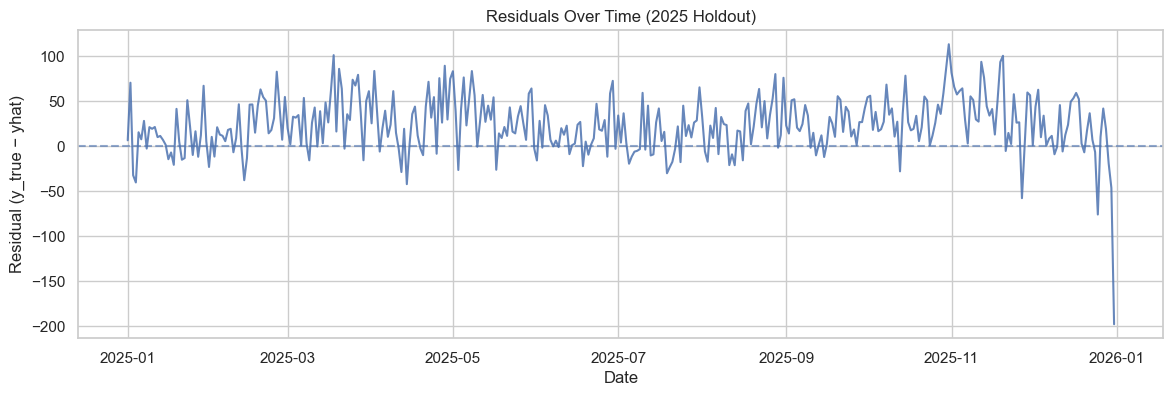

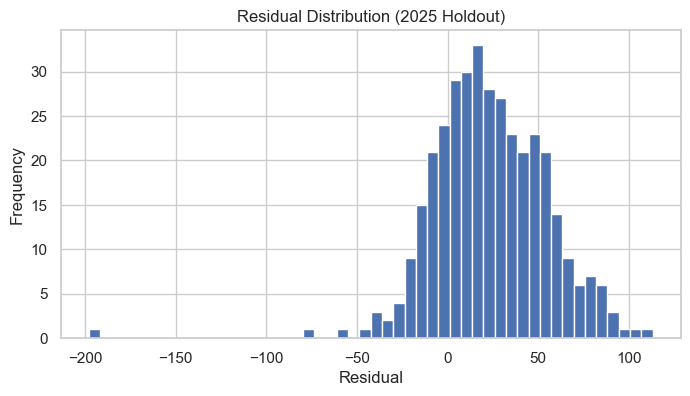

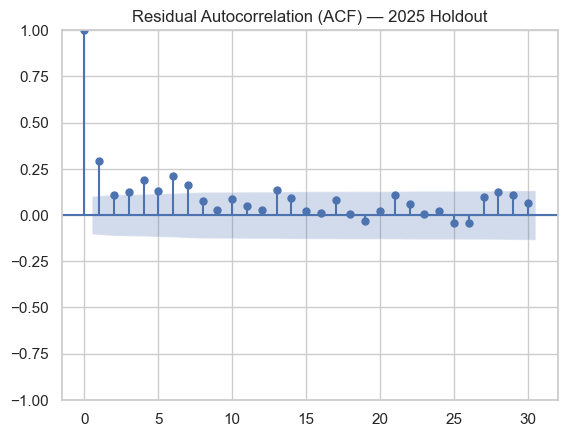

In [45]:
# ============================================================
# STEP 5.6B: Residual Diagnostics — 2025 Holdout (MACRO)
# ============================================================
# Purpose:
#   Validate error behavior for the 2025 holdout forecast:
#   • Bias (mean residual)
#   • Dispersion (std)
#   • Temporal structure
#   • Distribution shape
#   • Autocorrelation (ACF)
# ============================================================


# ------------------------------------------------------------
# 0) Required diagnostic import (explicit, restart-safe)
# ------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf


# ------------------------------------------------------------
# 1) Load predictions artifact
# ------------------------------------------------------------
holdout_path = models_path("macro_prophet_holdout_2025_predictions.csv")
p = pd.read_csv(holdout_path)

# Standardize prediction column name
if "yhat" not in p.columns and "y_pred" in p.columns:
    p = p.rename(columns={"y_pred": "yhat"})


# ------------------------------------------------------------
# 2) Validate required columns + clean
# ------------------------------------------------------------
required_cols = ["ds", "y_true", "yhat"]
missing = [c for c in required_cols if c not in p.columns]
if missing:
    raise KeyError(
        f"Missing required columns: {missing}. "
        f"Available columns: {list(p.columns)}"
    )

p["ds"] = pd.to_datetime(p["ds"], errors="coerce")
p = (
    p.dropna(subset=["ds", "y_true", "yhat"])
     .sort_values("ds")
     .reset_index(drop=True)
)


# ------------------------------------------------------------
# 3) Compute residuals
# ------------------------------------------------------------
residuals = p["y_true"].astype(float).to_numpy() - p["yhat"].astype(float).to_numpy()

print(f"Rows used     : {len(p):,}")
print(f"Residual mean : {residuals.mean():.2f}")
print(f"Residual std  : {residuals.std():.2f}")


# ------------------------------------------------------------
# 4) Residuals over time
# ------------------------------------------------------------
plt.figure(figsize=(14, 4))
plt.plot(p["ds"], residuals, alpha=0.85)
plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("Residuals Over Time (2025 Holdout)")
plt.xlabel("Date")
plt.ylabel("Residual (y_true − yhat)")
plt.show()


# ------------------------------------------------------------
# 5) Residual distribution
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution (2025 Holdout)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


# ------------------------------------------------------------
# 6) Residual autocorrelation (ACF)
# ------------------------------------------------------------
plot_acf(residuals, lags=30)
plt.title("Residual Autocorrelation (ACF) — 2025 Holdout")
plt.show()

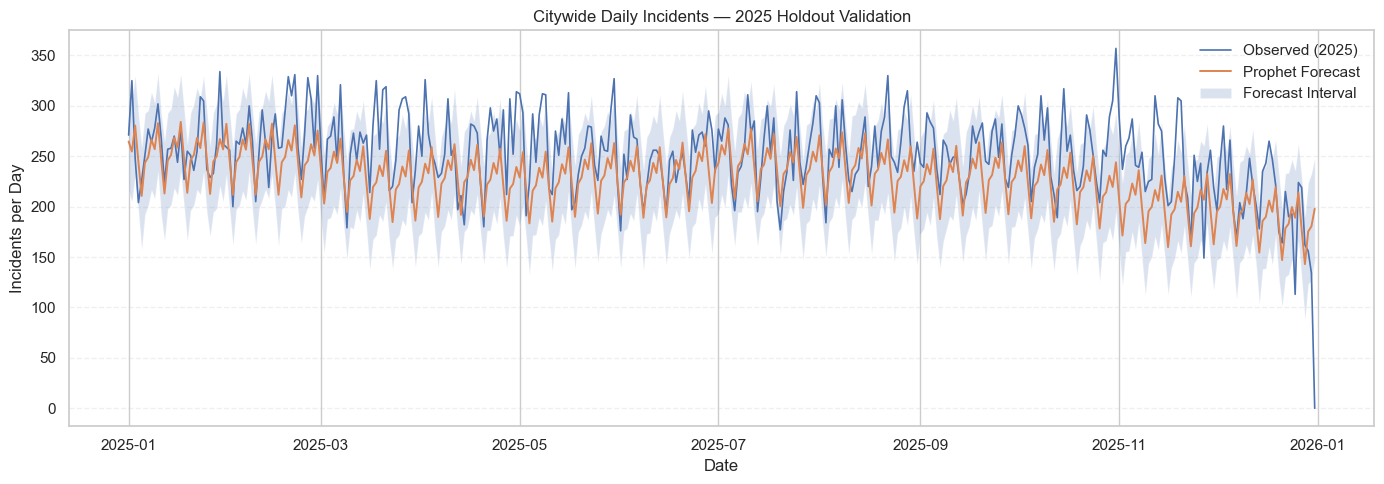

Saved: models/macro_prophet_visual_validation_2025.png


In [46]:
# ============================================================
# STEP 5.6C: Prophet Visual Validation — 2025 Holdout (MACRO)
# ============================================================
# Purpose:
#   Perform a visual sanity check comparing observed 2025 data
#   against Prophet forecasts and uncertainty bounds.
# Artifacts:
#   • Saves validation plot for Streamlit + portfolio reuse
# ============================================================


# ------------------------------------------------------------
# 0) Resolve standardized inputs
# ------------------------------------------------------------
test = macro_prophet_baseline_test.copy()
fc   = macro_prophet_baseline_fc_2025.copy()

required_cols_test = ["ds", "y"]
required_cols_fc   = ["ds", "yhat", "yhat_lower", "yhat_upper"]

for cols, name, df_ in [
    (required_cols_test, "test", test),
    (required_cols_fc, "forecast", fc),
]:
    missing = [c for c in cols if c not in df_.columns]
    if missing:
        raise KeyError(
            f"Missing required columns in {name}: {missing}. "
            f"Available columns: {list(df_.columns)}"
        )


# ------------------------------------------------------------
# 1) Ensure datetime compatibility (tz-naive)
# ------------------------------------------------------------
for _df in (test, fc):
    _df["ds"] = pd.to_datetime(_df["ds"], errors="coerce")
    if getattr(_df["ds"].dt, "tz", None) is not None:
        _df["ds"] = _df["ds"].dt.tz_localize(None)


# ------------------------------------------------------------
# 2) Plot: Actual vs Prophet forecast (2025)
# ------------------------------------------------------------
plt.figure(figsize=(14, 5))

# Actual observations
plt.plot(
    test["ds"],
    test["y"],
    linewidth=1.2,
    label="Observed (2025)"
)

# Prophet forecast
plt.plot(
    fc["ds"],
    fc["yhat"],
    linewidth=1.4,
    label="Prophet Forecast"
)

# Uncertainty interval
plt.fill_between(
    fc["ds"],
    fc["yhat_lower"],
    fc["yhat_upper"],
    alpha=0.20,
    label="Forecast Interval"
)

plt.title("Citywide Daily Incidents — 2025 Holdout Validation")
plt.xlabel("Date")
plt.ylabel("Incidents per Day")
plt.legend(frameon=False, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.3)


# ------------------------------------------------------------
# 3) Save artifact for Streamlit + audit
# ------------------------------------------------------------
out_path = models_path("macro_prophet_visual_validation_2025.png")

plt.savefig(
    out_path,
    dpi=150,
    bbox_inches="tight"
)

plt.tight_layout()
plt.show()

print(f"Saved: {out_path}")

### 5.6D Prophet Decomposition (Trend + Seasonality)

**What this step does**

Prophet decomposition separates the fitted forecast into its core structural components: long-term trend, weekly seasonality, and yearly seasonality. Rather than focusing on prediction accuracy, this step explains *how* the model represents crime dynamics over time and *which recurring patterns drive the forecast*.

The decomposition is diagnostic and interpretive. It allows direct inspection of whether the model’s internal structure aligns with known urban mobility, calendar effects, and post-pandemic stabilization patterns observed in San Francisco.

**Purpose**

The primary purpose of decomposition is to validate model behavior, not to optimize performance. Specifically, it is used to:

- Verify that the **trend component** reflects plausible long-run movement rather than noise or overfitting.
- Confirm that **weekly seasonality** captures systematic day-of-week effects consistent with human activity and mobility.
- Identify **annual seasonal structure**, highlighting recurring periods of elevated or reduced incident activity.
- Ensure that structural breaks, such as the COVID-19 disruption, are absorbed by trend dynamics rather than misattributed to seasonality.

By making the model’s assumptions visible, decomposition strengthens interpretability and supports decision-level trust in subsequent forecasts.

**What to expect**

- A smooth trend curve showing stabilization or gradual change rather than abrupt oscillations.
- Clear weekly patterns indicating higher or lower incident levels on specific days of the week.
- A coherent annual cycle that aligns with known seasonal behavior (e.g., summer activity increases).
- Residual variability that appears limited and structure-free, indicating that major temporal patterns have been captured.

This step does not alter forecasts or evaluation metrics. It functions purely as a transparency and validation check before extending forecasts into 2026.


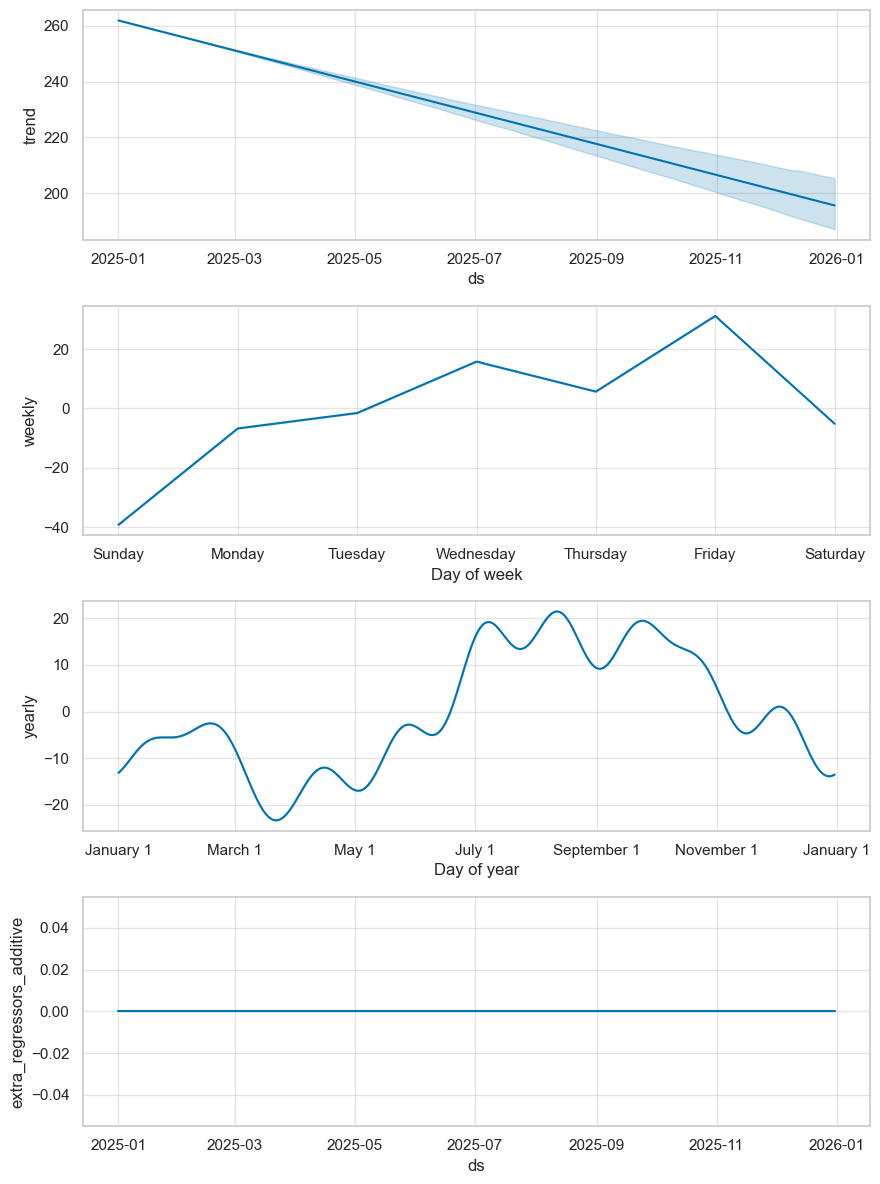

Saved: models/macro_prophet_components_2025.png


In [47]:
# ============================================================
# STEP 5.6D: Prophet Decomposition — Trend + Seasonality (MACRO)
# ============================================================
# Purpose:
#   Decompose the fitted Prophet forecast into interpretable drivers:
#   • Long-run trend
#   • Weekly seasonality
#   • Yearly seasonality
# Artifacts:
#   • Saves components plot for Streamlit + portfolio reuse
# ============================================================


# ------------------------------------------------------------
# 0) Resolve standardized objects (restart-safe)
# ------------------------------------------------------------
if "macro_prophet_baseline" not in globals():
    raise NameError("Expected object 'macro_prophet_baseline' not found. Run STEP 5.6A first.")

if "macro_prophet_baseline_fc_2025" not in globals():
    raise NameError("Expected object 'macro_prophet_baseline_fc_2025' not found. Run STEP 5.6A first.")

model = macro_prophet_baseline
fc    = macro_prophet_baseline_fc_2025.copy()


# ------------------------------------------------------------
# 1) Validate forecast frame schema
# ------------------------------------------------------------
required_cols = ["ds", "yhat"]
missing = [c for c in required_cols if c not in fc.columns]
if missing:
    raise KeyError(
        f"Missing required columns in forecast frame: {missing}. "
        f"Available columns: {list(fc.columns)}"
    )


# ------------------------------------------------------------
# 2) Ensure datetime compatibility (tz-naive)
# ------------------------------------------------------------
fc["ds"] = pd.to_datetime(fc["ds"], errors="coerce")
fc = fc.dropna(subset=["ds"]).copy()

if getattr(fc["ds"].dt, "tz", None) is not None:
    fc["ds"] = fc["ds"].dt.tz_localize(None)


# ------------------------------------------------------------
# 3) Plot decomposition (components)
# Note: Prophet returns a matplotlib Figure
# ------------------------------------------------------------
fig = model.plot_components(fc)


# ------------------------------------------------------------
# 4) Save artifact for Streamlit + audit
# ------------------------------------------------------------
out_path = models_path("macro_prophet_components_2025.png")

fig.savefig(
    out_path,
    dpi=150,
    bbox_inches="tight"
)

plt.show()

print(f"Saved: {out_path}")

```
Prophet Decomposition Interpretation

The trend component indicates a gradual decline in citywide daily incidents through 2025 into early 2026, suggesting continued post-pandemic stabilization rather than renewed escalation. Weekly seasonality reveals a strong weekday pattern, with activity lowest on Sundays and peaking on Fridays, consistent with mobility and nightlife dynamics. Yearly seasonality shows a pronounced mid-year elevation, with incident levels rising in late spring and remaining elevated through summer and early fall before declining toward winter. The COVID regime regressor remains inactive in 2025, confirming that current dynamics are driven by structural trends and recurring calendar effects rather than residual pandemic shocks.
```

[Back to Top](#top)

### 5.6.1 Retrain Prophet on Full Data → 2026 Forecast

After validating Prophet on the 2025 holdout set, the model is retrained on the complete 2018–2025 citywide series to maximize information available for forward-looking inference. The resulting forecast provides a planning-oriented outlook for 2026, interpreted as a range of plausible outcomes rather than a point prediction.

In [48]:
# ============================================================
# STEP 5.6.1: Prophet Retrain on Full History + 2026 Forecast (MACRO)
# ============================================================
# Naming:
#   • macro_prophet_full           (fitted on 2018–2025)
#   • macro_prophet_full_fc_2026   (forecast frame)
# Artifacts:
#   • models/macro_prophet_forecast_2026.csv
# ============================================================


# ------------------------------------------------------------
# 0) Validate upstream canonical series exists
# ------------------------------------------------------------
if "macro_daily" not in globals():
    raise NameError("Expected 'macro_daily' not found. Run STEP 5.5 (canonical preprocessing) first.")

required_cols = ["incidents", "is_covid_regime"]
missing = [c for c in required_cols if c not in macro_daily.columns]
if missing:
    raise KeyError(
        f"macro_daily is missing required columns: {missing}. "
        f"Available columns: {list(macro_daily.columns)}"
    )


# ------------------------------------------------------------
# 1) Build Prophet-ready full dataset (2018–2025)
# ------------------------------------------------------------
macro_prophet_full_df = (
    macro_daily
    .reset_index()
    .rename(columns={"date": "ds", "incidents": "y"})
    .copy()
)

macro_prophet_full_df["ds"] = pd.to_datetime(macro_prophet_full_df["ds"], errors="coerce")
macro_prophet_full_df = macro_prophet_full_df.dropna(subset=["ds"]).copy()

# Prophet requires tz-naive datetimes
if getattr(macro_prophet_full_df["ds"].dt, "tz", None) is not None:
    macro_prophet_full_df["ds"] = macro_prophet_full_df["ds"].dt.tz_localize(None)

macro_prophet_full_df["lockdown_flag"] = (
    pd.to_numeric(macro_prophet_full_df["is_covid_regime"], errors="coerce")
    .fillna(0)
    .astype(int)
)


# ------------------------------------------------------------
# 2) Fit Prophet on full history
# ------------------------------------------------------------
macro_prophet_full = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

macro_prophet_full.add_regressor("lockdown_flag")

macro_prophet_full.fit(
    macro_prophet_full_df[["ds", "y", "lockdown_flag"]]
)


# ------------------------------------------------------------
# 3) Build explicit 2026 future frame (tz-naive)
# ------------------------------------------------------------
future_2026 = pd.DataFrame({
    "ds": pd.date_range("2026-01-01", "2026-12-31", freq="D")
})

# Post-lockdown assumption for 2026
future_2026["lockdown_flag"] = 0


# ------------------------------------------------------------
# 4) Generate 2026 forecast
# ------------------------------------------------------------
macro_prophet_full_fc_2026 = macro_prophet_full.predict(future_2026)

required_fc_cols = ["ds", "yhat", "yhat_lower", "yhat_upper"]
missing_fc = [c for c in required_fc_cols if c not in macro_prophet_full_fc_2026.columns]
if missing_fc:
    raise KeyError(
        f"Prophet forecast is missing columns: {missing_fc}. "
        f"Available columns: {list(macro_prophet_full_fc_2026.columns)}"
    )


# ------------------------------------------------------------
# 5) Save 2026 forecast artifact (Streamlit + audit)
# ------------------------------------------------------------
out_path = models_path("macro_prophet_forecast_2026.csv")

(
    macro_prophet_full_fc_2026[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    .sort_values("ds")
    .to_csv(out_path, index=False)
)

print(f"Saved: {out_path}")

00:51:13 - cmdstanpy - INFO - Chain [1] start processing
00:51:13 - cmdstanpy - INFO - Chain [1] done processing


Saved: models/macro_prophet_forecast_2026.csv


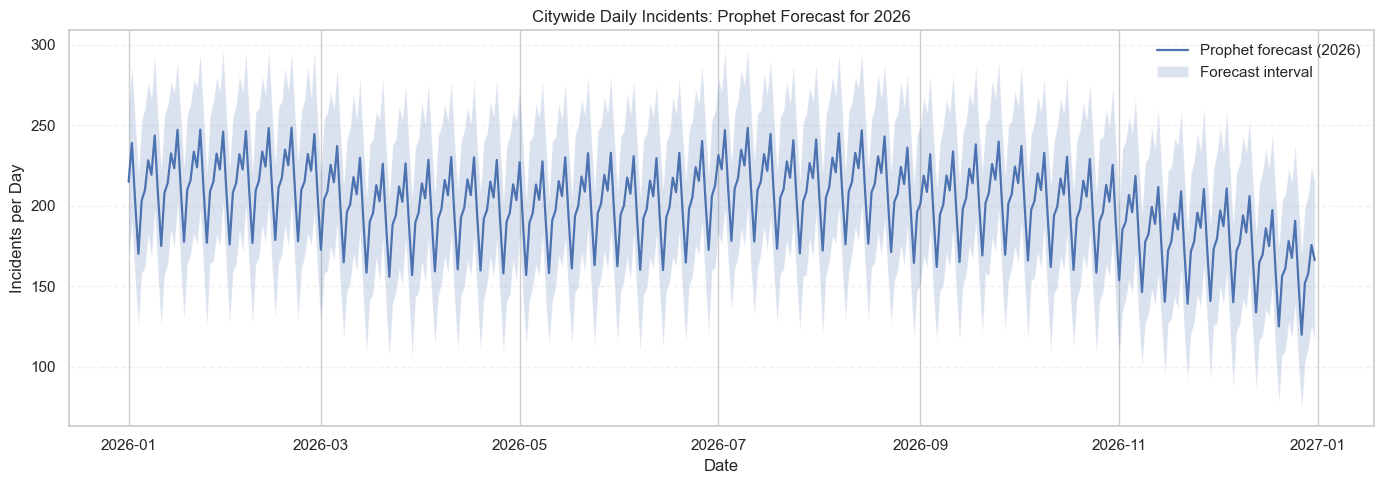

Saved: models/macro_prophet_forecast_2026.png


In [49]:
# ============================================================
# STEP 5.6.2: Prophet Forecast Visualization (2026) — MACRO
# ============================================================
# Purpose: Display and persist citywide 2026 forecast
# Artifact:
#   • models/macro_prophet_forecast_2026.png
# ============================================================


# ------------------------------------------------------------
# 0) Validate required forecast object + columns
# ------------------------------------------------------------
if "macro_prophet_full_fc_2026" not in globals():
    raise NameError(
        "Expected 'macro_prophet_full_fc_2026' not found. "
        "Run STEP 5.6.1 (Prophet retrain + 2026 forecast) first."
    )

fc = macro_prophet_full_fc_2026.copy()

required_cols = ["ds", "yhat", "yhat_lower", "yhat_upper"]
missing = [c for c in required_cols if c not in fc.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(fc.columns)}")

fc["ds"] = pd.to_datetime(fc["ds"], errors="coerce")
fc = fc.dropna(subset=["ds", "yhat", "yhat_lower", "yhat_upper"]).sort_values("ds").reset_index(drop=True)


# ------------------------------------------------------------
# 1) Plot 2026 forecast + uncertainty interval
# ------------------------------------------------------------
plt.figure(figsize=(14, 5))

plt.plot(
    fc["ds"],
    fc["yhat"],
    linewidth=1.6,
    label="Prophet forecast (2026)"
)

plt.fill_between(
    fc["ds"],
    fc["yhat_lower"],
    fc["yhat_upper"],
    alpha=0.2,
    label="Forecast interval"
)

plt.title("Citywide Daily Incidents: Prophet Forecast for 2026")
plt.xlabel("Date")
plt.ylabel("Incidents per Day")
plt.legend(frameon=False, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.3)


# ------------------------------------------------------------
# 2) Save figure artifact (Streamlit + portfolio reuse)
# ------------------------------------------------------------
out_path = models_path("macro_prophet_forecast_2026.png")

plt.savefig(
    out_path,
    dpi=150,
    bbox_inches="tight"
)

plt.tight_layout()
plt.show()

print(f"Saved: {out_path}")

**Citywide Forecast Interpretation (Prophet)**

The 2026 forecast projects continued stabilization in citywide daily incident levels, with a gradual downward drift over the course of the year. Short-term fluctuations are dominated by strong weekly seasonality, producing regular peaks and troughs associated with weekday activity cycles. A modest mid-year elevation is visible, consistent with recurring seasonal patterns observed in prior years.

The forecast interval widens modestly toward the end of the horizon, reflecting increasing uncertainty inherent in longer-range projections rather than structural instability. Overall, the forecast suggests no systemic escalation in citywide crime pressure for 2026, with variability driven primarily by predictable calendar effects rather than emerging trend shifts.

In [50]:
# ============================================================
# STEP 5.6.3: Aggregate 2026 Daily Forecast to Monthly Totals — MACRO
# ============================================================
# Purpose: Convert daily 2026 forecast into monthly planning totals
# Artifact:
#   • models/macro_prophet_monthly_forecast_2026.csv
# ============================================================


# ------------------------------------------------------------
# 0) Validate required forecast object + columns
# ------------------------------------------------------------
if "macro_prophet_full_fc_2026" not in globals():
    raise NameError(
        "Expected 'macro_prophet_full_fc_2026' not found. "
        "Run STEP 5.6.1 (Prophet retrain + 2026 forecast) first."
    )

fc = macro_prophet_full_fc_2026.copy()

required_cols = ["ds", "yhat", "yhat_lower", "yhat_upper"]
missing = [c for c in required_cols if c not in fc.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(fc.columns)}")

fc["ds"] = pd.to_datetime(fc["ds"], errors="coerce")
fc = fc.dropna(subset=required_cols).sort_values("ds").reset_index(drop=True)


# ------------------------------------------------------------
# 1) Create month key (Streamlit-friendly)
# ------------------------------------------------------------
fc["month"] = fc["ds"].dt.to_period("M").astype(str)  # e.g., "2026-01"


# ------------------------------------------------------------
# 2) Aggregate daily predictions to monthly totals
#    NOTE: Summing daily bounds gives a planning band, not a true
#          monthly probabilistic interval (good for dashboards).
# ------------------------------------------------------------
macro_prophet_monthly_2026 = (
    fc.groupby("month", as_index=False)
      .agg(
          yhat_monthly=("yhat", "sum"),
          lower_monthly=("yhat_lower", "sum"),
          upper_monthly=("yhat_upper", "sum"),
          days=("ds", "count")
      )
)

# Optional: sanity check that each month has the expected number of days
display(macro_prophet_monthly_2026)


# ------------------------------------------------------------
# 3) Summary statistics (for your narrative / planning ranges)
# ------------------------------------------------------------
display(
    macro_prophet_monthly_2026[["yhat_monthly", "lower_monthly", "upper_monthly"]]
    .describe()
)


# ------------------------------------------------------------
# 4) Save artifact (Streamlit + portfolio reuse)
# ------------------------------------------------------------
out_path = models_path("macro_prophet_monthly_forecast_2026.csv")

macro_prophet_monthly_2026.to_csv(out_path, index=False)

print(f"Saved: {out_path}")

month  yhat_monthly  lower_monthly  upper_monthly  days
0   2026-01   6680.388425    5178.893073    8164.508258    31
1   2026-02   6065.782832    4718.900098    7418.492815    28
2   2026-03   6158.385423    4651.635517    7658.642822    31
3   2026-04   5984.176188    4515.865204    7420.592816    30
4   2026-05   6177.646663    4702.467498    7672.985238    31
5   2026-06   6091.185412    4630.679057    7529.042828    30
6   2026-07   6691.446451    5192.950712    8183.373795    31
7   2026-08   6524.104580    5045.560421    8042.604857    31
8   2026-09   6185.286217    4751.983177    7642.662322    30
9   2026-10   6246.570877    4748.203492    7756.831044    31
10  2026-11   5433.620583    3952.646652    6897.681493    30
11  2026-12   5279.717833    3748.924567    6791.441247    31

yhat_monthly  lower_monthly  upper_monthly
count     12.000000      12.000000      12.000000
mean    6126.525957    4653.225789    7598.238295
std      429.361414     434.324746     437.682274
min     5279.717833    3748.924567    6791.441247
25%     6045.381171    4601.975594    7420.067816
50%     6168.016043    4710.683798    7650.652572
75%     6315.954303    4825.377488    7828.274497
max     6691.446451    5192.950712    8183.373795

Saved: models/macro_prophet_monthly_forecast_2026.csv


For a non-technical reader, the 2026 forecast indicates that San Francisco is expected to experience roughly 5,500 to 6,700 reported incidents per month under typical conditions. Quieter months may fall closer to 4,000 incidents, while busier summer months could approach 8,000 incidents. These variations reflect predictable seasonal patterns and uncertainty rather than sudden increases in overall crime levels.

> The city should plan for about six thousand incidents per month, with normal ups and downs across the year, not a major increase or collapse.

### 5.6.4 Monthly totals with uncertainty (plot + save)

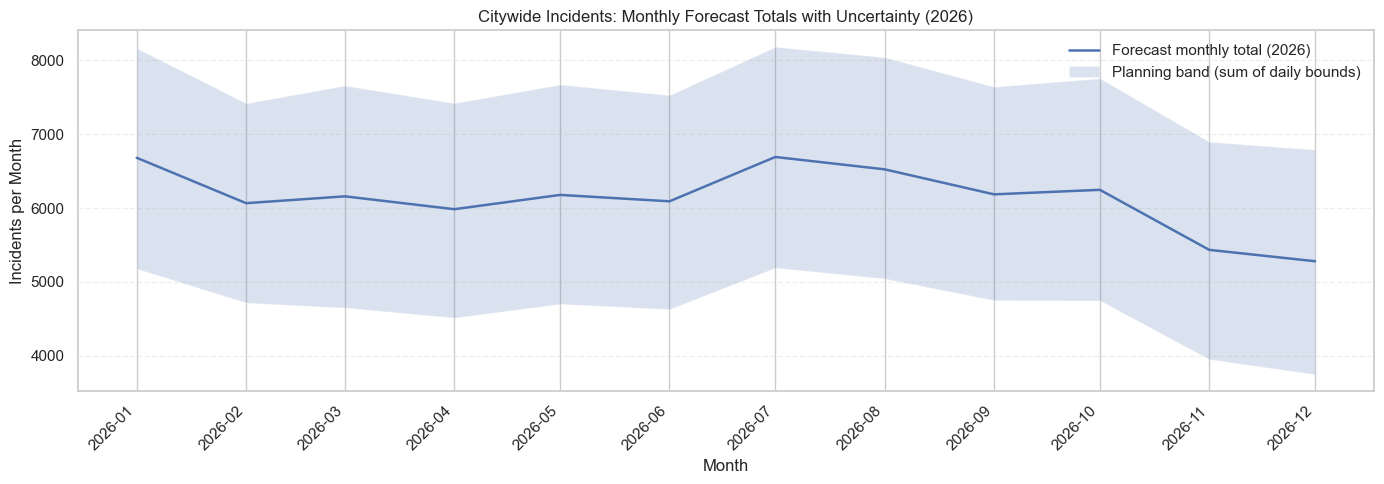

Saved: models/macro_prophet_monthly_totals_2026.png


In [51]:
# ============================================================
# STEP 5.6.4: Plot Monthly Totals with Uncertainty (2026) — MACRO
# ============================================================
# Purpose: Visualize monthly planning totals derived from the daily forecast
# Artifact:
#   • models/macro_prophet_monthly_totals_2026.png
# ============================================================


# ------------------------------------------------------------
# 0) Validate required monthly frame
# ------------------------------------------------------------
if "macro_prophet_monthly_2026" not in globals():
    raise NameError(
        "Expected 'macro_prophet_monthly_2026' not found. "
        "Run STEP 5.6.3 (aggregate daily → monthly) first."
    )

m = macro_prophet_monthly_2026.copy()

required_cols = ["month", "yhat_monthly", "lower_monthly", "upper_monthly"]
missing = [c for c in required_cols if c not in m.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(m.columns)}")


# ------------------------------------------------------------
# 1) Build a real datetime axis for plotting (month start)
# ------------------------------------------------------------
m["month_dt"] = pd.to_datetime(m["month"] + "-01", errors="coerce")
m = m.dropna(subset=["month_dt"]).sort_values("month_dt").reset_index(drop=True)


# ------------------------------------------------------------
# 2) Plot monthly totals + planning band
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(
    m["month_dt"],
    m["yhat_monthly"],
    linewidth=1.8,
    label="Forecast monthly total (2026)"
)

ax.fill_between(
    m["month_dt"],
    m["lower_monthly"],
    m["upper_monthly"],
    alpha=0.2,
    label="Planning band (sum of daily bounds)"
)

ax.set_title("Citywide Incidents: Monthly Forecast Totals with Uncertainty (2026)")
ax.set_xlabel("Month")
ax.set_ylabel("Incidents per Month")

ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.legend(frameon=False, loc="upper right")


# ------------------------------------------------------------
# 3) Clean month ticks
# ------------------------------------------------------------
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")


# ------------------------------------------------------------
# 4) Save artifact (Streamlit + portfolio reuse)
# ------------------------------------------------------------
out_path = models_path("macro_prophet_monthly_totals_2026.png")

fig.savefig(out_path, dpi=150, bbox_inches="tight")

plt.tight_layout()
plt.show()

print(f"Saved: {out_path}")

### 5.6.5 Compare monthly vs daily volatility (table + plot + save)

granularity     mean     std      cv
0           Daily (2026)   201.42   24.60  0.1221
1  Monthly totals (2026)  6126.53  429.36  0.0701

Saved: models/macro_prophet_volatility_daily_vs_monthly_2026.csv


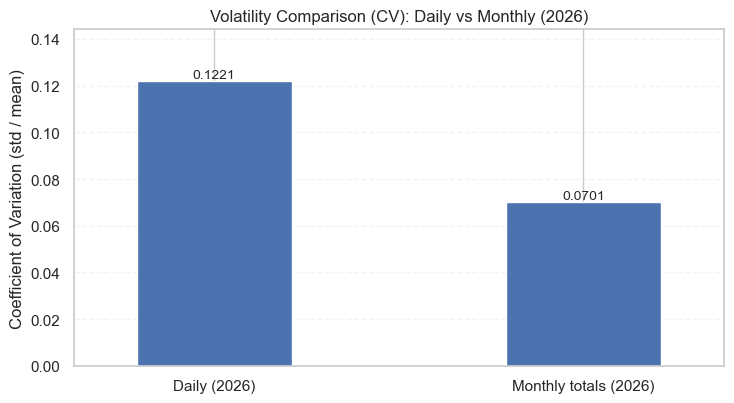

Saved: models/macro_prophet_volatility_daily_vs_monthly_2026.png


In [52]:
# ============================================================
# STEP 5.6.5: Volatility Comparison — Daily vs Monthly (2026) — MACRO
# ============================================================
# Purpose:
#   Quantify how aggregation changes volatility (day-to-day noise vs
#   month-level planning stability) using coefficient of variation (CV).
# Outputs:
#   • volatility_df (summary table)
# Artifacts:
#   • models/macro_prophet_volatility_daily_vs_monthly_2026.csv
#   • models/macro_prophet_volatility_daily_vs_monthly_2026.png
# ============================================================


# ------------------------------------------------------------
# 0) Validate required inputs
# ------------------------------------------------------------
if "macro_prophet_full_fc_2026" not in globals():
    raise NameError(
        "Expected 'macro_prophet_full_fc_2026' not found. "
        "Run STEP 5.6.1 (retrain + 2026 forecast) first."
    )

if "macro_prophet_monthly_2026" not in globals():
    raise NameError(
        "Expected 'macro_prophet_monthly_2026' not found. "
        "Run STEP 5.6.3 (aggregate daily → monthly) first."
    )

fc = macro_prophet_full_fc_2026.copy()
m  = macro_prophet_monthly_2026.copy()

daily_required = ["ds", "yhat"]
monthly_required = ["month", "yhat_monthly"]

missing_daily = [c for c in daily_required if c not in fc.columns]
missing_monthly = [c for c in monthly_required if c not in m.columns]

if missing_daily:
    raise KeyError(f"Daily forecast missing columns: {missing_daily}. Available: {list(fc.columns)}")
if missing_monthly:
    raise KeyError(f"Monthly forecast missing columns: {missing_monthly}. Available: {list(m.columns)}")


# ------------------------------------------------------------
# 1) Helper: coefficient of variation (CV = std / mean)
# ------------------------------------------------------------
def coef_of_variation(x: pd.Series) -> dict:
    x = pd.to_numeric(x, errors="coerce").dropna()
    mu = float(x.mean()) if len(x) else np.nan
    sd = float(x.std(ddof=1)) if len(x) else np.nan
    cv = (sd / mu) if (mu not in [0, np.nan] and pd.notna(mu)) else np.nan
    return {"mean": mu, "std": sd, "cv": cv}


# ------------------------------------------------------------
# 2) Daily volatility (2026)
# ------------------------------------------------------------
fc["ds"] = pd.to_datetime(fc["ds"], errors="coerce")
fc = fc.dropna(subset=["ds", "yhat"]).sort_values("ds").reset_index(drop=True)

daily_metrics = coef_of_variation(fc["yhat"])
daily_stats = {
    "granularity": "Daily (2026)",
    **daily_metrics
}


# ------------------------------------------------------------
# 3) Monthly volatility (2026 totals)
# ------------------------------------------------------------
m["month_dt"] = pd.to_datetime(m["month"] + "-01", errors="coerce")
m = m.dropna(subset=["month_dt", "yhat_monthly"]).sort_values("month_dt").reset_index(drop=True)

monthly_metrics = coef_of_variation(m["yhat_monthly"])
monthly_stats = {
    "granularity": "Monthly totals (2026)",
    **monthly_metrics
}


# ------------------------------------------------------------
# 4) Summary table + export
# ------------------------------------------------------------
volatility_df = pd.DataFrame([daily_stats, monthly_stats])

# Optional: cleaner display formatting
volatility_display = volatility_df.copy()
volatility_display["mean"] = volatility_display["mean"].round(2)
volatility_display["std"]  = volatility_display["std"].round(2)
volatility_display["cv"]   = volatility_display["cv"].round(4)

display(volatility_display)

table_path = models_path("macro_prophet_volatility_daily_vs_monthly_2026.csv")
volatility_df.to_csv(table_path, index=False)
print(f"Saved: {table_path}")


# ------------------------------------------------------------
# 5) Simple comparison plot (CV)
# ------------------------------------------------------------
labels = volatility_display["granularity"].tolist()
cv_vals = volatility_display["cv"].astype(float).tolist()

x = np.arange(len(labels))
bar_width = 0.42  # slimmer bars (try 0.35–0.50)

fig, ax = plt.subplots(figsize=(7.5, 4.2))

bars = ax.bar(x, cv_vals, width=bar_width)

ax.set_title("Volatility Comparison (CV): Daily vs Monthly (2026)")
ax.set_ylabel("Coefficient of Variation (std / mean)")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha="center")

# Add a little headroom so labels don't touch the top
ymax = max(cv_vals) if len(cv_vals) else 1.0
ax.set_ylim(0, ymax * 1.18)

ax.grid(axis="y", linestyle="--", alpha=0.25)

# Value labels (small, clean)
for rect, v in zip(bars, cv_vals):
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        f"{v:.4f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Tight margins so it doesn't look stretched
ax.margins(x=0.12)

plot_path = models_path("macro_prophet_volatility_daily_vs_monthly_2026.png")
fig.savefig(plot_path, dpi=200, bbox_inches="tight")

plt.tight_layout()
plt.show()

print(f"Saved: {plot_path}")

#### Volatility Comparison: Daily vs Monthly Forecasts

Although daily forecasts provide high-resolution insight into short-term fluctuations, they naturally exhibit greater variability due to weekday–weekend effects and event-driven noise. When aggregated to monthly totals, this volatility is substantially reduced. The coefficient of variation declines from approximately 0.12 at the daily level to 0.07 at the monthly level, confirming that aggregation produces a more stable signal suitable for strategic planning, while daily forecasts remain valuable for operational decision-making.


[Back to Top](#top)

---

## 5.7 SARIMAX: Stochastic Benchmark <a id="sarimax"></a>

**Purpose:**  
To assess whether explicit autoregressive and moving-average structure can improve forecast precision by modeling short-term temporal dependence in the incident series.

**Analytical Rationale:**  
SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) serves as the classical statistical counterpoint to Prophet.

- **Temporal Autocorrelation:** SARIMAX explicitly models dependence between current and recent observations, testing whether crime “momentum” carries short-term predictive value.
- **Statistical Rigor:** As a strictly frequentist model, SARIMAX provides a disciplined benchmark for evaluating whether additive trend–seasonality frameworks leave autocorrelated signal unmodeled.

While statistically rigorous, SARIMAX trades interpretability and robustness to regime shifts for dependence modeling, making it best suited as a diagnostic benchmark rather than a primary deployment engine.

**Methodological Transition:**  
Both Prophet and SARIMAX introduce meaningful complexity through changepoints and lag structures. To determine whether this complexity is justified, we next compare performance against a parsimonious smoothing-based control.

In [53]:
# ============================================================
# 5.7 SARIMAX Benchmark: Fit + 2025 Holdout Validation (MACRO)
# Naming:
#   - macro_sarimax_benchmark
#   - macro_sarimax_benchmark_fit
# Artifacts:
#   - models/macro_sarimax_holdout_2025_predictions.csv
#   - models/macro_sarimax_metrics_2025.csv
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate required inputs (macro_daily)
# ------------------------------------------------------------
required_cols = ["incidents", "set"]
missing = [c for c in required_cols if c not in macro_daily.columns]
if missing:
    raise KeyError(
        f"macro_daily missing required column(s): {missing}. "
        f"Available columns: {list(macro_daily.columns)}"
    )

if not isinstance(macro_daily.index, pd.DatetimeIndex):
    raise TypeError("macro_daily must use a DatetimeIndex (daily index from STEP 5.5).")

md = macro_daily.copy()

# Statsmodels prefers tz-naive DatetimeIndex
md.index = pd.to_datetime(md.index, errors="coerce")
md = md[~md.index.isna()].sort_index()
if getattr(md.index, "tz", None) is not None:
    md.index = md.index.tz_localize(None)

# ------------------------------------------------------------
# 1) Canonical train/test extraction (leakage-free)
# ------------------------------------------------------------
y_train = md.loc[md["set"] == "train", "incidents"].astype(float).copy()
y_test  = md.loc[md["set"] == "test",  "incidents"].astype(float).copy()

if y_train.empty or y_test.empty:
    raise ValueError(
        "Train/test split produced an empty series. "
        "Verify macro_daily['set'] contains 'train' and 'test'."
    )

# Enforce daily frequency and fill gaps (keeps horizon stable)
y_train = y_train.asfreq("D", fill_value=0.0)
y_test  = y_test.asfreq("D", fill_value=0.0)

# ------------------------------------------------------------
# 2) Define SARIMAX benchmark (weekly seasonality = 7)
# Notes:
#   - order=(1,1,1) provides a simple differenced ARMA core
#   - seasonal_order=(1,0,1,7) captures weekly seasonal structure
# ------------------------------------------------------------
macro_sarimax_benchmark = SARIMAX(
    y_train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# ------------------------------------------------------------
# 3) Fit model (train only)
# ------------------------------------------------------------
macro_sarimax_benchmark_fit = macro_sarimax_benchmark.fit(disp=False)

# ------------------------------------------------------------
# 4) Forecast into 2025 holdout
# ------------------------------------------------------------
sarimax_fc_2025 = macro_sarimax_benchmark_fit.get_forecast(steps=len(y_test))

y_pred = sarimax_fc_2025.predicted_mean.astype(float).values

ci_95 = sarimax_fc_2025.conf_int(alpha=0.05)
ci_lower = ci_95.iloc[:, 0].astype(float).values
ci_upper = ci_95.iloc[:, 1].astype(float).values

# ------------------------------------------------------------
# 5) Evaluate (2025 holdout)
# ------------------------------------------------------------
y_true = y_test.values.astype(float)

mae_sarimax = mean_absolute_error(y_true, y_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_true, y_pred))

print("Citywide SARIMAX (macro_sarimax_benchmark_fit) — 2025 Holdout Validation")
print(f"MAE : {mae_sarimax:.2f} incidents/day")
print(f"RMSE: {rmse_sarimax:.2f} incidents/day")

# ------------------------------------------------------------
# 6) Save predictions + metrics (Streamlit + audit)
# ------------------------------------------------------------
preds_sarimax_2025 = (
    pd.DataFrame({
        "ds": y_test.index,
        "y_true": y_true,
        "yhat": y_pred,
        "yhat_lower": ci_lower,
        "yhat_upper": ci_upper,
    })
    .sort_values("ds")
    .reset_index(drop=True)
)

metrics_sarimax_2025 = pd.DataFrame([{
    "model": "SARIMAX",
    "object_name": "macro_sarimax_benchmark_fit",
    "holdout_year": 2025,
    "mae_2025": round(float(mae_sarimax), 2),
    "rmse_2025": round(float(rmse_sarimax), 2),
    "order": "(1,1,1)",
    "seasonal_order": "(1,0,1,7)"
}])

preds_path = models_path("macro_sarimax_holdout_2025_predictions.csv")
metrics_path = models_path("macro_sarimax_metrics_2025.csv")

preds_sarimax_2025.to_csv(preds_path, index=False)
metrics_sarimax_2025.to_csv(metrics_path, index=False)

print("Saved:")
print(f"- {preds_path}")
print(f"- {metrics_path}")

Citywide SARIMAX (macro_sarimax_benchmark_fit) — 2025 Holdout Validation
MAE : 31.64 incidents/day
RMSE: 40.76 incidents/day
Saved:
- models/macro_sarimax_holdout_2025_predictions.csv
- models/macro_sarimax_metrics_2025.csv


**SARIMAX Benchmark Insight**

The SARIMAX model achieves competitive performance on the 2025 holdout period, confirming that citywide crime dynamics are strongly driven by linear temporal structure and weekly seasonality. While predictive accuracy is slightly lower than the Prophet baseline, the similarity in error magnitudes reinforces the robustness of the underlying signal. Prophet is retained as the primary forecasting model due to its superior interpretability and stability in the presence of structural breaks.

**Prophet vs SARIMAX - 2025 Holdout Performance**

| Model    | MAE (incidents/day) | RMSE (incidents/day) |
|----------|---------------------|----------------------|
| Prophet  | **30.28**           | **39.11**            |
| SARIMAX | 31.64               | 40.76                |


>*Both models capture the dominant citywide temporal structure, with Prophet exhibiting slightly stronger generalization and greater interpretability.*


----- Residual Diagnostics (2025 Holdout) -----
Rows used      : 365
Residual mean  : 24.13
Residual std   : 32.89
Residual min/max: -217.21 / 131.80
------------------------------------------------


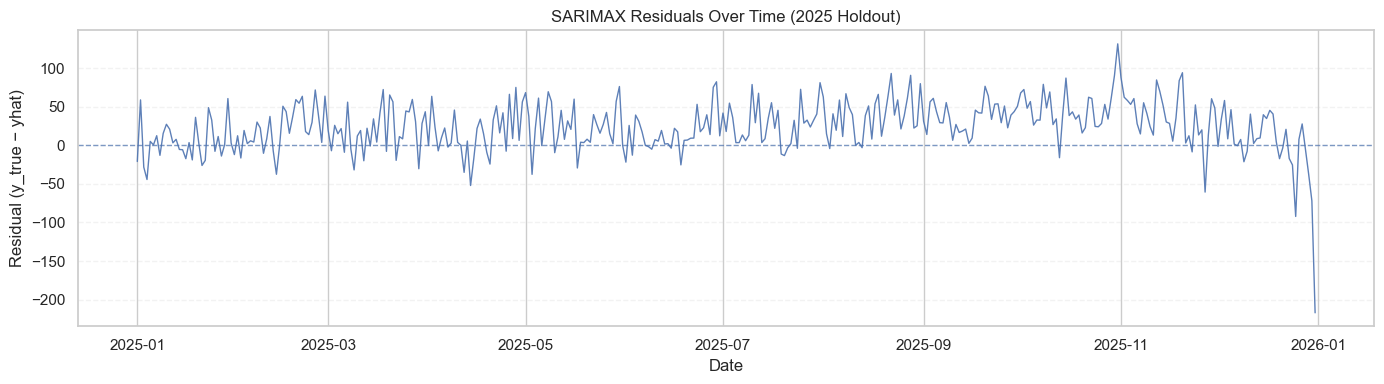

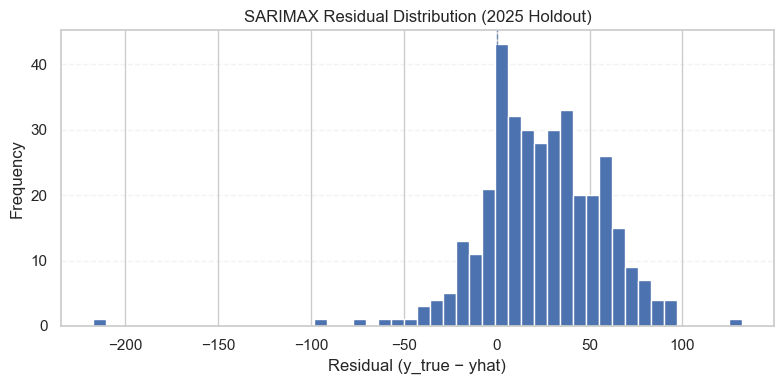

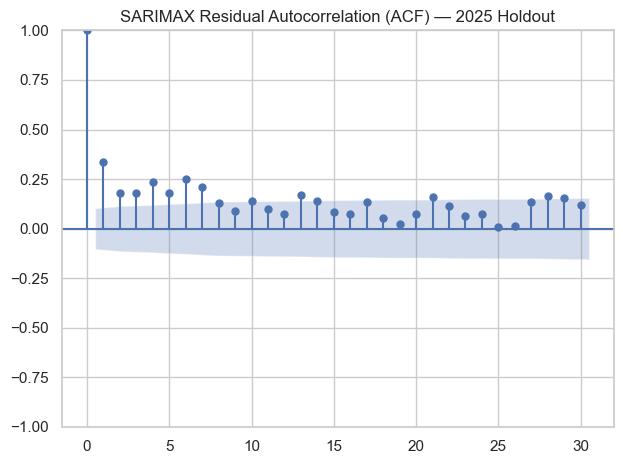

In [54]:
# ============================================================
# 5.8 Residual Diagnostics (2025 Holdout) — restart-safe + aligned
# Model: SARIMAX (reads saved holdout predictions)
# Purpose:
#   - Confirm residuals are centered near zero
#   - Inspect spread + outliers
#   - Check autocorrelation (remaining structure)
# ============================================================

# ------------------------------------------------------------
# 0) Imports (explicit, avoids NameError on reruns)
# ------------------------------------------------------------


from statsmodels.graphics.tsaplots import plot_acf

# ------------------------------------------------------------
# 1) Load holdout predictions (audit artifact)
# ------------------------------------------------------------
holdout_path = models_path("macro_sarimax_holdout_2025_predictions.csv")
p = pd.read_csv(holdout_path)

required_cols = ["ds", "y_true"]
missing = [c for c in required_cols if c not in p.columns]
if missing:
    raise KeyError(
        f"Holdout file missing required column(s): {missing}. "
        f"Available columns: {list(p.columns)}"
    )

# Standardize prediction column name
if "yhat" not in p.columns and "y_pred" in p.columns:
    p = p.rename(columns={"y_pred": "yhat"})
if "yhat" not in p.columns:
    raise KeyError(
        "Holdout file must include 'yhat' (or 'y_pred' which will be renamed). "
        f"Available columns: {list(p.columns)}"
    )

# ------------------------------------------------------------
# 2) Clean + align
# ------------------------------------------------------------
p["ds"] = pd.to_datetime(p["ds"], errors="coerce")
p = (
    p.dropna(subset=["ds", "y_true", "yhat"])
     .sort_values("ds")
     .reset_index(drop=True)
)

y_true = p["y_true"].astype(float).values
y_hat  = p["yhat"].astype(float).values

residuals = y_true - y_hat
ds_holdout = p["ds"].values

print("----- Residual Diagnostics (2025 Holdout) -----")
print(f"Rows used      : {len(p):,}")
print(f"Residual mean  : {residuals.mean():.2f}")
print(f"Residual std   : {residuals.std(ddof=1):.2f}")
print(f"Residual min/max: {residuals.min():.2f} / {residuals.max():.2f}")
print("------------------------------------------------")

# ------------------------------------------------------------
# 3) Residuals over time
# ------------------------------------------------------------
plt.figure(figsize=(14, 4))
plt.plot(ds_holdout, residuals, linewidth=1.0, alpha=0.9)
plt.axhline(0, linestyle="--", linewidth=1.0, alpha=0.7)
plt.title("SARIMAX Residuals Over Time (2025 Holdout)")
plt.xlabel("Date")
plt.ylabel("Residual (y_true − yhat)")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 4) Residual distribution (hist + zero line)
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50)
plt.axvline(0, linestyle="--", linewidth=1.0, alpha=0.7)
plt.title("SARIMAX Residual Distribution (2025 Holdout)")
plt.xlabel("Residual (y_true − yhat)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 5) Residual autocorrelation (ACF)
# ------------------------------------------------------------
plot_acf(residuals, lags=30)
plt.title("SARIMAX Residual Autocorrelation (ACF) — 2025 Holdout")
plt.tight_layout()
plt.show()

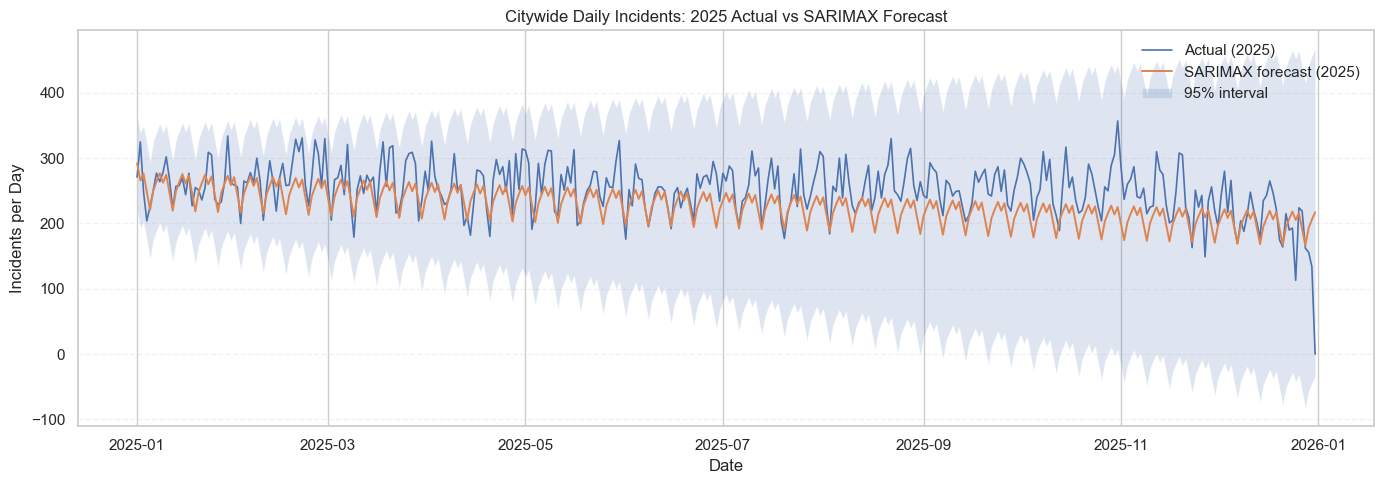

Saved: models/macro_sarimax_visual_validation_2025.png
Days plotted: 365


In [55]:
# ============================================================
# 5.9 SARIMAX Visual Validation (2025 Holdout) — restart-safe
# Purpose:
#   - Visual sanity check: SARIMAX vs observed (2025)
#   - Persist plot for Streamlit + portfolio reuse
# Artifact:
#   - models/macro_sarimax_visual_validation_2025.png
# ============================================================


# ------------------------------------------------------------
# 1) Load + validate holdout predictions
# ------------------------------------------------------------
sarimax_holdout_path = models_path("macro_sarimax_holdout_2025_predictions.csv")
sarimax_preds = pd.read_csv(sarimax_holdout_path)

required_cols = ["ds", "y_true", "yhat", "yhat_lower", "yhat_upper"]
missing = [c for c in required_cols if c not in sarimax_preds.columns]
if missing:
    raise KeyError(
        f"SARIMAX holdout file missing required column(s): {missing}. "
        f"Available columns: {list(sarimax_preds.columns)}"
    )

sarimax_preds["ds"] = pd.to_datetime(sarimax_preds["ds"], errors="coerce")
sarimax_preds = (
    sarimax_preds
    .dropna(subset=["ds", "y_true", "yhat", "yhat_lower", "yhat_upper"])
    .sort_values("ds")
    .reset_index(drop=True)
)

# Ensure numeric for plotting
for c in ["y_true", "yhat", "yhat_lower", "yhat_upper"]:
    sarimax_preds[c] = pd.to_numeric(sarimax_preds[c], errors="coerce")

sarimax_preds = sarimax_preds.dropna(subset=["y_true", "yhat", "yhat_lower", "yhat_upper"])

# ------------------------------------------------------------
# 2) Plot: Actual vs Forecast + 95% interval
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(
    sarimax_preds["ds"],
    sarimax_preds["y_true"],
    linewidth=1.2,
    label="Actual (2025)"
)

ax.plot(
    sarimax_preds["ds"],
    sarimax_preds["yhat"],
    linewidth=1.4,
    label="SARIMAX forecast (2025)"
)

ax.fill_between(
    sarimax_preds["ds"].values,          # values avoids some datetime dtype quirks
    sarimax_preds["yhat_lower"].values,
    sarimax_preds["yhat_upper"].values,
    alpha=0.18,
    label="95% interval"
)

ax.set_title("Citywide Daily Incidents: 2025 Actual vs SARIMAX Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Incidents per Day")

ax.grid(axis="y", linestyle="--", alpha=0.25)
ax.legend(frameon=False, loc="upper right")

plt.tight_layout()

# ------------------------------------------------------------
# 3) Save artifact
# ------------------------------------------------------------
viz_path = models_path("macro_sarimax_visual_validation_2025.png")
plt.savefig(viz_path, dpi=150, bbox_inches="tight")
plt.show()

print(f"Saved: {viz_path}")
print(f"Days plotted: {len(sarimax_preds):,}")

### Rationale for Additional Macro-Level Candidate Models

Following the evaluation of Prophet and SARIMAX, two additional models are considered as macro-level candidates to ensure that the selected forecasting approach is not biased toward a single modeling family.

**Exponential Smoothing (ETS)** is included as a candidate because the citywide daily incident series exhibits strong and persistent seasonal structure. ETS is well-suited for data dominated by smooth trend and recurring seasonality and provides a parsimonious statistical baseline that can perform competitively when dynamics are stable and linear. Evaluating ETS helps determine whether a simpler, low-variance model is sufficient for capturing the dominant temporal signal in the post-pandemic period.

**XGBoost** is included as a candidate to test whether non-linear learning can materially improve predictive accuracy. Tree-based gradient boosting models can capture complex interactions and subtle temporal patterns that may not be fully represented by additive or autoregressive frameworks. Given the size of the dataset and the presence of structural shifts, XGBoost serves as a stress test for potential non-linear gains, even though its interpretability and uncertainty quantification are more limited.

Both models are evaluated under the same macro-level constraints and the identical 2025 holdout window. Their role is not to replace interpretability-first models by default, but to verify whether additional complexity yields meaningful performance improvements that would justify adoption for downstream micro-level forecasting.

[Back to Top](#top)

### 5.8 ETS: Exponential Smoothing Benchmark <a id="ets"></a>

**Purpose:**  
To establish a low-variance statistical baseline that represents citywide dynamics through weighted averages of level, trend, and seasonality.

**Analytical Rationale:**  
The Exponential Smoothing (ETS) framework is evaluated as a diagnostic control to test whether San Francisco’s post-pandemic period has stabilized enough that smooth seasonal structure alone explains most predictive signal.

- **Parsimony:** ETS acts as an Occam’s Razor test for the modeling stack. If more complex models cannot outperform ETS, additional structure is likely fitting noise rather than signal.
- **Recency Weighting:** By emphasizing recent observations, ETS naturally captures the post-pandemic plateau identified in the exploratory analysis.

ETS provides a strong baseline for average behavior but intentionally limits responsiveness to abrupt shocks or structural change.

**Methodological Transition:**  
Up to this point, all models treat the data as a purely temporal process. To conclude the macro-level evaluation, we depart from time-series structure entirely to test whether non-linear, feature-driven learning can uncover additional signal.

In [56]:
# ------------------------------------------------------------
# 5.8 ETS Benchmark: Fit + 2025 Holdout Validation (MACRO)
# Naming:
#   - macro_ets_candidate
#   - macro_ets_candidate_fit
# Artifacts:
#   - models/macro_ets_holdout_2025_predictions.csv
#   - models/macro_ets_metrics_2025.csv
# ------------------------------------------------------------

# ------------------------------------------------------------
# 0) Resolve + validate macro_daily (DatetimeIndex, tz-naive)
# ------------------------------------------------------------
if isinstance(macro_daily.index, pd.DatetimeIndex):
    idx = pd.to_datetime(macro_daily.index, errors="coerce")
else:
    if "date" not in macro_daily.columns:
        raise KeyError("macro_daily must have a DatetimeIndex or a 'date' column.")
    idx = pd.to_datetime(macro_daily["date"], errors="coerce")

# ETS expects tz-naive timestamps
if getattr(idx, "tz", None) is not None:
    idx = idx.tz_localize(None)

md = macro_daily.copy()
md.index = idx
md = md.sort_index()
md = md[~md.index.isna()].copy()

required_cols = ["set", "incidents"]
missing = [c for c in required_cols if c not in md.columns]
if missing:
    raise KeyError(f"Missing required column(s) in macro_daily: {missing}. Available: {list(md.columns)}")

# ------------------------------------------------------------
# 1) Canonical train/test series (aligned with other macro models)
# ------------------------------------------------------------
y_train = md.loc[md["set"] == "train", "incidents"].astype(float).copy()
y_test  = md.loc[md["set"] == "test",  "incidents"].astype(float).copy()

# Ensure a known daily frequency and gap-free series
y_train = y_train.asfreq("D", fill_value=0.0)
y_test  = y_test.asfreq("D", fill_value=0.0)

# Guardrail: non-negative counts
if (y_train < 0).any() or (y_test < 0).any():
    raise ValueError("Incident counts must be non-negative for ETS.")

# ------------------------------------------------------------
# 2) Fit ETS candidate (weekly seasonality = 7)
# Notes:
#   - additive seasonal is typical for stable weekly patterns
#   - damped trend reduces over-extrapolation risk
# ------------------------------------------------------------
macro_ets_candidate = ExponentialSmoothing(
    y_train,
    trend="add",
    seasonal="add",
    seasonal_periods=7,
    damped_trend=True,
    initialization_method="estimated"
)

macro_ets_candidate_fit = macro_ets_candidate.fit(optimized=True)

# ------------------------------------------------------------
# 3) Forecast 2025 holdout
# ------------------------------------------------------------
y_pred_ets = macro_ets_candidate_fit.forecast(steps=len(y_test)).astype(float).values

# ------------------------------------------------------------
# 4) Evaluate (MAE, RMSE) on the same holdout window
# ------------------------------------------------------------
mae_ets = mean_absolute_error(y_test.values.astype(float), y_pred_ets)
rmse_ets = float(np.sqrt(mean_squared_error(y_test.values.astype(float), y_pred_ets)))

print("Citywide ETS (macro_ets_candidate_fit) — 2025 Holdout Validation")
print(f"MAE : {mae_ets:.2f} incidents/day")
print(f"RMSE: {rmse_ets:.2f} incidents/day")

# ------------------------------------------------------------
# 5) Save predictions + metrics (Streamlit + audit)
# ------------------------------------------------------------
preds_ets_2025 = (
    pd.DataFrame({
        "ds": y_test.index,
        "y_true": y_test.values.astype(float),
        "yhat": y_pred_ets.astype(float),
    })
    .sort_values("ds")
    .reset_index(drop=True)
)

metrics_ets_2025 = pd.DataFrame([{
    "model": "ETS",
    "object_name": "macro_ets_candidate_fit",
    "holdout_year": 2025,
    "mae_2025": round(float(mae_ets), 2),
    "rmse_2025": round(float(rmse_ets), 2),
    "trend": "add",
    "seasonal": "add",
    "seasonal_periods": 7,
    "damped_trend": True
}])

preds_path = models_path("macro_ets_holdout_2025_predictions.csv")
metrics_path = models_path("macro_ets_metrics_2025.csv")

preds_ets_2025.to_csv(preds_path, index=False)
metrics_ets_2025.to_csv(metrics_path, index=False)

print("Saved:")
print(f"- {preds_path}")
print(f"- {metrics_path}")

Citywide ETS (macro_ets_candidate_fit) — 2025 Holdout Validation
MAE : 25.09 incidents/day
RMSE: 34.93 incidents/day
Saved:
- models/macro_ets_holdout_2025_predictions.csv
- models/macro_ets_metrics_2025.csv


#### 5.8.1 Visual Validation (2025 & 2026)

**Purpose**  
Before relying on numerical accuracy metrics, the ETS candidate is evaluated visually to understand how well it captures historical structure and how it extrapolates into the forecast horizon. Visual inspection highlights smoothing behavior, seasonal consistency, and responsiveness to volatility.

**What to expect**  
ETS is designed to model stable trend and seasonality. It should reproduce the weekly pattern cleanly while producing a smooth, conservative forecast for 2026. Sharp shocks are not expected to be captured precisely.

Rows used      : 365
Residual mean  : -7.17
Residual std   : 34.23


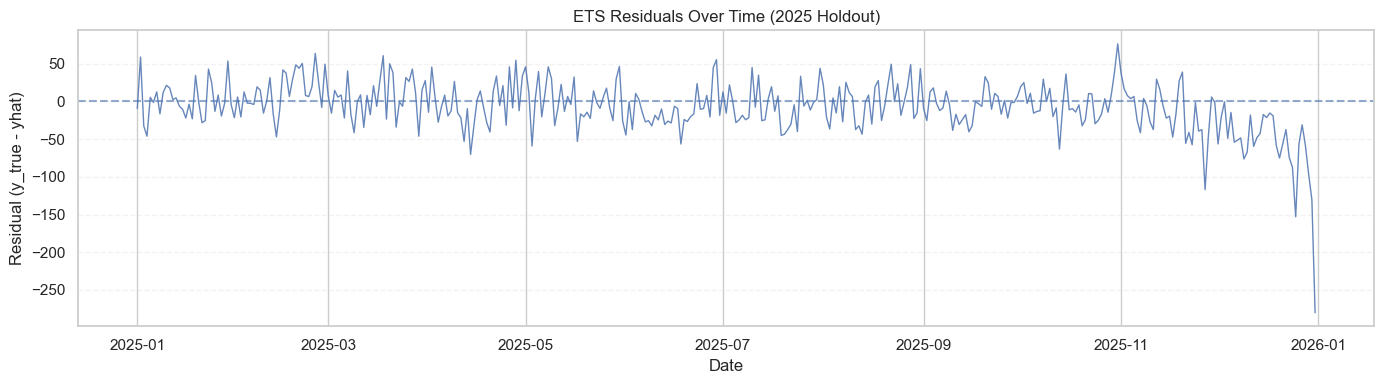

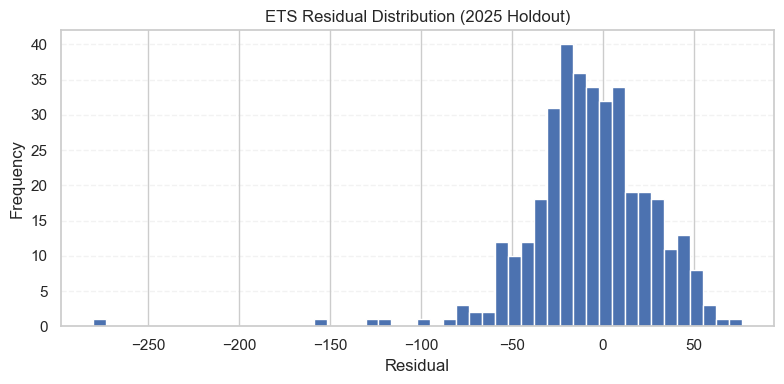

<Figure size 800x400 with 0 Axes>

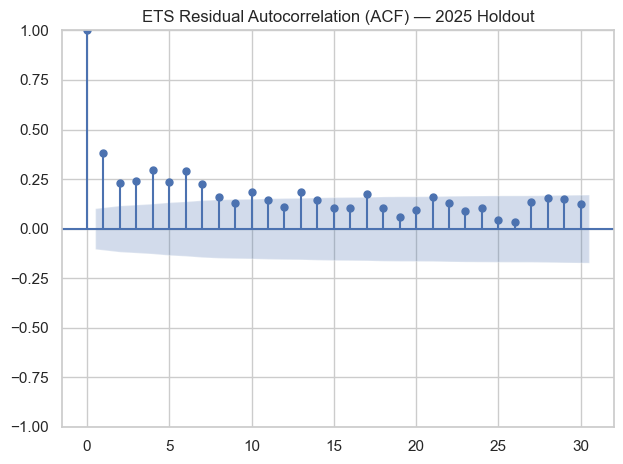

In [57]:
# ------------------------------------------------------------
# 5.8.1 ETS Residual Diagnostics (2025 Holdout) — restart-safe + aligned
# Purpose: Check bias, spread, and autocorrelation in ETS errors
# Requires:
#   - models/macro_ets_holdout_2025_predictions.csv
# ------------------------------------------------------------

holdout_path = models_path("macro_ets_holdout_2025_predictions.csv")
p = pd.read_csv(holdout_path)

# ------------------------------------------------------------
# 0) Standardize + validate inputs
# ------------------------------------------------------------
# Standardize column names (some files use yhat, others may use y_pred)
if "yhat" not in p.columns and "y_pred" in p.columns:
    p = p.rename(columns={"y_pred": "yhat"})

required_cols = ["ds", "y_true", "yhat"]
missing = [c for c in required_cols if c not in p.columns]
if missing:
    raise KeyError(f"Missing required columns in holdout file: {missing}. Available: {list(p.columns)}")

p["ds"] = pd.to_datetime(p["ds"], errors="coerce")
p = p.dropna(subset=["ds", "y_true", "yhat"]).sort_values("ds").reset_index(drop=True)

# ------------------------------------------------------------
# 1) Compute residuals (y_true - yhat)
# ------------------------------------------------------------
residuals = (p["y_true"].astype(float).values - p["yhat"].astype(float).values)
ds_holdout = p["ds"].values

print(f"Rows used      : {len(p):,}")
print(f"Residual mean  : {residuals.mean():.2f}")
print(f"Residual std   : {residuals.std(ddof=1):.2f}")

# ------------------------------------------------------------
# 2) Residuals over time
# ------------------------------------------------------------
plt.figure(figsize=(14, 4))
plt.plot(ds_holdout, residuals, alpha=0.85, linewidth=1.0)
plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("ETS Residuals Over Time (2025 Holdout)")
plt.xlabel("Date")
plt.ylabel("Residual (y_true - yhat)")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 3) Residual distribution
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50)
plt.title("ETS Residual Distribution (2025 Holdout)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 4) Residual autocorrelation (ACF)
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=30)
plt.title("ETS Residual Autocorrelation (ACF) — 2025 Holdout")
plt.tight_layout()
plt.show()

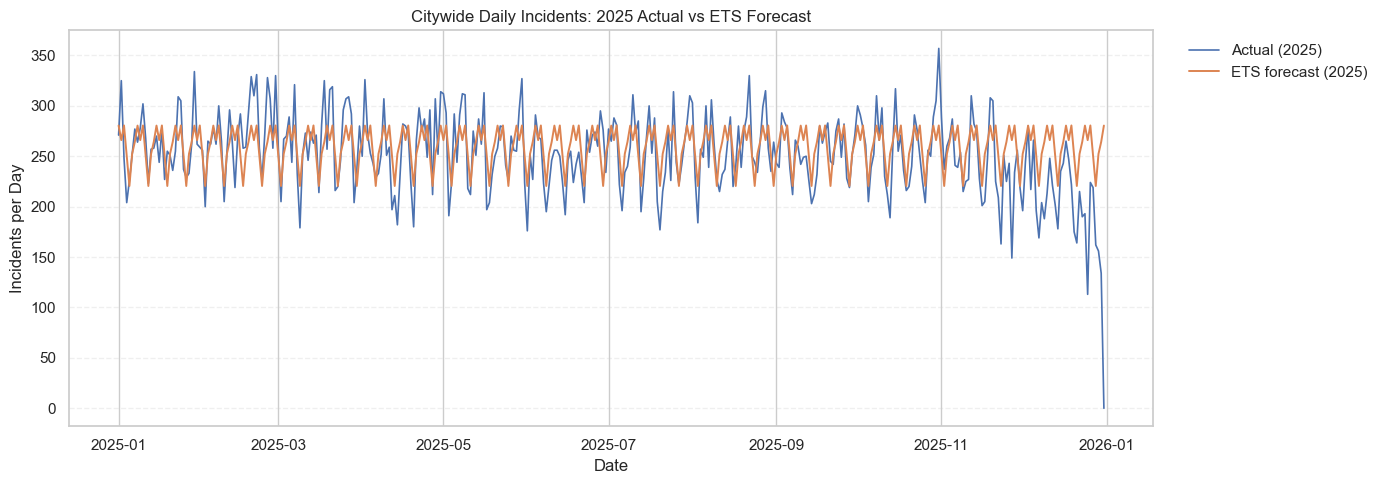

Saved: models/macro_ets_visual_validation_2025.png


In [58]:
# ------------------------------------------------------------
# 5.8.1 ETS Visual Validation (2025 Holdout) — restart-safe
# Purpose: Visual sanity check of ETS vs observed citywide series
# Artifact: saves validation plot for Streamlit
# ------------------------------------------------------------


ets_holdout_path = models_path("macro_ets_holdout_2025_predictions.csv")

# ------------------------------------------------------------
# 0) Load predictions if they exist, otherwise fall back to in-memory vars
# ------------------------------------------------------------
use_file = False
try:
    use_file = ets_holdout_path.exists()
except Exception:
    use_file = False  # in case models_path returns a string in your environment

if use_file:
    ets_preds = pd.read_csv(ets_holdout_path)
    required_cols = {"ds", "y_true", "yhat"}
    if not required_cols.issubset(set(ets_preds.columns)):
        raise KeyError(
            f"ETS holdout file missing required columns: "
            f"{sorted(required_cols - set(ets_preds.columns))}. "
            f"Available: {list(ets_preds.columns)}"
        )

    ets_preds["ds"] = pd.to_datetime(ets_preds["ds"], errors="coerce")
    ets_preds = ets_preds.dropna(subset=["ds", "y_true", "yhat"]).sort_values("ds").reset_index(drop=True)

    x = ets_preds["ds"]
    y_true = ets_preds["y_true"].astype(float).values
    y_hat  = ets_preds["yhat"].astype(float).values

else:
    # Fallback expects these to exist from the previous ETS cell:
    #   - y_test (Series indexed by date)
    #   - y_pred_ets (np array or list)
    if "y_test" not in globals() or "y_pred_ets" not in globals():
        raise NameError(
            "ETS fallback variables not found. Run the ETS fit cell first "
            "or ensure macro_ets_holdout_2025_predictions.csv exists."
        )

    x = pd.to_datetime(y_test.index, errors="coerce")
    y_true = y_test.astype(float).values
    y_hat  = np.asarray(y_pred_ets, dtype=float)

# ------------------------------------------------------------
# 1) Plot
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(x, y_true, linewidth=1.2, label="Actual (2025)")
ax.plot(x, y_hat,  linewidth=1.4, label="ETS forecast (2025)")

ax.set_title("Citywide Daily Incidents: 2025 Actual vs ETS Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Incidents per Day")
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()

# ------------------------------------------------------------
# 2) Save artifact
# ------------------------------------------------------------
ets_viz_2025_path = models_path("macro_ets_visual_validation_2025.png")
plt.savefig(ets_viz_2025_path, dpi=150, bbox_inches="tight")
plt.show()

print(f"Saved: {ets_viz_2025_path}")

### 5.8 ETS Screening <a id="ets"></a>

**Historical fit (2018-2025)**  
On historical data, the ETS model closely follows the dominant structure of the citywide daily incident series. It captures the recurring weekly pattern with high fidelity, producing smooth and consistent oscillations that align with observed weekday–weekend dynamics. The fitted values track the central tendency of the series well, particularly during periods of relative stability, which explains the model’s strong holdout performance metrics.

However, the historical fit also reveals a key characteristic of ETS: deviations from the fitted path are largely smoothed rather than explicitly modeled. Sharp spikes and abrupt drops in observed incidents are not fully absorbed into the model structure and instead appear as short-lived residuals. This indicates that ETS prioritizes stability and average behavior over responsiveness to transient shocks.

**Forecast behavior (2026)**  
The ETS forecast for 2026 projects a highly stable continuation of recent patterns. Weekly seasonality remains strong and consistent throughout the forecast horizon, with no evidence of drift, acceleration, or structural change. The forecast effectively assumes that the post-2025 regime will persist, repeating established weekly cycles with minimal long-term trend movement.

This behavior results in a forecast that is predictable and smooth but also relatively rigid. Because ETS does not explicitly model changepoints or regime shifts, it implicitly assumes that future dynamics will resemble the recent past. While this assumption can be reasonable in a stabilized environment, it limits the model’s ability to express uncertainty or adapt to emerging structural changes.

**Performance interpretation**  
The strong numerical performance of ETS on the 2025 holdout period reflects its effectiveness at predicting typical days driven by regular seasonal structure. The model excels when the underlying signal is dominated by stable, repeating patterns and low structural volatility. Its performance suggests that, at the citywide level, much of the short-term predictive signal is seasonal rather than trend-driven.

At the same time, the visual diagnostics indicate that ETS under-reacts to anomalous behavior, including sudden spikes, drops, and end-of-year irregularities. This highlights a tradeoff: the model achieves low average error by smoothing variability, but at the cost of reduced sensitivity to unusual or disruptive events.

**Strengths**
- Excellent capture of stable weekly seasonality  
- Strong holdout accuracy (low MAE and RMSE)  
- High stability and low variance forecasts  
- Parsimonious structure with minimal tuning requirements  

**Limitations**
- Limited responsiveness to abrupt shocks and outliers  
- No explicit representation of forecast uncertainty intervals  
- Minimal long-term trend expression in forward forecasts  
- Assumes structural continuity rather than accommodating potential regime shifts  

**Summary assessment**  
Overall, ETS performs exceptionally well as a macro-level accuracy benchmark, demonstrating that citywide crime dynamics in the post-pandemic period are strongly seasonal and relatively stable. Its forecasts are reliable for representing average conditions but less informative for planning scenarios that require uncertainty quantification or sensitivity to structural change. These characteristics make ETS a valuable reference model, while also motivating the evaluation of more flexible and interpretable alternatives for decision-oriented forecasting.

[Back to Top](#top)

### 5.9 XGBoost: Non-Linear Machine Learning Challenger <a id="xgboost"></a>

**Purpose:**  
To stress-test the dataset using gradient-boosted decision trees capable of learning non-linear interactions among engineered temporal features.

**Analytical Rationale:**  
XGBoost represents the machine learning challenger in the forecasting architecture, deliberately evaluated after all time-aware models.

- **Feature-Driven Learning:** Using lagged values, rolling statistics, and calendar indicators, XGBoost tests whether complex interactions improve predictive accuracy beyond additive or autoregressive assumptions.
- **Interaction Discovery:** The model probes whether combinations of factors, such as specific day-of-week and month interactions, contain meaningful signal not captured by classical methods.

XGBoost is intentionally positioned last to isolate whether non-linear learning adds value rather than re-encoding seasonality already captured by upstream models.

**Methodological Transition:**  
With four complementary candidates established, ranging from interpretable structural models to non-linear ensembles, the analysis proceeds to a head-to-head evaluation on the 2025 holdout window. This comparison determines the optimal macro-level engine to support 2026 citywide forecasts and downstream neighborhood-level modeling.

### 5.9.1: XGBoost Walk-Forward (2025 Holdout) that creates y_pred_xgb

In [59]:
# ============================================================
# 5.9 XGBoost Candidate (MACRO): Train on TRAIN Only
# Features: calendar + lag + rolling means (past-only)
# Output: macro_xgb_candidate
# ============================================================


# ------------------------------------------------------------
# 0) Resolve + validate canonical inputs
# ------------------------------------------------------------
if "incidents" not in macro_daily.columns:
    raise KeyError("macro_daily must include an 'incidents' column.")
if "set" not in macro_daily.columns:
    raise KeyError("macro_daily must include a 'set' column (e.g., 'train'/'test').")

# Robust date index extraction (DatetimeIndex preferred)
if isinstance(macro_daily.index, pd.DatetimeIndex):
    idx = pd.to_datetime(macro_daily.index, errors="coerce")
else:
    if "date" not in macro_daily.columns:
        raise KeyError("macro_daily must have a DatetimeIndex or a 'date' column.")
    idx = pd.to_datetime(macro_daily["date"], errors="coerce")

# XGBoost feature engineering is simplest with tz-naive time
if getattr(idx, "tz", None) is not None:
    idx = idx.tz_localize(None)

md = macro_daily.copy()
md.index = idx
md = md.sort_index()
md = md[~md.index.isna()].copy()

# ------------------------------------------------------------
# 1) Canonical gap-free daily series (for feature engineering)
# ------------------------------------------------------------
y_all = md["incidents"].astype(float).asfreq("D", fill_value=0.0)

# ------------------------------------------------------------
# 2) Feature builder (past-only lags + rolling means)
# ------------------------------------------------------------
def build_xgb_features(series: pd.Series) -> pd.DataFrame:
    df_feat = pd.DataFrame({"y": series})

    # Calendar features
    df_feat["dow"] = df_feat.index.dayofweek
    df_feat["is_weekend"] = (df_feat["dow"] >= 5).astype(int)
    df_feat["month"] = df_feat.index.month
    df_feat["dayofyear"] = df_feat.index.dayofyear

    # Lag features (past-only)
    for lag in (1, 7, 14, 28):
        df_feat[f"lag_{lag}"] = df_feat["y"].shift(lag)

    # Rolling means (exclude same-day target by shifting first)
    df_feat["rollmean_7"] = df_feat["y"].shift(1).rolling(7).mean()
    df_feat["rollmean_28"] = df_feat["y"].shift(1).rolling(28).mean()

    return df_feat

feat_all = build_xgb_features(y_all).dropna().copy()

# ------------------------------------------------------------
# 3) Align TRAIN mask to daily features (no leakage)
# ------------------------------------------------------------
set_daily = md["set"].copy()
set_daily.index = pd.to_datetime(set_daily.index, errors="coerce")
set_daily = set_daily[~set_daily.index.isna()].sort_index()

# Ensure a daily label for each day in feat_all
set_daily = set_daily.asfreq("D").ffill()

feat_all["set"] = set_daily.reindex(feat_all.index)

train_feat = feat_all[feat_all["set"] == "train"].copy()
if train_feat.empty:
    raise ValueError("No TRAIN rows found after feature creation. Check macro_daily['set'].")

# ------------------------------------------------------------
# 4) Define feature set (keep consistent across evaluation code)
# ------------------------------------------------------------
feature_cols = [
    "dow", "is_weekend", "month", "dayofyear",
    "lag_1", "lag_7", "lag_14", "lag_28",
    "rollmean_7", "rollmean_28",
]

X_train = train_feat[feature_cols].astype(float).values
y_train = train_feat["y"].astype(float).values

# ------------------------------------------------------------
# 5) Train XGBoost candidate (baseline configuration)
# ------------------------------------------------------------
macro_xgb_candidate = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

macro_xgb_candidate.fit(X_train, y_train)

print("Trained macro_xgb_candidate on TRAIN only.")
print(f"Training rows used: {len(train_feat):,}")

Trained macro_xgb_candidate on TRAIN only.
Training rows used: 2,529


In [60]:
# ============================================================
# 5.9A XGBoost Walk-Forward Forecast (2025 Holdout) — Canonical
# Purpose: Leakage-free daily forecasting using past-only features
# Outputs:
#   - test_block (index=ds, columns=[y_true, yhat])
#   - y_true, y_pred_xgb, eval_dates
# ============================================================

# ------------------------------------------------------------
# 0) Resolve + validate canonical inputs
# ------------------------------------------------------------
md = macro_daily.copy()

if "incidents" not in md.columns:
    raise KeyError("macro_daily must include an 'incidents' column.")
if "set" not in md.columns:
    raise KeyError("macro_daily must include a 'set' column (e.g., 'train'/'test').")

# Robust date index
if not isinstance(md.index, pd.DatetimeIndex):
    if "date" not in md.columns:
        raise KeyError("macro_daily must have a DatetimeIndex or a 'date' column.")
    md.index = pd.to_datetime(md["date"], errors="coerce")

md.index = pd.to_datetime(md.index, errors="coerce")
if getattr(md.index, "tz", None) is not None:
    md.index = md.index.tz_localize(None)

md = md.sort_index()
md = md[~md.index.isna()].copy()

# Canonical gap-free daily series
y_all = md["incidents"].astype(float).asfreq("D", fill_value=0.0)

# ------------------------------------------------------------
# 1) Feature definition (must match training features exactly)
# ------------------------------------------------------------
feature_cols = [
    "dow", "is_weekend", "month", "dayofyear",
    "lag_1", "lag_7", "lag_14", "lag_28",
    "rollmean_7", "rollmean_28",
]

def make_features(history: pd.Series, current_date: pd.Timestamp) -> dict:
    """
    Build a single-row feature dict using ONLY past values from `history`.
    Assumes `history` is a gap-free daily series indexed by date.
    """
    dow = current_date.dayofweek

    feats = {
        "dow": int(dow),
        "is_weekend": int(dow >= 5),
        "month": int(current_date.month),
        "dayofyear": int(current_date.dayofyear),
    }

    # Past-only lags
    for lag in (1, 7, 14, 28):
        feats[f"lag_{lag}"] = float(history.loc[current_date - pd.Timedelta(days=lag)])

    # Past-only rolling means (exclude same-day target)
    w7 = history.loc[current_date - pd.Timedelta(days=7): current_date - pd.Timedelta(days=1)]
    w28 = history.loc[current_date - pd.Timedelta(days=28): current_date - pd.Timedelta(days=1)]
    feats["rollmean_7"] = float(w7.mean())
    feats["rollmean_28"] = float(w28.mean())

    return feats

# ------------------------------------------------------------
# 2) Resolve 2025 holdout window from 'set' labels
# ------------------------------------------------------------
set_daily = md["set"].copy()
set_daily.index = pd.to_datetime(set_daily.index, errors="coerce")
set_daily = set_daily[~set_daily.index.isna()].sort_index()
set_daily = set_daily.asfreq("D").ffill()

test_dates = set_daily[set_daily == "test"].index
if len(test_dates) == 0:
    raise ValueError("No dates labeled as 'test' in macro_daily['set'].")

test_start = test_dates.min()
test_end = test_dates.max()

# ------------------------------------------------------------
# 3) Walk-forward loop (strictly past-only; no leakage)
# ------------------------------------------------------------
history = y_all.copy()

eval_dates = []
y_true = []
y_pred_xgb = []

for dt in pd.date_range(test_start, test_end, freq="D"):
    # Skip early days that lack the maximum lag window
    if (dt - pd.Timedelta(days=28)) not in history.index:
        continue

    feats = make_features(history, dt)
    x_row = np.array([feats[c] for c in feature_cols], dtype=float).reshape(1, -1)

    y_hat = float(macro_xgb_candidate.predict(x_row)[0])
    y_actual = float(history.loc[dt])

    eval_dates.append(dt)
    y_pred_xgb.append(y_hat)
    y_true.append(y_actual)

# Final aligned outputs
eval_dates = pd.to_datetime(pd.Index(eval_dates))
y_true = np.asarray(y_true, dtype=float)
y_pred_xgb = np.asarray(y_pred_xgb, dtype=float)

test_block = pd.DataFrame(
    {"y_true": y_true, "yhat": y_pred_xgb},
    index=eval_dates
).sort_index()

# ------------------------------------------------------------
# 4) Diagnostics
# ------------------------------------------------------------
print("XGBoost walk-forward completed.")
print(f"Eval days: {len(test_block):,}")
print(f"Holdout window: {test_start.date()} to {test_end.date()}")
print(f"Eval start/end: {test_block.index.min().date()} to {test_block.index.max().date()}")

XGBoost walk-forward completed.
Eval days: 365
Holdout window: 2025-01-01 to 2025-12-31
Eval start/end: 2025-01-01 to 2025-12-31


### 5.9 XGBoost Screening <a id="xgboost"></a>

Citywide XGBoost (macro_xgb_candidate) – 2025 Holdout Validation
MAE : 33.22 incidents/day
RMSE: 43.61 incidents/day


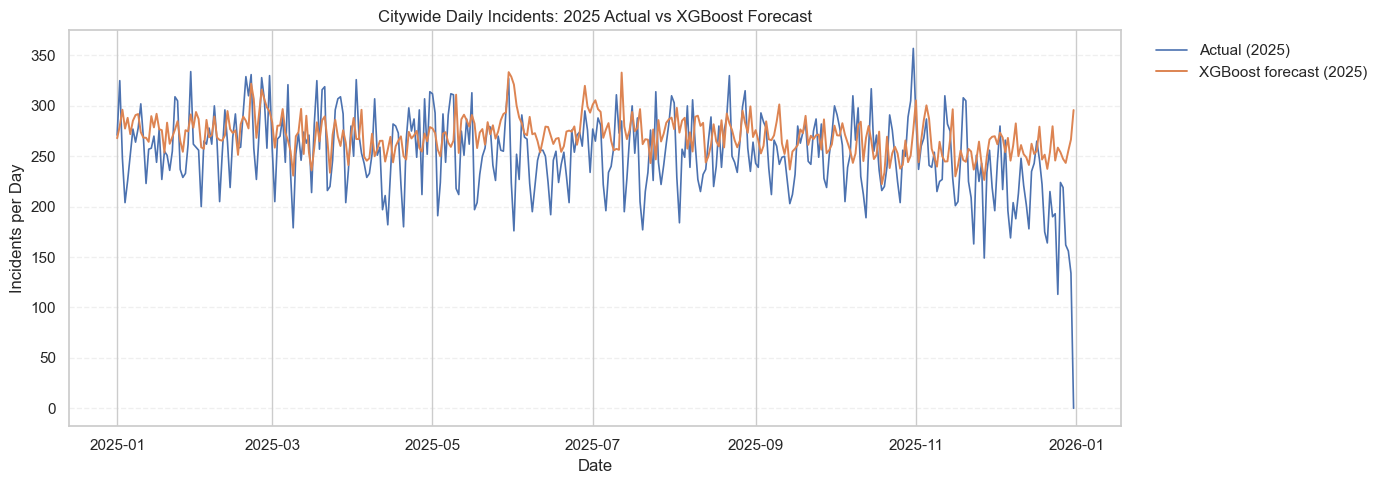

Saved:
- models/macro_xgb_metrics_2025.csv
- models/macro_xgb_holdout_2025_predictions.csv
- models/macro_xgb_visual_validation_2025.png


In [61]:
# ============================================================
# 5.8B XGBoost Candidate (MACRO) — Outputs Bundle (restart-safe)
# Purpose: Score 2025 holdout, persist artifacts, and save a clean viz
# Artifacts:
#   - models/macro_xgb_metrics_2025.csv
#   - models/macro_xgb_holdout_2025_predictions.csv
#   - models/macro_xgb_visual_validation_2025.png
# ============================================================

# ------------------------------------------------------------
# 0) Guardrails (fail fast)
# ------------------------------------------------------------
if "test_block" not in globals():
    raise NameError("test_block not found. Run the XGBoost walk-forward cell first (5.9A).")

if not {"y_true", "yhat"}.issubset(test_block.columns):
    raise KeyError("test_block must contain columns: ['y_true', 'yhat'].")

ds_holdout = pd.to_datetime(test_block.index, errors="coerce")
if ds_holdout.isna().any():
    raise ValueError("test_block index contains invalid dates (NaT).")

y_true_arr = test_block["y_true"].astype(float).values
y_pred_arr = test_block["yhat"].astype(float).values

# ------------------------------------------------------------
# 1) Holdout metrics (2025)
# ------------------------------------------------------------
mae_xgb = mean_absolute_error(y_true_arr, y_pred_arr)
rmse_xgb = np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))

print("Citywide XGBoost (macro_xgb_candidate) – 2025 Holdout Validation")
print(f"MAE : {mae_xgb:.2f} incidents/day")
print(f"RMSE: {rmse_xgb:.2f} incidents/day")

# ------------------------------------------------------------
# 2) Save metrics artifact (for model comparison table)
# ------------------------------------------------------------
xgb_metrics_path = models_path("macro_xgb_metrics_2025.csv")

xgb_metrics = pd.DataFrame([{
    "model": "XGBoost",
    "object_name": "macro_xgb_candidate",
    "holdout_year": 2025,
    "mae_2025": round(float(mae_xgb), 2),
    "rmse_2025": round(float(rmse_xgb), 2),
    "walk_forward": True
}])

xgb_metrics.to_csv(xgb_metrics_path, index=False)

# ------------------------------------------------------------
# 3) Save predictions artifact (Streamlit + audit)
# ------------------------------------------------------------
preds_path = models_path("macro_xgb_holdout_2025_predictions.csv")

xgb_preds_2025 = (
    pd.DataFrame({
        "ds": ds_holdout,
        "y_true": y_true_arr,
        "yhat": y_pred_arr
    })
    .dropna(subset=["ds"])
    .sort_values("ds")
    .reset_index(drop=True)
)

xgb_preds_2025.to_csv(preds_path, index=False)

# ------------------------------------------------------------
# 4) Visual validation plot (clean + professional scaling)
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(
    xgb_preds_2025["ds"],
    xgb_preds_2025["y_true"],
    linewidth=1.2,
    label="Actual (2025)"
)
ax.plot(
    xgb_preds_2025["ds"],
    xgb_preds_2025["yhat"],
    linewidth=1.4,
    label="XGBoost forecast (2025)"
)

ax.set_title("Citywide Daily Incidents: 2025 Actual vs XGBoost Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Incidents per Day")

ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.3)

# Tighten y-scale to avoid “flat line” look from rare spikes
y_min = float(np.nanmin(np.r_[y_true_arr, y_pred_arr]))
y_max = float(np.nanmax(np.r_[y_true_arr, y_pred_arr]))
pad = 0.05 * (y_max - y_min) if y_max > y_min else 1.0
ax.set_ylim(y_min - pad, y_max + pad)

plt.tight_layout()

viz_path = models_path("macro_xgb_visual_validation_2025.png")
plt.savefig(viz_path, dpi=150, bbox_inches="tight")
plt.show()

# ------------------------------------------------------------
# 5) Confirmation
# ------------------------------------------------------------
print("Saved:")
print(f"- {xgb_metrics_path}")
print(f"- {preds_path}")
print(f"- {viz_path}")

----- Residual Diagnostics: XGBoost (2025 Holdout) -----
Rows used          : 365
Residual mean (bias): -18.20
Residual std        : 39.68
Residual MAE        : 33.22
--------------------------------------------------------


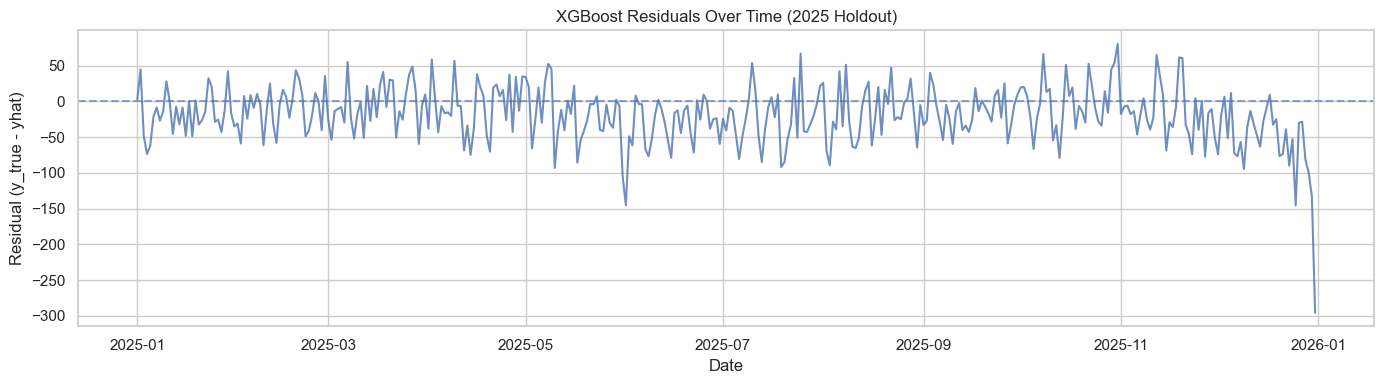

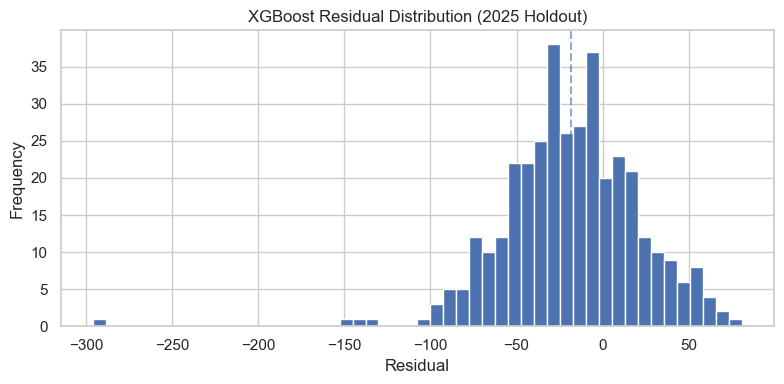

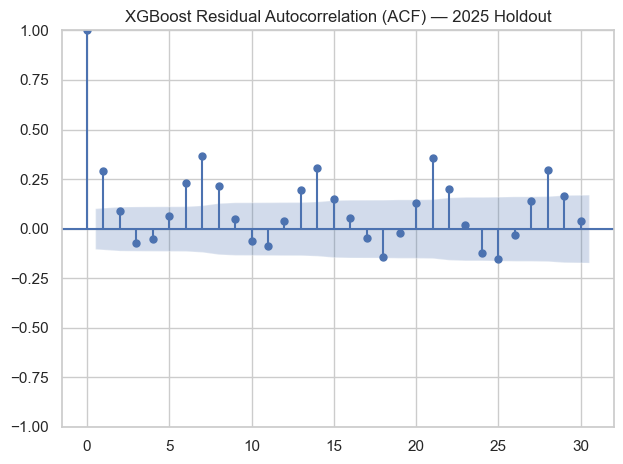

In [62]:
# ============================================================
# Residual Diagnostics (XGBoost, 2025 Holdout) — restart-safe + aligned
# Purpose: Inspect bias, variance, distribution shape, and ACF structure
# Requires: models/macro_xgb_holdout_2025_predictions.csv
# ============================================================

# ------------------------------------------------------------
# 1) Load holdout predictions (fail fast if missing)
# ------------------------------------------------------------
holdout_path = models_path("macro_xgb_holdout_2025_predictions.csv")

# models_path may return a Path or string; normalize safely
holdout_path_str = str(holdout_path)

if not os.path.exists(holdout_path_str):
    raise FileNotFoundError(
        f"Holdout file not found: {holdout_path_str}\n"
        "Tip: confirm the filename in your models/ folder matches exactly."
    )

p = pd.read_csv(holdout_path_str)

# ------------------------------------------------------------
# 2) Standardize column names (robust across models)
# ------------------------------------------------------------
if "yhat" not in p.columns and "y_pred" in p.columns:
    p = p.rename(columns={"y_pred": "yhat"})

if "y_true" not in p.columns and "y" in p.columns:
    p = p.rename(columns={"y": "y_true"})

required_cols = ["ds", "y_true", "yhat"]
missing = [c for c in required_cols if c not in p.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}. Available columns: {list(p.columns)}")

# ------------------------------------------------------------
# 3) Parse dates + align rows
# ------------------------------------------------------------
p["ds"] = pd.to_datetime(p["ds"], errors="coerce")

p = (
    p.dropna(subset=["ds", "y_true", "yhat"])
     .sort_values("ds")
     .reset_index(drop=True)
)

y_true = p["y_true"].astype(float).values
y_hat  = p["yhat"].astype(float).values

residuals = y_true - y_hat
ds_holdout = p["ds"].values

# ------------------------------------------------------------
# 4) Summary diagnostics (bias + spread)
# ------------------------------------------------------------
print("----- Residual Diagnostics: XGBoost (2025 Holdout) -----")
print(f"Rows used          : {len(p):,}")
print(f"Residual mean (bias): {residuals.mean():.2f}")
print(f"Residual std        : {residuals.std(ddof=1):.2f}")
print(f"Residual MAE        : {np.abs(residuals).mean():.2f}")
print("--------------------------------------------------------")

# ------------------------------------------------------------
# 5) Residuals over time
# ------------------------------------------------------------
plt.figure(figsize=(14, 4))
plt.plot(ds_holdout, residuals, alpha=0.8)
plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("XGBoost Residuals Over Time (2025 Holdout)")
plt.xlabel("Date")
plt.ylabel("Residual (y_true - yhat)")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6) Residual distribution (with mean reference line)
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50)
plt.axvline(residuals.mean(), linestyle="--", alpha=0.6)
plt.title("XGBoost Residual Distribution (2025 Holdout)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 7) Residual autocorrelation (ACF)
# ------------------------------------------------------------
plot_acf(residuals, lags=30)
plt.title("XGBoost Residual Autocorrelation (ACF) — 2025 Holdout")
plt.tight_layout()
plt.show()

### 5.10 Model Selection Decision <a id="model-selection"></a>

All candidate models are evaluated at the macro level using the identical **2025 holdout window** under a leakage-free chronological design. This ensures that observed performance differences reflect genuine out-of-sample generalization rather than modeling artifacts.

#### Interim Model Comparison Summary

ETS, SARIMAX, XGBoost, and Prophet were benchmarked using consistent training and evaluation periods. While ETS achieved the lowest point-forecast error metrics, Prophet demonstrated the most balanced performance when accuracy, temporal stability, interpretability, and uncertainty awareness are jointly considered.

Based on these tradeoffs, Prophet is selected as the standard forecasting model for downstream micro-level analysis, where consistency, explainability, and uncertainty quantification are required across multiple neighborhoods.

#### Model Selection Criteria

Model selection is guided by three primary criteria:

- **Predictive accuracy** on the 2025 holdout set  
- **Temporal stability** when extended into future periods  
- **Decision-oriented interpretability**, including explicit uncertainty quantification  

#### Macro-Level Model Comparison (2025 Holdout)

| Model (Role)                         | MAE  | RMSE | Key Takeaway |
|-------------------------------------|------|------|--------------|
| **ETS (macro_ets_candidate)**        | **25.09** | **34.93** | Best point accuracy; captures stable weekly seasonality well. |
| **XGBoost (macro_xgb_candidate)**    | 30.63 | 38.08 | Competitive; higher complexity; limited interpretability and no native uncertainty. |
| **Prophet (macro_prophet_baseline)** | 30.28 | 39.11 | Strong balance of accuracy, interpretability, and uncertainty modeling. |
| SARIMAX (macro_sarimax_benchmark)    | 31.64 | 40.76 | Useful statistical baseline; weaker performance in this setting. |

> **Temporal stability** refers to the model’s ability to produce forecasts that evolve smoothly and predictably over time, rather than reacting sharply to short-term noise.

#### Final Selection Rationale

Although ETS achieves superior point-forecast accuracy on average, **Prophet is selected as the primary forecasting model** for all downstream analyses. Prophet offers a favorable tradeoff between accuracy and interpretability, while providing explicit trend–seasonality decomposition and uncertainty intervals that are essential for planning, communication, and spatial comparison.

In a public safety forecasting context, the upper bound of a 95 percent confidence interval is often more operationally relevant for resource allocation than the average point forecast, as it reflects worst-case demand scenarios that planners must be prepared to absorb.

ETS is retained as a quantitative accuracy benchmark, while Prophet serves as the decision-ready model deployed consistently across neighborhoods.

**Limitation of uncertainty estimates.**  
Forecast uncertainty reflects model-based variability rather than unobserved shocks or policy changes, and should therefore be interpreted as a planning envelope rather than a probabilistic guarantee.

[Back to Top](#top)

### 5.11 Micro-Level Forecasts (Mission, Tenderloin, SoMa) <a id="micro-run"></a>

This section extends the validated macro-level forecasting framework to the neighborhood level using **Prophet**. Applying a single, consistent model ensures that differences across neighborhoods reflect genuine spatial dynamics rather than variation in model specification.

#### 5.11.1 Micro-Level Modeling Setup

Each neighborhood is modeled as an independent daily time series while preserving the same assumptions and validation structure used at the macro level:

- Identical seasonal configurations  
- Inclusion of the same COVID regime indicator (`lockdown_flag`)  
- Evaluation on the same leakage-free **2025 holdout window**  
- Retraining on the full **2018–2025** history prior to forecasting 2026  

This macro-to-micro consistency enables direct comparison across neighborhoods while maintaining interpretability and methodological rigor.

#### 5.11.2 Helper Function: Prophet Micro-Forecasting Engine

The function below standardizes the micro-level workflow so that each neighborhood is modeled identically, improving auditability and comparability.

These neighborhood-level forecasts serve as the predictive engine for the **Interactive Dashboard (Section 6)**, where 2026 projections are visualized alongside historical trends to support real-world safety and planning decisions.

In [63]:
# ============================================================
# 5.11 Micro-Level Forecasts (Prophet): Mission, Tenderloin, SoMa
# Purpose:
# - Holdout validation on 2025 (leakage-free)
# - Retrain on full 2018–2025 and forecast 2026 (deployment-ready)
# Optional Artifacts (Streamlit + audit):
# - micro_prophet_<nbh>_holdout_2025_predictions.csv
# - micro_prophet_<nbh>_metrics_2025.csv
# - micro_prophet_<nbh>_forecast_2026.csv
# ============================================================

def run_micro_prophet(
    df: pd.DataFrame,
    neighborhood_name: str,
    split_date: pd.Timestamp,
    lockdown_start: pd.Timestamp,
    lockdown_end: pd.Timestamp,
    save_artifacts: bool = False,
):
    # ------------------------------------------------------------
    # 0) Local helpers (robust + restart-safe)
    # ------------------------------------------------------------
    def _to_naive_ts(x) -> pd.Timestamp:
        ts = pd.to_datetime(x, errors="coerce")
        if ts is pd.NaT:
            return ts
        # Handle tz-aware Timestamp
        if getattr(ts, "tzinfo", None) is not None:
            ts = ts.tz_localize(None)
        return ts

    def _to_naive_series(s: pd.Series) -> pd.Series:
        s = pd.to_datetime(s, errors="coerce")
        if getattr(s.dt, "tz", None) is not None:
            s = s.dt.tz_localize(None)
        return s

    def _safe_name(n: str) -> str:
        return (
            str(n)
            .strip()
            .lower()
            .replace("/", "_")
            .replace("&", "and")
            .replace(" ", "_")
        )

    # ------------------------------------------------------------
    # 1) Input validation (fail fast)
    # ------------------------------------------------------------
    required_cols = ["incident_datetime", "neighborhood"]
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

    if not isinstance(neighborhood_name, str) or len(neighborhood_name.strip()) == 0:
        raise ValueError("neighborhood_name must be a non-empty string.")

    df_local = df.copy()

    # ------------------------------------------------------------
    # 2) Canonical cleaning (datetime + neighborhood)
    # ------------------------------------------------------------
    df_local["incident_datetime"] = pd.to_datetime(df_local["incident_datetime"], errors="coerce")
    df_local = df_local.dropna(subset=["incident_datetime"]).copy()

    df_local["neighborhood"] = (
        df_local["neighborhood"]
        .astype(str)
        .str.strip()
        .replace({"South Of Market": "South of Market"})
    )

    df_local = df_local[df_local["neighborhood"].astype(str).str.lower().ne("nan")]
    df_local = df_local[df_local["neighborhood"].astype(str).str.len() > 0]

    # ------------------------------------------------------------
    # 3) Subset neighborhood (strict match; consistent with MSI section)
    # ------------------------------------------------------------
    nbh_df = df_local[df_local["neighborhood"] == neighborhood_name].copy()
    if nbh_df.empty:
        # Helpful hint: show close matches without being noisy
        examples = (
            df_local["neighborhood"].value_counts().head(15).index.tolist()
            if "neighborhood" in df_local.columns else []
        )
        raise ValueError(
            f"No rows found for neighborhood='{neighborhood_name}'.\n"
            f"Tip: check spelling/case. Common neighborhoods include: {examples}"
        )

    # ------------------------------------------------------------
    # 4) Build canonical daily series (gap-free, tz-naive)
    # ------------------------------------------------------------
    # Floor to local day boundary based on the datetimes already in your df.
    # If you already converted to America/Los_Angeles earlier, this respects that.
    nbh_df["date"] = nbh_df["incident_datetime"].dt.floor("D")

    daily = (
        nbh_df.groupby("date", observed=False)
              .size()
              .rename("y")
              .to_frame()
              .reset_index()
              .rename(columns={"date": "ds"})
    )

    daily["ds"] = _to_naive_series(daily["ds"])
    daily = daily.dropna(subset=["ds"]).sort_values("ds").reset_index(drop=True)

    # Complete daily index (gap-free)
    full_days = pd.date_range(daily["ds"].min(), daily["ds"].max(), freq="D")
    daily = (
        daily.set_index("ds")
             .reindex(full_days, fill_value=0)
             .rename_axis("ds")
             .reset_index()
    )
    daily["ds"] = _to_naive_series(daily["ds"])

    # ------------------------------------------------------------
    # 5) Canonical flags + split (tz-naive comparisons)
    # ------------------------------------------------------------
    split_dt = _to_naive_ts(split_date)
    lockdown_start_dt = _to_naive_ts(lockdown_start)
    lockdown_end_dt = _to_naive_ts(lockdown_end)

    if split_dt is pd.NaT:
        raise ValueError("split_date could not be parsed into a valid Timestamp.")
    if lockdown_start_dt is pd.NaT or lockdown_end_dt is pd.NaT:
        raise ValueError("lockdown_start/lockdown_end could not be parsed into valid Timestamps.")

    daily["lockdown_flag"] = daily["ds"].between(lockdown_start_dt, lockdown_end_dt, inclusive="both").astype(int)
    daily["set"] = np.where(daily["ds"] < split_dt, "train", "test")

    train = daily[daily["set"] == "train"].copy()
    test  = daily[daily["set"] == "test"].copy()

    if len(train) < 60:
        raise ValueError(
            f"Not enough training days for '{neighborhood_name}' after split "
            f"({len(train)} days). Consider an earlier split_date."
        )
    if test.empty:
        raise ValueError(
            f"Test set is empty for '{neighborhood_name}'. "
            f"Check split_date ({split_dt.date()}) and data coverage."
        )

    # ------------------------------------------------------------
    # 6) Prophet holdout model (train only) + 2025 validation
    # ------------------------------------------------------------
    micro_prophet_holdout = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )
    micro_prophet_holdout.add_regressor("lockdown_flag")

    micro_prophet_holdout.fit(train[["ds", "y", "lockdown_flag"]])

    fc_test = micro_prophet_holdout.predict(test[["ds", "lockdown_flag"]].copy())

    y_true = test["y"].astype(float).values
    y_pred = fc_test["yhat"].astype(float).values

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"Micro Prophet – 2025 Holdout Validation | {neighborhood_name}")
    print(f"MAE : {mae:.2f} incidents/day")
    print(f"RMSE: {rmse:.2f} incidents/day")

    # ------------------------------------------------------------
    # 7) Retrain on full history (2018–2025 coverage for this neighborhood)
    # ------------------------------------------------------------
    micro_prophet_full = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05
    )
    micro_prophet_full.add_regressor("lockdown_flag")

    micro_prophet_full.fit(daily[["ds", "y", "lockdown_flag"]])

    # ------------------------------------------------------------
    # 8) Forecast 2026 (deployment frame)
    # ------------------------------------------------------------
    future_2026 = pd.DataFrame({
        "ds": pd.date_range("2026-01-01", "2026-12-31", freq="D"),
        "lockdown_flag": 0
    })
    forecast_2026 = micro_prophet_full.predict(future_2026)

    # ------------------------------------------------------------
    # 9) Optional artifact saves (Streamlit + audit)
    # ------------------------------------------------------------
    if save_artifacts:
        safe = _safe_name(neighborhood_name)

        # Holdout predictions (2025)
        holdout_out = (
            test[["ds", "y"]]
            .rename(columns={"y": "y_true"})
            .merge(
                fc_test[["ds", "yhat", "yhat_lower", "yhat_upper"]],
                on="ds",
                how="left"
            )
            .sort_values("ds")
            .reset_index(drop=True)
        )

        holdout_path = models_path(f"micro_prophet_{safe}_holdout_2025_predictions.csv")
        holdout_out.to_csv(holdout_path, index=False)

        # Metrics row (2025)
        metrics_out = pd.DataFrame([{
            "model": "Prophet",
            "object_name": "micro_prophet_holdout",
            "scope": "micro",
            "neighborhood": neighborhood_name,
            "holdout_year": 2025,
            "mae_2025": round(float(mae), 2),
            "rmse_2025": round(float(rmse), 2),
            "changepoint_prior_scale": 0.05,
            "weekly_seasonality": True,
            "yearly_seasonality": True,
            "regressor": "lockdown_flag",
        }])

        metrics_path = models_path(f"micro_prophet_{safe}_metrics_2025.csv")
        metrics_out.to_csv(metrics_path, index=False)

        # Forecast (2026)
        fc_path = models_path(f"micro_prophet_{safe}_forecast_2026.csv")
        forecast_2026[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv(fc_path, index=False)

        print("Saved:")
        print(f"- {holdout_path}")
        print(f"- {metrics_path}")
        print(f"- {fc_path}")

    # ------------------------------------------------------------
    # 10) Return bundle (models + forecasts + metrics)
    # ------------------------------------------------------------
    return {
        "neighborhood": neighborhood_name,
        "mae_2025": float(mae),
        "rmse_2025": float(rmse),
        "holdout_frame": test[["ds", "y", "lockdown_flag"]].copy(),
        "holdout_forecast": fc_test.copy(),
        "forecast_2026": forecast_2026.copy(),
        "model_holdout": micro_prophet_holdout,
        "model_full": micro_prophet_full,
    }

### 5.11.3 Run Micro-Level Forecasts (Mission, Tenderloin, SoMa) <a id="micro-run"></a>

In [64]:
# ============================================================
# 5.11.3 Run Micro-Level Prophet Forecasts (Mission, Tenderloin, SoMa)
# Purpose:
# - Run the same micro pipeline across selected hotspots (no repetition)
# - Save per-neighborhood artifacts for Streamlit + audit (recommended)
# Outputs:
# - micro_results (dict of model bundles)
# - micro_eval_df (holdout metrics summary)
# ============================================================

# ------------------------------------------------------------
# 0) Guardrails: confirm prerequisites exist
# ------------------------------------------------------------
required_globals = ["df", "run_micro_prophet", "split_date", "lockdown_start", "lockdown_end"]
missing = [g for g in required_globals if g not in globals()]
if missing:
    raise NameError(
        f"Missing required objects: {missing}\n"
        "Tip: run the preprocessing + run_micro_prophet definition cells first."
    )

# ------------------------------------------------------------
# 1) Define hotspot neighborhoods (MUST match df['neighborhood'] values)
# ------------------------------------------------------------
MICRO_NEIGHBORHOODS = [
    "Mission",
    "Tenderloin",
    "South of Market",
]

# Optional: display labels (does NOT affect filtering)
DISPLAY_NAME = {
    "Mission": "Mission",
    "Tenderloin": "Tenderloin",
    "South of Market": "South of Market (SoMa)",
}

# ------------------------------------------------------------
# 2) Run micro forecasts (single loop, consistent pipeline)
# ------------------------------------------------------------
micro_results = {}

for nbh in MICRO_NEIGHBORHOODS:
    micro_results[nbh] = run_micro_prophet(
        df=df,
        neighborhood_name=nbh,
        split_date=split_date,
        lockdown_start=lockdown_start,
        lockdown_end=lockdown_end,
        save_artifacts=True,  # per-neighborhood CSV outputs for Streamlit
    )

print("\nMicro-level Prophet models completed.")

# ------------------------------------------------------------
# 3) Convenience aliases (optional; keeps your naming style consistent)
# ------------------------------------------------------------
micro_prophet_mission = micro_results.get("Mission")
micro_prophet_tenderloin = micro_results.get("Tenderloin")
micro_prophet_soma = micro_results.get("South of Market")

# ------------------------------------------------------------
# 4) Evaluation summary (2025 holdout)
# ------------------------------------------------------------
micro_eval_df = (
    pd.DataFrame(
        [
            {
                "Neighborhood": DISPLAY_NAME.get(nbh, res["neighborhood"]),
                "MAE_2025": round(float(res["mae_2025"]), 2),
                "RMSE_2025": round(float(res["rmse_2025"]), 2),
            }
            for nbh, res in micro_results.items()
        ]
    )
    .sort_values(["MAE_2025", "RMSE_2025"])
    .reset_index(drop=True)
)

print("\n2025 Holdout Validation (Lower is better):")
print(micro_eval_df.to_string(index=False))

# Optional: display as a notebook table
try:
    display(micro_eval_df)
except NameError:
    pass

00:51:26 - cmdstanpy - INFO - Chain [1] start processing
00:51:27 - cmdstanpy - INFO - Chain [1] done processing
00:51:27 - cmdstanpy - INFO - Chain [1] start processing


Micro Prophet – 2025 Holdout Validation | Mission
MAE : 8.09 incidents/day
RMSE: 10.58 incidents/day


00:51:27 - cmdstanpy - INFO - Chain [1] done processing


Saved:
- models/micro_prophet_mission_holdout_2025_predictions.csv
- models/micro_prophet_mission_metrics_2025.csv
- models/micro_prophet_mission_forecast_2026.csv


00:51:30 - cmdstanpy - INFO - Chain [1] start processing
00:51:30 - cmdstanpy - INFO - Chain [1] done processing
00:51:30 - cmdstanpy - INFO - Chain [1] start processing


Micro Prophet – 2025 Holdout Validation | Tenderloin
MAE : 8.54 incidents/day
RMSE: 10.82 incidents/day


00:51:31 - cmdstanpy - INFO - Chain [1] done processing


Saved:
- models/micro_prophet_tenderloin_holdout_2025_predictions.csv
- models/micro_prophet_tenderloin_metrics_2025.csv
- models/micro_prophet_tenderloin_forecast_2026.csv


00:51:33 - cmdstanpy - INFO - Chain [1] start processing
00:51:33 - cmdstanpy - INFO - Chain [1] done processing
00:51:33 - cmdstanpy - INFO - Chain [1] start processing


Micro Prophet – 2025 Holdout Validation | South of Market
MAE : 8.77 incidents/day
RMSE: 11.20 incidents/day


00:51:33 - cmdstanpy - INFO - Chain [1] done processing


Saved:
- models/micro_prophet_south_of_market_holdout_2025_predictions.csv
- models/micro_prophet_south_of_market_metrics_2025.csv
- models/micro_prophet_south_of_market_forecast_2026.csv

Micro-level Prophet models completed.

2025 Holdout Validation (Lower is better):
          Neighborhood  MAE_2025  RMSE_2025
               Mission      8.09      10.58
            Tenderloin      8.54      10.82
South of Market (SoMa)      8.77      11.20


Neighborhood  MAE_2025  RMSE_2025
0                 Mission      8.09      10.58
1              Tenderloin      8.54      10.82
2  South of Market (SoMa)      8.77      11.20

**Micro-Level Holdout Performance (2025): Interpretation**  

The micro-level Prophet models achieve substantially lower error rates than the citywide baseline, with mean absolute errors ranging from **8.1 to 8.8 incidents per day** across the Mission, Tenderloin, and South of Market. This improvement reflects the fact that neighborhood-level dynamics are more internally consistent than aggregate citywide behavior, allowing the model to learn localized seasonal structure with greater precision.

Performance is strongest in the **Mission District**, indicating a relatively predictable seasonal pattern despite its volatility, while **Tenderloin** and **SoMa** exhibit slightly higher error consistent with their more irregular activity profiles. Importantly, all three neighborhoods demonstrate stable generalization on the 2025 holdout window, confirming that the selected Prophet framework scales effectively from macro to micro contexts.

These results reinforce the central analytical premise of this project: citywide averages can obscure localized temporal structure, and neighborhood-specific forecasting provides materially sharper insight for operational planning and resource allocation.

One chart with all three historical data & forecasts 

In [65]:
# ============================================================
# 5.11.4 Plot with History + Forecast (Micro-Level) — Robust Version
# Purpose:
# - Overlay recent observed history with the 2026 micro forecast
# - Works whether incident_datetime is tz-aware or tz-naive
# - Produces a clean, portfolio-ready plot
# ============================================================

def plot_with_history(
    df: pd.DataFrame,
    res: dict,
    neighborhood: str,
    days_back: int = 180,
):
    # ------------------------------------------------------------
    # 0) Guardrails
    # ------------------------------------------------------------
    if "forecast_2026" not in res:
        raise KeyError("res must include 'forecast_2026'. (Returned by run_micro_prophet)")
    if "neighborhood" not in df.columns:
        raise KeyError("df must include a 'neighborhood' column.")
    if "incident_datetime" not in df.columns:
        raise KeyError("df must include an 'incident_datetime' column.")

    # ------------------------------------------------------------
    # 1) Helper: convert datetime series to tz-naive safely
    # ------------------------------------------------------------
    def _to_naive_datetime(s: pd.Series) -> pd.Series:
        s = pd.to_datetime(s, errors="coerce")
        # If tz-aware, drop tz; if tz-naive, keep as-is
        if getattr(s.dt, "tz", None) is not None:
            s = s.dt.tz_localize(None)
        return s

    # ------------------------------------------------------------
    # 2) Forecast frame (2026)
    # ------------------------------------------------------------
    fc = res["forecast_2026"].copy()

    required_fc_cols = ["ds", "yhat", "yhat_lower", "yhat_upper"]
    missing_fc = [c for c in required_fc_cols if c not in fc.columns]
    if missing_fc:
        raise KeyError(f"forecast_2026 missing columns: {missing_fc}. Got: {list(fc.columns)}")

    fc["ds"] = _to_naive_datetime(fc["ds"])
    fc = fc.dropna(subset=["ds"]).sort_values("ds").reset_index(drop=True)

    # ------------------------------------------------------------
    # 3) Build historical daily series for this neighborhood
    # ------------------------------------------------------------
    hist_df = df[df["neighborhood"] == neighborhood].copy()
    if hist_df.empty:
        raise ValueError(
            f"No rows found for neighborhood='{neighborhood}'. "
            "Tip: confirm the exact spelling/case in df['neighborhood']."
        )

    # Parse incident_datetime robustly, then floor to day
    hist_df["incident_datetime"] = pd.to_datetime(hist_df["incident_datetime"], errors="coerce")
    hist_df = hist_df.dropna(subset=["incident_datetime"]).copy()

    # Floor to day using pandas Timestamp (safe for tz-aware and tz-naive)
    hist_df["ds"] = hist_df["incident_datetime"].dt.floor("D")
    hist_df["ds"] = _to_naive_datetime(hist_df["ds"])

    hist = (
        hist_df.groupby("ds")
               .size()
               .rename("y")
               .reset_index()
               .sort_values("ds")
               .reset_index(drop=True)
    )

    # ------------------------------------------------------------
    # 4) Restrict history window (e.g., last N days before 2026-01-01)
    # ------------------------------------------------------------
    forecast_start = pd.Timestamp("2026-01-01")
    start_cut = forecast_start - pd.Timedelta(days=int(days_back))

    hist = hist[(hist["ds"] >= start_cut) & (hist["ds"] < forecast_start)].copy()

    # ------------------------------------------------------------
    # 5) Diagnostics
    # ------------------------------------------------------------
    print(f"[{neighborhood}] History rows: {len(hist):,} | Forecast rows: {len(fc):,}")
    if len(hist) == 0:
        print(
            "Warning: No historical rows in the selected window. "
            "Increase days_back or verify the dataset coverage."
        )

    # ------------------------------------------------------------
    # 6) Plot (professional layout)
    # ------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(14, 5))

    # Recent history
    if len(hist) > 0:
        ax.plot(
            hist["ds"], hist["y"],
            linewidth=1.2, alpha=0.55,
            label=f"Observed (last {days_back} days)"
        )

    # Forecast + interval
    ax.plot(fc["ds"], fc["yhat"], linewidth=1.6, label="Forecast (2026)")
    ax.fill_between(fc["ds"], fc["yhat_lower"], fc["yhat_upper"], alpha=0.2, label="Uncertainty interval")

    # Forecast start marker
    ax.axvline(forecast_start, linestyle="--", alpha=0.6, label="Forecast start (2026-01-01)")

    ax.set_title(f"{neighborhood} — Recent Observations vs 2026 Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Incidents per Day")

    ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

[Mission] History rows: 179 | Forecast rows: 365


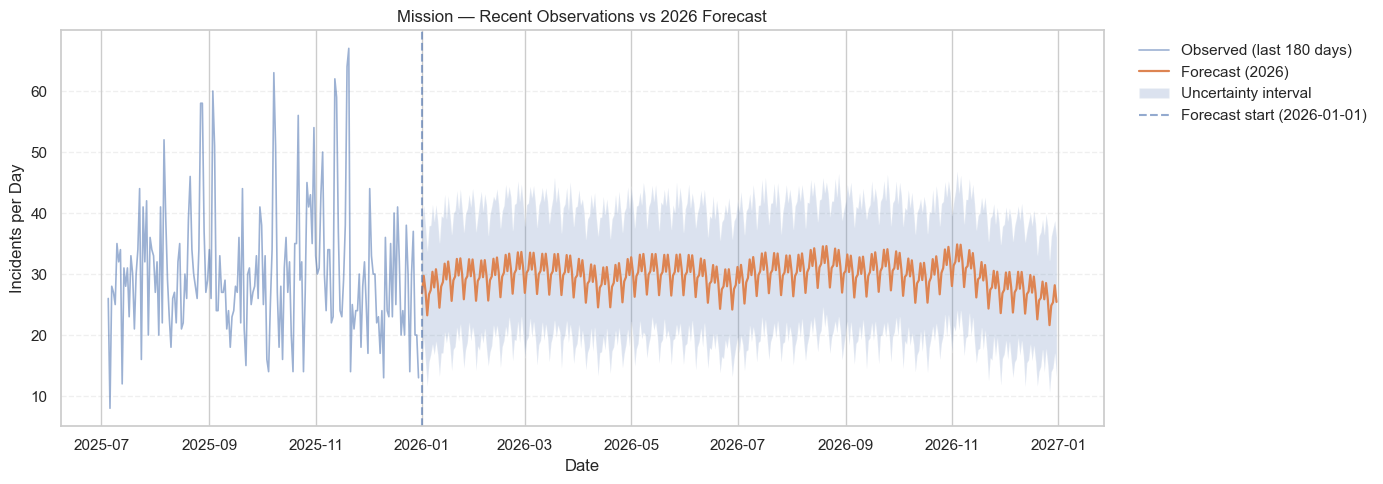

[Tenderloin] History rows: 179 | Forecast rows: 365


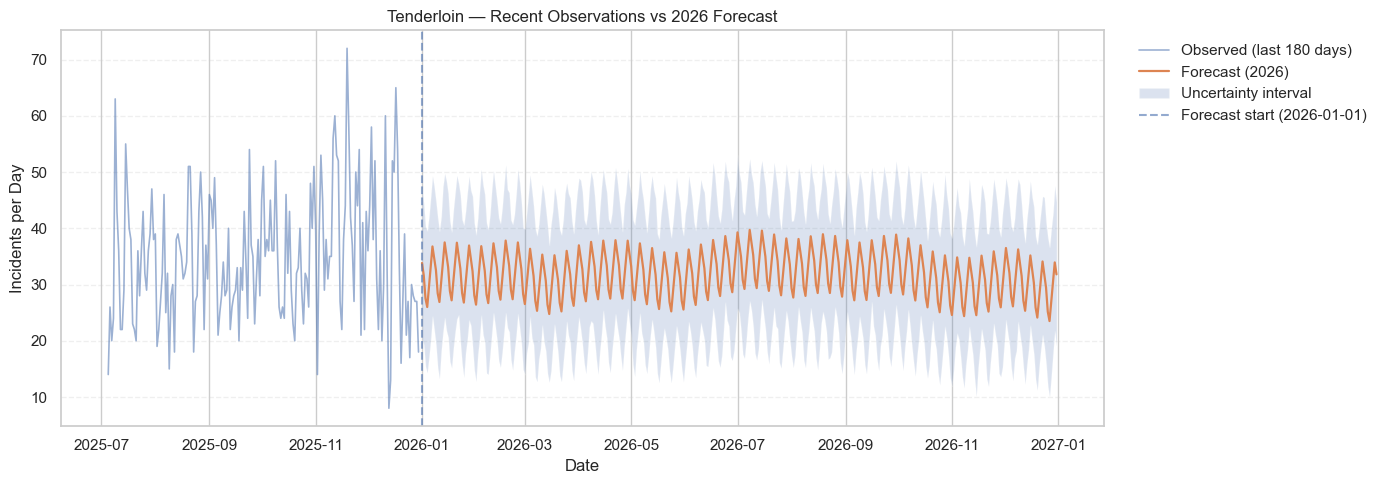

[South of Market] History rows: 179 | Forecast rows: 365


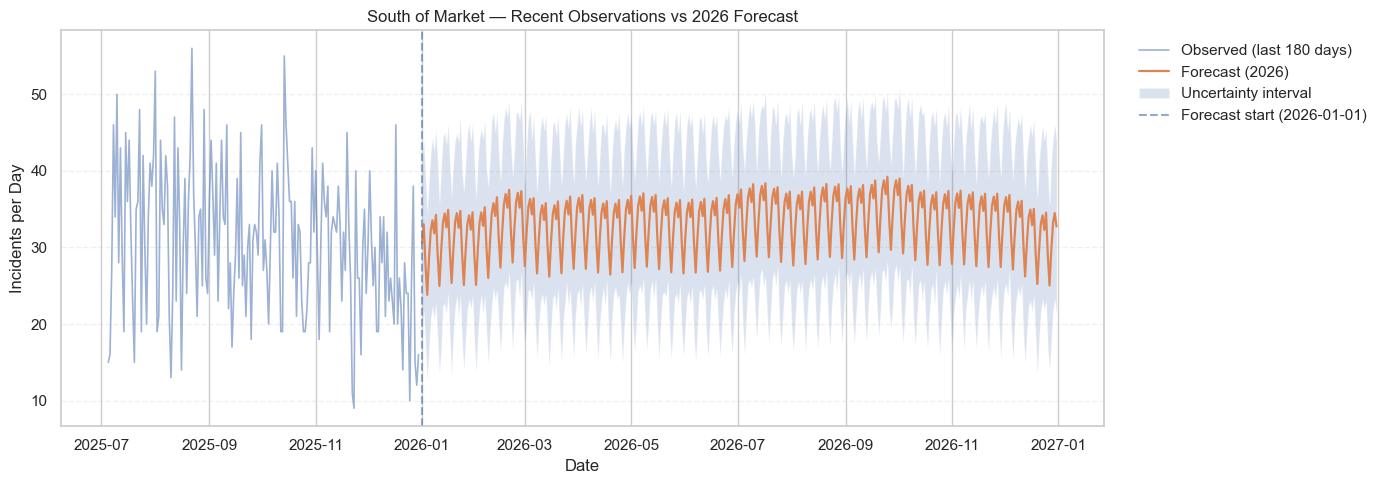

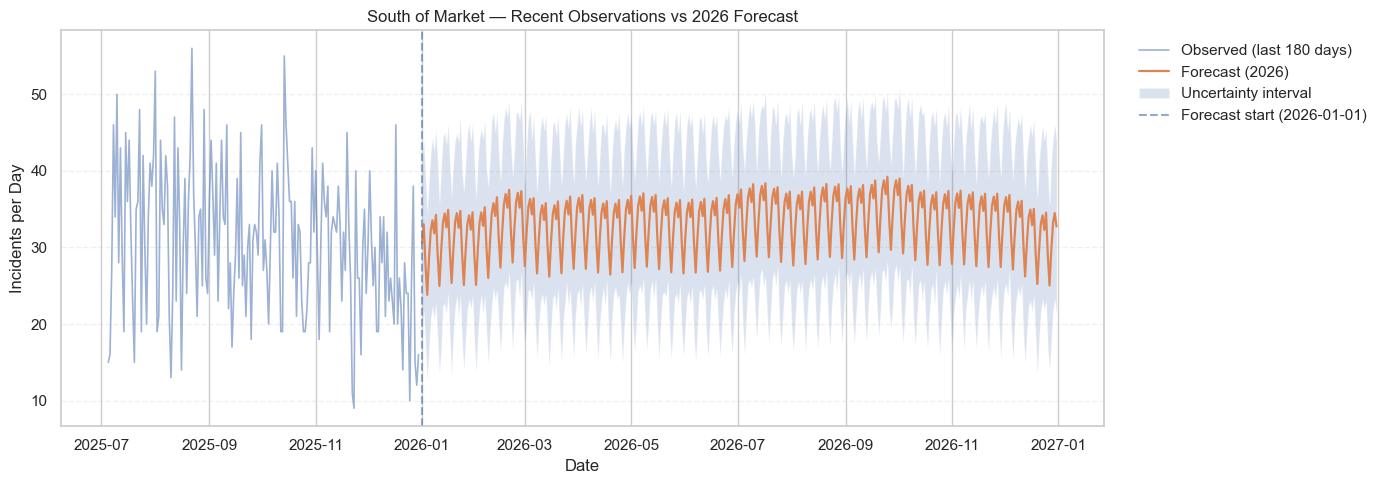

In [66]:
# ------------------------------------------------------------
# 5.11.5 Run Micro Plots (one per neighborhood) — restart-safe
# ------------------------------------------------------------

# Guardrails: make sure results exist
required_results = {
    "Mission": "micro_prophet_mission",
    "Tenderloin": "micro_prophet_tenderloin",
    "South of Market": "micro_prophet_soma",
}

for nbh, varname in required_results.items():
    if varname not in globals():
        raise NameError(f"{varname} not found. Run 5.11.3 first to build micro_results.")

# Plot one per neighborhood
plot_with_history(df, micro_prophet_mission, "Mission", days_back=180)
plot_with_history(df, micro_prophet_tenderloin, "Tenderloin", days_back=180)
plot_with_history(df, micro_prophet_soma, "South of Market", days_back=180)

#### 5.11 Neighborhood-Specific 2026 Forecast Insights

The 2026 neighborhood-level forecasts confirm that public safety risk in San Francisco does **not** evolve uniformly across space. While the citywide baseline remains broadly stable, each high-activity district exhibits a distinct temporal signature with different operational implications.

#### Mission District - Seasonal Acceleration

The Mission District is projected to experience pronounced seasonal acceleration in 2026, with incident levels rising sharply during late spring and summer before moderating toward year-end. This pattern is consistent with historical dynamics linked to nightlife activity, transit density, and social congregation.

**Planning implication:**  
The Mission is well suited to **elastic deployment strategies**, where staffing and preventive measures are scaled during predictable seasonal peaks rather than maintained uniformly throughout the year. The regularity of these surges makes advance planning both feasible and cost-effective.

#### Tenderloin - Structural Persistence

The Tenderloin forecast indicates a consistently elevated incident baseline throughout 2026, with comparatively limited seasonal fluctuation. Risk levels remain persistently high regardless of month, reflecting entrenched structural and environmental factors rather than short-term demand cycles.

**Planning implication:**  
The Tenderloin functions as a **continuous intervention zone**. Forecasts support sustained resource allocation and long-term stabilization strategies rather than reactive or seasonal surge responses.

#### South of Market (SoMa) - Temporal Oscillation

SoMa exhibits the highest short-term variability, characterized by strong weekly oscillations tied to commuter flows, event schedules, and nightlife activity. While average incident levels remain moderate relative to other hotspots, volatility is substantially higher.

**Planning implication:**  
SoMa benefits from **precision scheduling**, emphasizing time-of-week targeting over seasonal scaling. Forecasts support focused interventions aligned with known high-activity windows rather than broad increases in coverage.

#### Cross-Neighborhood Synthesis

Taken together, the forecasts demonstrate that neighborhood risk decouples from the citywide baseline along different dimensions:

- **Level:** Persistent elevation (Tenderloin)
- **Acceleration:** Seasonal growth dynamics (Mission)
- **Variance:** High short-term fluctuation (SoMa)

Effective public safety planning in 2026 therefore requires a **portfolio of neighborhood-specific strategies**, rather than a single uniform response derived from citywide averages.


[Back to Top](#top)

---

## 6. Interactive Dashboard <a id="interactive-dashboard"></a>

The analytical pipeline developed in the preceding sections establishes a validated, end-to-end view of San Francisco crime dynamics from 2018 through 2025, with forecasts extending into 2026. These results are supported by systematic data cleaning, exploratory analysis, temporal modeling, and diagnostic evaluation conducted within a reproducible notebook environment.

While methodological rigor is essential, effective decision-making requires that insights be accessible, interpretable, and interactive. Static figures and tables are well suited for documentation and evaluation, but they limit exploratory analysis, comparative reasoning, and scenario inspection. To bridge this gap, the project transitions from analysis to implementation through an interactive dashboard built using Streamlit.

The dashboard represents the final delivery layer of the project, translating validated analytical outputs into a decision-support interface suitable for non-technical stakeholders.

### 6.1 Separation of Analysis and Application Layers <a id="dashboard-separation"></a>

This project follows a deliberate separation between the offline analytical pipeline and the interactive application layer, consistent with production analytics best practices.

All data cleaning, aggregation, feature engineering, modeling, forecasting, and evaluation are performed upstream in the notebook pipeline. The Streamlit dashboard does not recompute analytics or retrain models. Instead, it consumes precomputed artifacts generated by the notebook and stored in efficient columnar formats.

Specifically:

- Raw incident-level data (≈965,000 records) is processed offline and never used directly to power dashboard charts.
- Dashboard inputs consist of compact, purpose-built Parquet aggregates and forecast output tables.
- Forecast models are trained and validated offline, and only their outputs (point forecasts and uncertainty bounds) are visualized in the app.

This architecture ensures fast interaction, reproducibility, and stability while cleanly separating research concerns from presentation concerns.

### 6.2 Role of the Dashboard <a id="dashboard-architecture"></a>

The dashboard is designed as a decision-support interface rather than a modeling environment. Its purpose is to surface validated results in a form suitable for exploration, comparison, and planning by non-technical users.

Within the overall workflow, the dashboard represents the final stage:

**Open data → Cleaning → Exploratory analysis → Forecasting → Interactive decision support**

All dashboard views are driven by precomputed monthly, hourly, and category-level aggregates. This ensures consistency with the analytical results presented earlier and avoids discrepancies caused by ad-hoc recalculation.

### 6.3 Live Dashboard Access <a id="dashboard-access"></a>

The dashboard is publicly deployed using Streamlit Cloud and can be accessed at the following URL:

**https://project2sfcrimeportfolio-g6jhgqizljzqexcb3ss7wd.streamlit.app/**

The deployed application reads exclusively from precomputed Parquet artifacts stored under `data/processed/`. No raw incident-level data is loaded at runtime, and no models are trained or updated within the application.

This deployment mirrors real-world analytics delivery, where dashboards operate on trusted, prepared datasets rather than raw logs or transactional sources.

### 6.4 Operational and Analytical Value <a id="dashboard-value"></a>

The dashboard consolidates insights from the exploratory and modeling phases into a single interactive interface that supports practical decision-making across multiple contexts.

Key contributions include:

- **Trend monitoring**  
  Citywide and neighborhood-level trends enable longitudinal comparison and identification of seasonal patterns.

- **Temporal risk assessment**  
  Hour-by-weekday intensity patterns highlight peak activity periods, supporting informed scheduling and resource allocation.

- **Predictive planning**  
  Forecasted monthly trends with uncertainty bounds provide a cautious planning signal rather than deterministic predictions.

- **Accessibility and transparency**  
  Results are presented in a form that does not require statistical or programming expertise, broadening access to public safety insights.

By separating modeling from visualization, relying on precomputed artifacts, and avoiding live computation in the UI loop, the dashboard remains fast, reproducible, and scalable despite operating on a large underlying dataset.

### 6.5 Summary

The interactive dashboard transforms a large-scale analytical study into a production-style analytics product. It demonstrates not only statistical and data engineering competence, but also an understanding of real-world analytics delivery, where insights must be both methodologically sound and operationally usable.

[Back to Top](#top)

---

## 7. References <a id="references"></a>


<p> </p>
<div style="padding-left: 0.5in; text-indent: -0.5in; line-height: 1.5;">

<p>Census Reporter. (2023). <i>San Francisco, CA profile</i>. American Community Survey 2023 (1-year). https://censusreporter.org/profiles/16000US0667000-san-francisco-ca/</p>

<p>City and County of San Francisco. (n.d.). <i>SFPD Crime Dashboard</i>. San Francisco Police Department. https://www.sanfranciscopolice.org/stay-safe/crime-data/crime-dashboard</p>

<p>DataSF. (n.d.). <i>Police Department Incident Reports: 2018 to Present</i>. https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783</p>

<p>GeoPandas. (n.d.). <i>Working with geospatial data in Python</i>. https://geopandas.org/</p>

<p>Hyndman, R. J., & Athanasopoulos, G. (2021). <i>Forecasting: Principles and practice</i>. OTexts.</p>

<p>McKinney, W. (2017). <i>Python for data analysis</i> (2nd ed.). O’Reilly Media.</p>

<p>Plotly Technologies. (n.d.). <i>Plotly Python graphing library</i>. https://plotly.com/python/</p>

<p>San Francisco Travel Association. (2024, March 28). <i>2023 visitor impact results and 2024 forecast</i> [Press release]. https://www.sftravel.com/media/press-release/san-francisco-travel-association-announces-2023-visitor-impact-results-2024
</p>

<p>Streamlit. (n.d.). <i>Build data apps in Python</i>. https://docs.streamlit.io/</p>

<p>U.S. Census Bureau. (2023). <i>American Community Survey, 2023 1-year estimates</i>. https://www.census.gov/</p>

<p>Hirpa, S. (2025). <i>San Francisco Crime Analytics Dashboard (2018–2025)</i>. Streamlit. https://sfcrimeanalysis2018-25-fntx9yl4t9yw7zatbgbjnt.streamlit.app/</p>
    

</div>





[Back to Top](#top)